# IMPORTING LIBRARIES

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# DATA LOADING

In [89]:
import pandas as pd
payment_default_df = pd.read_csv('payment_default.csv')
payment_history_df = pd.read_csv('payment_history.csv')

# DATA OVERVIEW

## DISPLAYING FIRST FEWS ROWS

In [90]:
payment_default_df.head()

,client_id,credit_given,gender,education,marital_status,month,default
0,25261,90000,2,2,2,10,0
1,1739,20000,2,2,2,10,1
2,6574,130000,2,2,1,10,0
3,11518,290000,2,2,2,10,0
4,27775,240000,2,2,2,10,0


In [91]:
payment_history_df.head()

,client_id,payment_status,bill_amt,paid_amt,month
0,1,2,3913,0,8
1,2,-1,2682,0,8
2,4,0,46990,2000,8
3,7,0,367965,55000,8
4,9,0,11285,3329,8


## SHAPE OF DATASETS

In [92]:
payment_history_df.shape

(132000, 5)

In [93]:
payment_default_df.shape

(21455, 7)

### Inference: From this analysis, it is clear that each client_id may have multiple payment history records.

In [94]:
payment_default_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21455 entries, 0 to 21454
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   client_id       21455 non-null  int64
 1   credit_given    21455 non-null  int64
 2   gender          21455 non-null  int64
 3   education       21455 non-null  int64
 4   marital_status  21455 non-null  int64
 5   month           21455 non-null  int64
 6   default         21455 non-null  int64
dtypes: int64(7)
memory usage: 1.1 MB


In [95]:
payment_history_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132000 entries, 0 to 131999
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   client_id       132000 non-null  int64
 1   payment_status  132000 non-null  int64
 2   bill_amt        132000 non-null  int64
 3   paid_amt        132000 non-null  int64
 4   month           132000 non-null  int64
dtypes: int64(5)
memory usage: 5.0 MB


# MISSING VALUES IDENTIFICATION

In [96]:
print(payment_history_df.isnull().sum())
print(payment_default_df.isnull().sum())

client_id         0
payment_status    0
bill_amt          0
paid_amt          0
month             0
dtype: int64
client_id         0
credit_given      0
gender            0
education         0
marital_status    0
month             0
default           0
dtype: int64


### INFERENCE : There are no missing values 

# DATA INSPECTION

## Checking month's records are of only 3,4,5,6,7,8

In [97]:
print(payment_history_df['month'].value_counts().sort_index())


month
3    22000
4    22000
5    22000
6    22000
7    22000
8    22000
Name: count, dtype: int64


## CHECK FOR DUPLICATE RECORDS IN PAYMENT_HISTORY

In [98]:
duplicates = payment_history_df.groupby(['client_id', 'month']).size()
duplicates = duplicates[duplicates > 1]

print(f"Number of duplicate (client_id, month) records: {len(duplicates)}")


Number of duplicate (client_id, month) records: 0


## CHECKING FOR UNKNOWN CLIENT_ID BECAUSE SHAPE OF TWO DATASET DOESNT MATCH

In [99]:
unknown_clients = set(payment_history_df['client_id']) - set(payment_default_df['client_id'])

print(f"Number of unknown clients in history: {len(unknown_clients)}")


Number of unknown clients in history: 545


## DROPPING UNKNOWN CLIENT IDs ( which doesnt match with payment_default)

In [100]:

payment_history_df = payment_history_df[payment_history_df['client_id'].isin(payment_default_df['client_id'])]


In [101]:
payment_history_df.shape

(128730, 5)

## UNIQUE VALUES OF PAYMENT STATUS

In [102]:
payment_history_df['payment_status'].unique()

array([ 2, -1,  0, -2,  1,  3,  4,  8,  7,  5,  6])

# DATA MERGING USING PIVOT

In [104]:
pivoted_df = payment_history_df.pivot(index='client_id', columns='month', values=['payment_status', 'bill_amt', 'paid_amt'])
pivoted_df.columns = [f"{feature}_month_{month}" for feature, month in pivoted_df.columns]
pivoted_df = pivoted_df.reset_index()
pivoted_df.head()


,client_id,payment_status_month_3,payment_status_month_4,payment_status_month_5,payment_status_month_6,payment_status_month_7,payment_status_month_8,bill_amt_month_3,bill_amt_month_4,bill_amt_month_5,bill_amt_month_6,bill_amt_month_7,bill_amt_month_8,paid_amt_month_3,paid_amt_month_4,paid_amt_month_5,paid_amt_month_6,paid_amt_month_7,paid_amt_month_8
0,1,-2,-2,-1,-1,2,2,0,0,0,689,3102,3913,0,0,0,0,689,0
1,2,2,0,0,0,2,-1,3261,3455,3272,2682,1725,2682,2000,0,1000,1000,1000,0
2,4,0,0,0,0,0,0,29547,28959,28314,49291,48233,46990,1000,1069,1100,1200,2019,2000
3,7,0,0,0,0,0,0,473944,483003,542653,445007,412023,367965,13770,13750,20239,38000,40000,55000
4,9,0,0,0,2,0,0,3719,11793,12211,12108,14096,11285,1000,1000,1000,432,0,3329


In [105]:
final_data = pd.merge(payment_default_df, pivoted_df, on='client_id', how='left')
final_data.head()

,client_id,credit_given,gender,education,marital_status,month,default,payment_status_month_3,payment_status_month_4,payment_status_month_5,...,bill_amt_month_5,bill_amt_month_6,bill_amt_month_7,bill_amt_month_8,paid_amt_month_3,paid_amt_month_4,paid_amt_month_5,paid_amt_month_6,paid_amt_month_7,paid_amt_month_8
0,25261,90000,2,2,2,10,0,0,0,0,...,32747,36654,38836,39772,1216,1338,1175,1831,15,0
1,1739,20000,2,2,2,10,1,0,0,0,...,14750,14462,17417,17257,0,1400,702,527,1239,1230
2,6574,130000,2,2,1,10,0,-1,-1,0,...,0,2420,8480,9768,0,0,682,0,1001,8486
3,11518,290000,2,2,2,10,0,0,0,0,...,9981,2778,9154,14026,1797,22000,23000,9000,2000,9000
4,27775,240000,2,2,2,10,0,0,0,0,...,31783,51524,50787,75830,37102,3180,3000,1400,1601,1480


In [106]:
final_data[final_data['client_id']==25261]

,client_id,credit_given,gender,education,marital_status,month,default,payment_status_month_3,payment_status_month_4,payment_status_month_5,...,bill_amt_month_5,bill_amt_month_6,bill_amt_month_7,bill_amt_month_8,paid_amt_month_3,paid_amt_month_4,paid_amt_month_5,paid_amt_month_6,paid_amt_month_7,paid_amt_month_8
0,25261,90000,2,2,2,10,0,0,0,0,...,32747,36654,38836,39772,1216,1338,1175,1831,15,0


## COLUMNS OF FINAL DATA

In [107]:
final_data.columns

Index(['client_id', 'credit_given', 'gender', 'education', 'marital_status',
       'month', 'default', 'payment_status_month_3', 'payment_status_month_4',
       'payment_status_month_5', 'payment_status_month_6',
       'payment_status_month_7', 'payment_status_month_8', 'bill_amt_month_3',
       'bill_amt_month_4', 'bill_amt_month_5', 'bill_amt_month_6',
       'bill_amt_month_7', 'bill_amt_month_8', 'paid_amt_month_3',
       'paid_amt_month_4', 'paid_amt_month_5', 'paid_amt_month_6',
       'paid_amt_month_7', 'paid_amt_month_8'],
      dtype='object')

In [109]:
col=[col for col in final_data.columns if col!='default']+['default']
final_data=final_data[col]

In [110]:
final_data.head(5)

,client_id,credit_given,gender,education,marital_status,month,payment_status_month_3,payment_status_month_4,payment_status_month_5,payment_status_month_6,...,bill_amt_month_6,bill_amt_month_7,bill_amt_month_8,paid_amt_month_3,paid_amt_month_4,paid_amt_month_5,paid_amt_month_6,paid_amt_month_7,paid_amt_month_8,default
0,25261,90000,2,2,2,10,0,0,0,2,...,36654,38836,39772,1216,1338,1175,1831,15,0,0
1,1739,20000,2,2,2,10,0,0,0,0,...,14462,17417,17257,0,1400,702,527,1239,1230,1
2,6574,130000,2,2,1,10,-1,-1,0,0,...,2420,8480,9768,0,0,682,0,1001,8486,0
3,11518,290000,2,2,2,10,0,0,0,0,...,2778,9154,14026,1797,22000,23000,9000,2000,9000,0
4,27775,240000,2,2,2,10,0,0,0,0,...,51524,50787,75830,37102,3180,3000,1400,1601,1480,0


## CHECKING VALUES FOR CLIENT_ID==25261 FOR REFERENCE

In [115]:
check=final_data[final_data['client_id']==25261]
for i in check.columns:
    print(f"{i}:{check.iloc[0][i]}")


client_id:25261
credit_given:90000
gender:2
education:2
marital_status:2
month:10
payment_status_month_3:0
payment_status_month_4:0
payment_status_month_5:0
payment_status_month_6:2
payment_status_month_7:3
payment_status_month_8:1
bill_amt_month_3:33291
bill_amt_month_4:33091
bill_amt_month_5:32747
bill_amt_month_6:36654
bill_amt_month_7:38836
bill_amt_month_8:39772
paid_amt_month_3:1216
paid_amt_month_4:1338
paid_amt_month_5:1175
paid_amt_month_6:1831
paid_amt_month_7:15
paid_amt_month_8:0
default:0


## SHAPE OF FINAL DATA

In [116]:
final_data.shape

(21455, 25)

In [119]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21455 entries, 0 to 21454
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   client_id               21455 non-null  int64
 1   credit_given            21455 non-null  int64
 2   gender                  21455 non-null  int64
 3   education               21455 non-null  int64
 4   marital_status          21455 non-null  int64
 5   month                   21455 non-null  int64
 6   payment_status_month_3  21455 non-null  int64
 7   payment_status_month_4  21455 non-null  int64
 8   payment_status_month_5  21455 non-null  int64
 9   payment_status_month_6  21455 non-null  int64
 10  payment_status_month_7  21455 non-null  int64
 11  payment_status_month_8  21455 non-null  int64
 12  bill_amt_month_3        21455 non-null  int64
 13  bill_amt_month_4        21455 non-null  int64
 14  bill_amt_month_5        21455 non-null  int64
 15  bill_amt_month_6   

## Summary Statistics of the Final Data

In [120]:
final_data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
client_id,21455.0,14963.884549,8672.625473,1.0,7409.0,14993.0,22458.5,29997.0
credit_given,21455.0,167999.518993,129807.807264,10000.0,50000.0,140000.0,240000.0,1000000.0
gender,21455.0,1.604055,0.489064,1.0,1.0,2.0,2.0,2.0
education,21455.0,1.851270,0.788552,0.0,1.0,2.0,2.0,6.0
marital_status,21455.0,1.552785,0.522183,0.0,1.0,2.0,2.0,3.0
month,21455.0,10.000000,0.000000,10.0,10.0,10.0,10.0,10.0
payment_status_month_3,21455.0,-0.296341,1.153338,-2.0,-1.0,0.0,0.0,8.0
payment_status_month_4,21455.0,-0.272104,1.136065,-2.0,-1.0,0.0,0.0,8.0
payment_status_month_5,21455.0,-0.227499,1.170044,-2.0,-1.0,0.0,0.0,8.0
payment_status_month_6,21455.0,-0.174039,1.195766,-2.0,-1.0,0.0,0.0,8.0


## CHECKING for DUPLICATES 

In [121]:
final_data.duplicated().value_counts()

False    21455
Name: count, dtype: int64

## CHECKING for MISSING VALUES 

In [122]:
final_data.isnull().sum()

client_id                 0
credit_given              0
gender                    0
education                 0
marital_status            0
month                     0
payment_status_month_3    0
payment_status_month_4    0
payment_status_month_5    0
payment_status_month_6    0
payment_status_month_7    0
payment_status_month_8    0
bill_amt_month_3          0
bill_amt_month_4          0
bill_amt_month_5          0
bill_amt_month_6          0
bill_amt_month_7          0
bill_amt_month_8          0
paid_amt_month_3          0
paid_amt_month_4          0
paid_amt_month_5          0
paid_amt_month_6          0
paid_amt_month_7          0
paid_amt_month_8          0
default                   0
dtype: int64

## CHECK UNIQUE VALUES FOR EACH COLUMN

In [123]:
for i in final_data.columns.to_list():
    print(f"{i}:{final_data[i].nunique()}")

client_id:21455
credit_given:81
gender:2
education:7
marital_status:4
month:1
payment_status_month_3:10
payment_status_month_4:10
payment_status_month_5:11
payment_status_month_6:11
payment_status_month_7:11
payment_status_month_8:11
bill_amt_month_3:15382
bill_amt_month_4:15656
bill_amt_month_5:16067
bill_amt_month_6:16322
bill_amt_month_7:16587
bill_amt_month_8:16963
paid_amt_month_3:5618
paid_amt_month_4:5630
paid_amt_month_5:5660
paid_amt_month_6:6089
paid_amt_month_7:6430
paid_amt_month_8:6425
default:2


## COPYING FINAL DATA INTO loan_df FOR MANIPULATION

In [124]:
loan_df=final_data.copy()

In [125]:
loan_df.head()

,client_id,credit_given,gender,education,marital_status,month,payment_status_month_3,payment_status_month_4,payment_status_month_5,payment_status_month_6,...,bill_amt_month_6,bill_amt_month_7,bill_amt_month_8,paid_amt_month_3,paid_amt_month_4,paid_amt_month_5,paid_amt_month_6,paid_amt_month_7,paid_amt_month_8,default
0,25261,90000,2,2,2,10,0,0,0,2,...,36654,38836,39772,1216,1338,1175,1831,15,0,0
1,1739,20000,2,2,2,10,0,0,0,0,...,14462,17417,17257,0,1400,702,527,1239,1230,1
2,6574,130000,2,2,1,10,-1,-1,0,0,...,2420,8480,9768,0,0,682,0,1001,8486,0
3,11518,290000,2,2,2,10,0,0,0,0,...,2778,9154,14026,1797,22000,23000,9000,2000,9000,0
4,27775,240000,2,2,2,10,0,0,0,0,...,51524,50787,75830,37102,3180,3000,1400,1601,1480,0


## DROPPING CLIEND_ID

In [126]:
loan_df.drop('client_id',axis=1,inplace=True)

In [127]:
loan_df.columns

Index(['credit_given', 'gender', 'education', 'marital_status', 'month',
       'payment_status_month_3', 'payment_status_month_4',
       'payment_status_month_5', 'payment_status_month_6',
       'payment_status_month_7', 'payment_status_month_8', 'bill_amt_month_3',
       'bill_amt_month_4', 'bill_amt_month_5', 'bill_amt_month_6',
       'bill_amt_month_7', 'bill_amt_month_8', 'paid_amt_month_3',
       'paid_amt_month_4', 'paid_amt_month_5', 'paid_amt_month_6',
       'paid_amt_month_7', 'paid_amt_month_8', 'default'],
      dtype='object')

### CHECKING FOR THE UNIQUE VALUES OF EDUCATION

In [128]:
loan_df['education'].unique()

array([2, 3, 1, 5, 4, 6, 0])

### CHECKING FOR THE UNIQUE VALUES OF MARITAL STATUS

In [129]:
loan_df['marital_status'].unique()

array([2, 1, 3, 0])

### CHECKING FOR THE UNIQUE VALUES OF GENDER

In [130]:
loan_df['gender'].unique()

array([2, 1])

# Converting NUMERICAL VALUES to categorical values for easy comprehension

In [162]:
df_loan = loan_df.copy()

df_loan.replace({'gender': {1: 'Male', 2: 'Female'}}, inplace=True)

df_loan.replace({'education': {
    1: 'Graduate_school',
    2: 'University',
    3: 'High School',
    4: 'others',
    5: 'others',
    6: 'others',
    0: 'others'
}}, inplace=True)

df_loan.replace({'marital_status': {
    1: 'Married',
    2: 'Single',
    3: 'others',
    0: 'others'
}}, inplace=True)
df_loan.replace({'default': {
    0: 'No',
    1: 'Yes'
}}, inplace=True)


In [163]:
df_loan.head()

,credit_given,gender,education,marital_status,month,payment_status_month_3,payment_status_month_4,payment_status_month_5,payment_status_month_6,payment_status_month_7,...,bill_amt_month_6,bill_amt_month_7,bill_amt_month_8,paid_amt_month_3,paid_amt_month_4,paid_amt_month_5,paid_amt_month_6,paid_amt_month_7,paid_amt_month_8,default
0,90000,Female,University,Single,10,0,0,0,2,3,...,36654,38836,39772,1216,1338,1175,1831,15,0,No
1,20000,Female,University,Single,10,0,0,0,0,0,...,14462,17417,17257,0,1400,702,527,1239,1230,Yes
2,130000,Female,University,Married,10,-1,-1,0,0,-1,...,2420,8480,9768,0,0,682,0,1001,8486,No
3,290000,Female,University,Single,10,0,0,0,0,0,...,2778,9154,14026,1797,22000,23000,9000,2000,9000,No
4,240000,Female,University,Single,10,0,0,0,0,0,...,51524,50787,75830,37102,3180,3000,1400,1601,1480,No


In [133]:
!pip install pandas_profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 5.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 655.7/655.7 kB 6.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27128 sha256=533aefa00848fa1ad165b0f2407a0996f26994c86bba4ef2b2599fb22535f5d9
  Stored in directory: /Users/poojithamm/Library/Caches/pip/wheels/5f/d4/d7/4189b07b5902ee9f3ce0dbb14909fbe8037c39d6c63ffd49c9
Successfully built htmlmin
  Attempting uninstall: joblib
    Found existing installation: joblib 1.4.2
    Uninstalling joblib-1.4.2:
      Successfully uninstalled joblib-1.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-learn 1.4.2 requires joblib>=1.2.0, but you have joblib 1.1.1 which is incompatible.

[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice

# VISUALIZATION

## Distribution of Loan Defaults

### PIE CHART

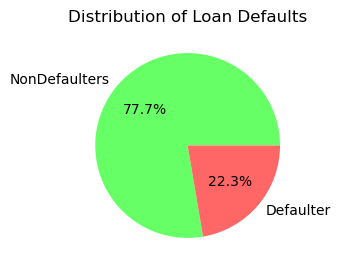

In [164]:
plt.figure(figsize=(5,3))
colors = ['#66ff66', '#ff6666']
plt.pie(x=df_loan['default'].value_counts(),labels=['NonDefaulters','Defaulter'],autopct='%1.1f%%',colors=colors)
plt.title('Distribution of Loan Defaults')
plt.show()

### BAR CHART

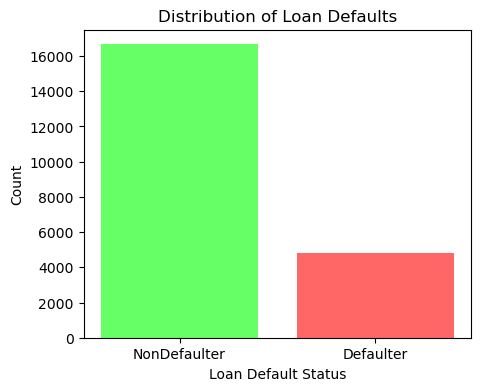

In [165]:
default_counts = df_loan['default'].value_counts()
plt.figure(figsize=(5,4))
plt.bar(
    x=['NonDefaulter', 'Defaulter'],  
    height=default_counts,            
    color=['#66ff66', '#ff6666']      
)

plt.title('Distribution of Loan Defaults')
plt.xlabel('Loan Default Status')
plt.ylabel('Count')

plt.show()


### INFERENCE: The data for defaulters and non-defaulters is imbalanced.

## Gender Distribution

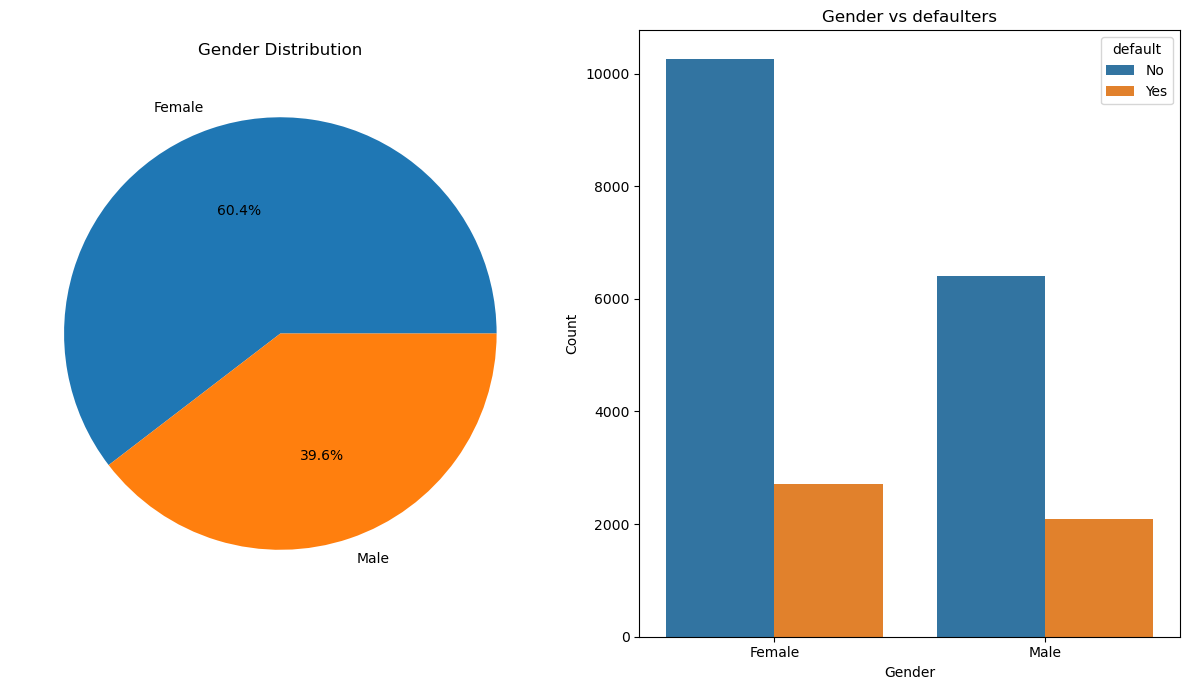

In [166]:
fig,ax=plt.subplots(1,2,figsize=(12,7))
ax[0].pie(x=df_loan['gender'].value_counts(),labels=['Female','Male'],autopct='%1.1f%%')
ax[0].set_title('Gender Distribution')
sns.countplot(x=df_loan['gender'],hue=df_loan['default'],data=df_loan,ax=ax[1])
ax[1].set_title('Gender vs defaulters')
ax[1].set_xlabel('Gender')
ax[1].set_ylabel('Count')
plt.tight_layout()
plt.show()

In [167]:
count=df_loan.groupby(by=['gender','default'])
count_values=count['default'].count()
count_values

gender  default
Female  No         10256
        Yes         2704
Male    No          6407
        Yes         2088
Name: default, dtype: int64

### INFERENCE : FEMALE CUSTOMERS ARE MORE THAN MALE CUSTOMERS.
### IN DEFAULT NUMBERS THERE ARE 12960 FEMALE CUSTOMER AND 8495 MALE CUSTOMERS ARE THERE

## Education Distribution

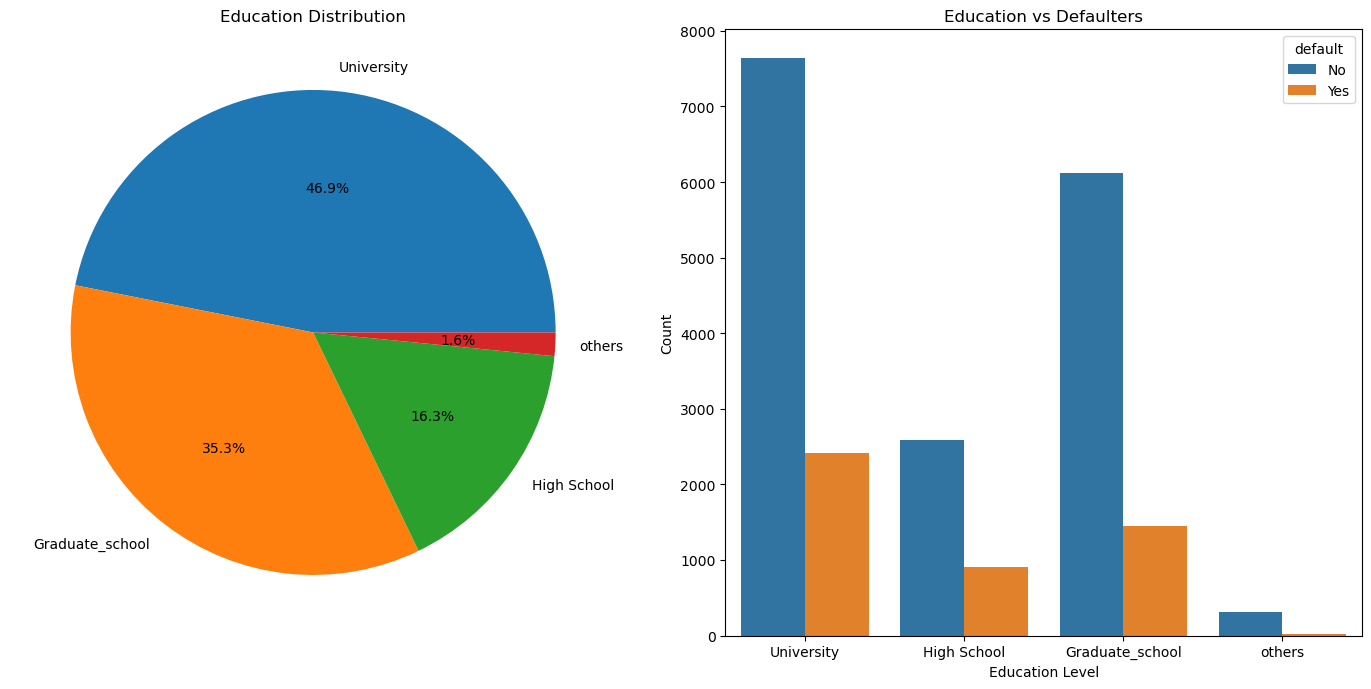

In [170]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(1, 2, figsize=(14, 7))
ax[0].pie(
    x=df_loan['education'].value_counts(),
    labels=df_loan['education'].value_counts().index,
    autopct='%1.1f%%'
)
ax[0].set_title('Education Distribution')
sns.countplot(x='education', hue='default', data=df_loan, ax=ax[1])
ax[1].set_title('Education vs Defaulters')
ax[1].set_xlabel('Education Level')
ax[1].set_ylabel('Count')
plt.tight_layout()
plt.show()


In [171]:
count=df_loan.groupby(by=['education','default'])
count_values=count['default'].count()
count_values

education        default
Graduate_school  No         6124
                 Yes        1446
High School      No         2585
                 Yes         907
University       No         7639
                 Yes        2419
others           No          315
                 Yes          20
Name: default, dtype: int64

### INFERENCE :  Higher education levels (Graduate School and University) have a higher number of non-defaulters, they also exhibit a notable number of defaulters. The "High School" group has a relatively higher proportion of defaulters.

## Marital Status Distribution

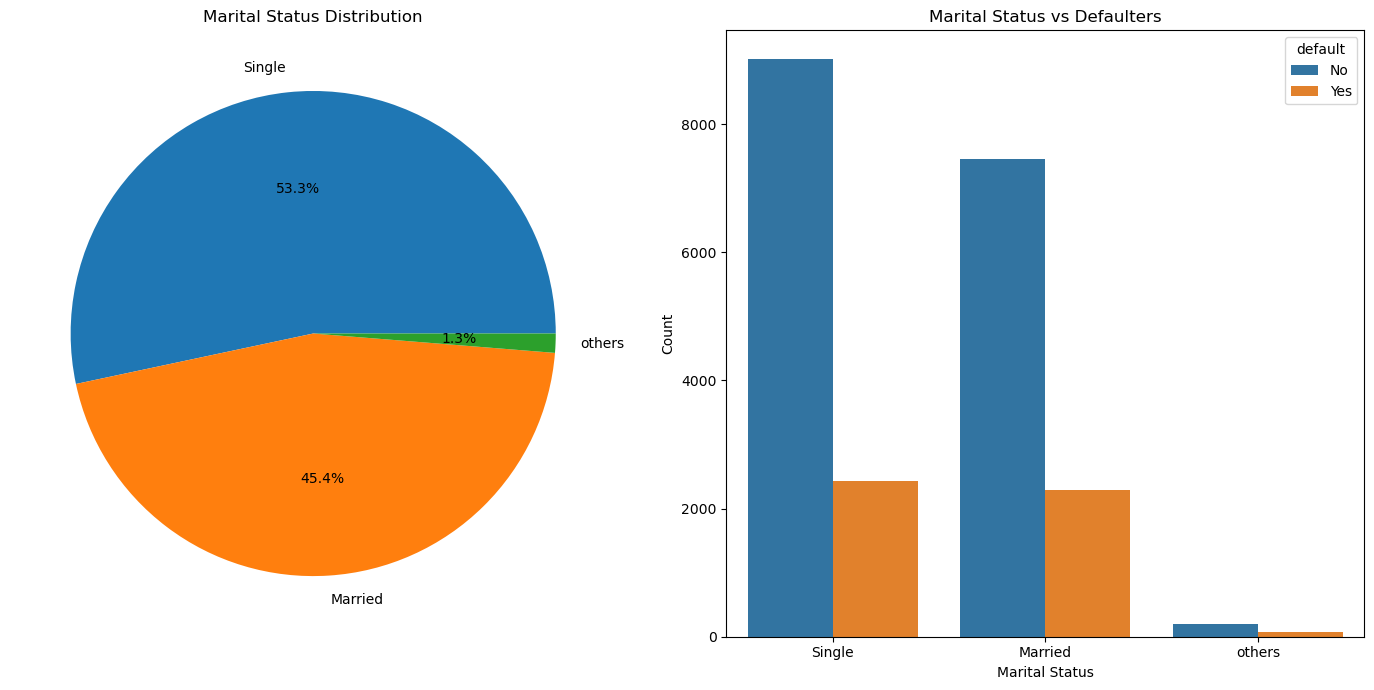

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(1, 2, figsize=(14, 7))
ax[0].pie(
    x=df_loan['marital_status'].value_counts(),
    labels=df_loan['marital_status'].value_counts().index,
    autopct='%1.1f%%'
)
ax[0].set_title('Marital Status Distribution')
sns.countplot(x='marital_status', hue='default', data=df_loan, ax=ax[1])
ax[1].set_title('Marital Status vs Defaulters')
ax[1].set_xlabel('Marital Status')
ax[1].set_ylabel('Count')
plt.tight_layout()
plt.show()


In [177]:
count = df_loan.groupby(by=['marital_status', 'default'])['default'].count()
count_values = count.reset_index(name='count')
count_values

,marital_status,default,count
0,Married,No,7448
1,Married,Yes,2291
2,Single,No,9012
3,Single,Yes,2431
4,others,No,203
5,others,Yes,70


### INFERENCE : "Married" and "Single" categories have a notable proportion of defaulters. However, the "Single" group seems to have a higher number of non-defaulters. The "Others" category is underrepresented and may not significantly impact the overall analysis.

## MONTHLY REPAYMENT STATUS vs DEFAULTERS

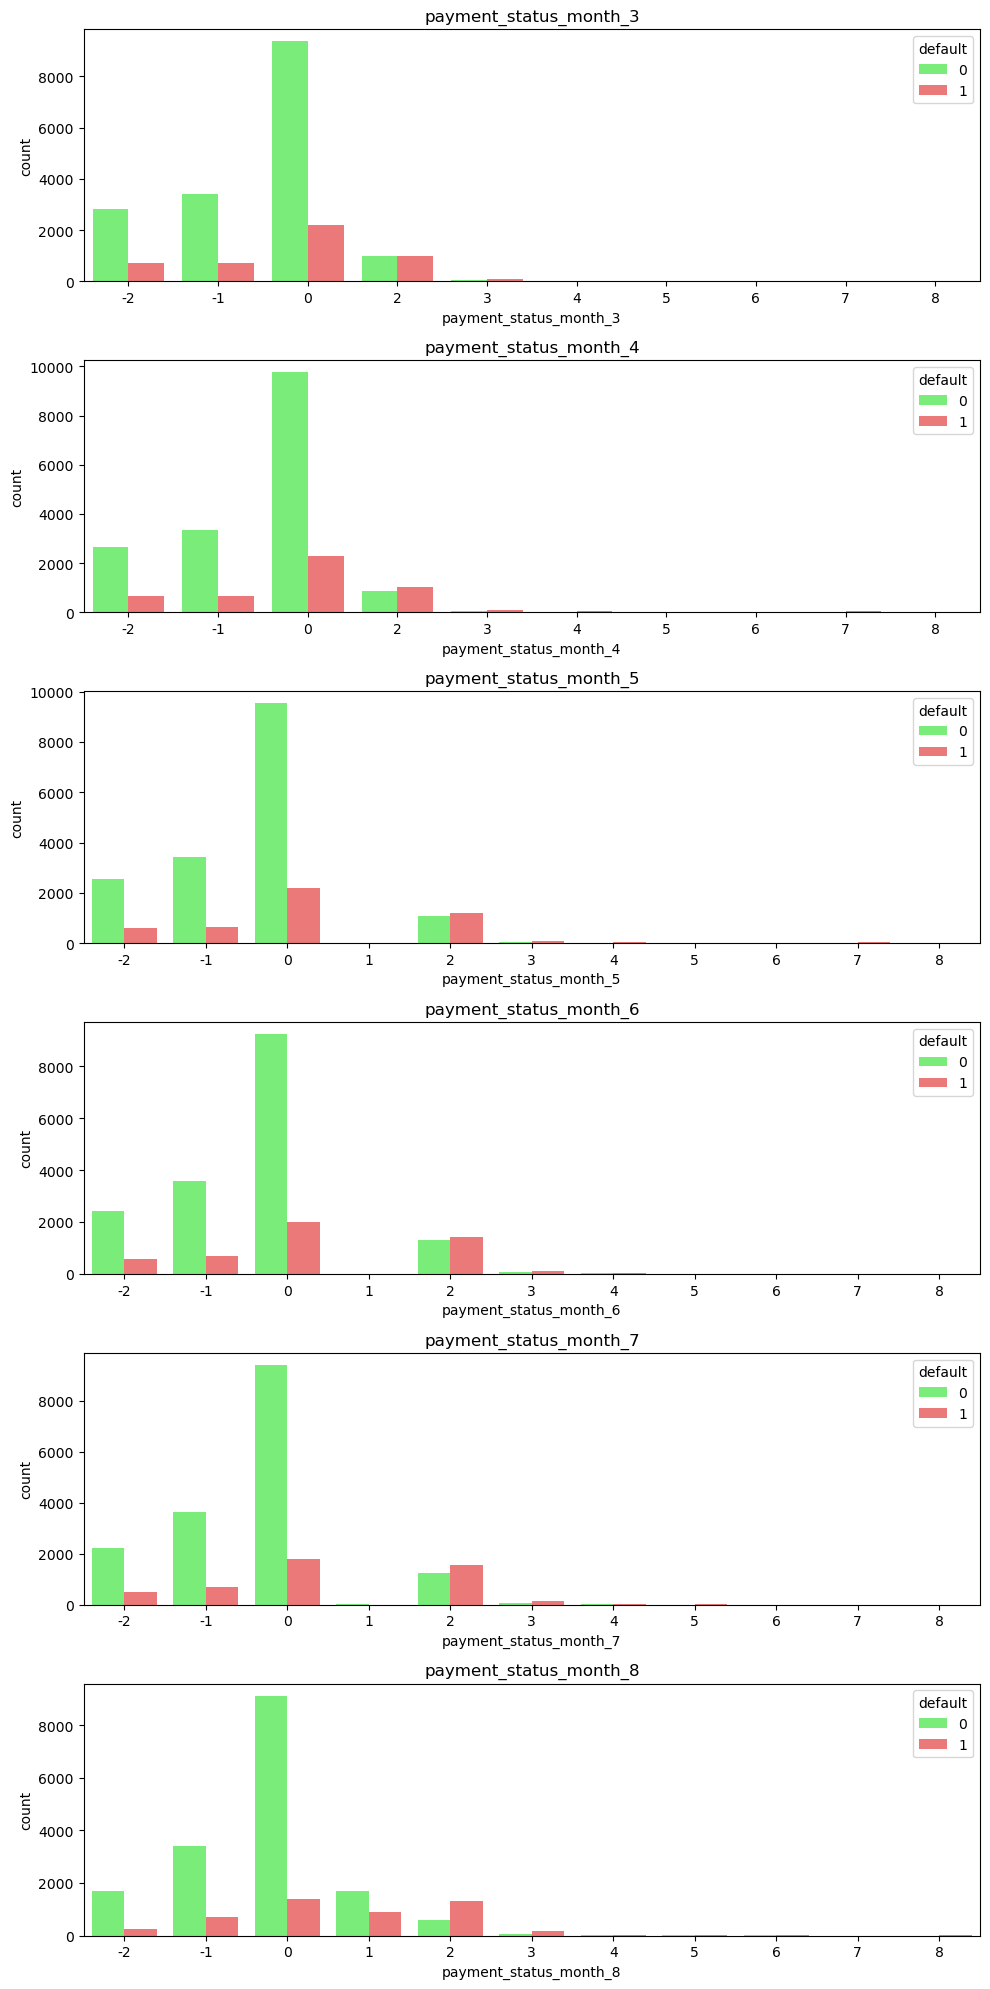

In [186]:
df_loan['default'] = df_loan['default'].map({'Yes': 1, 'No': 0})

x = ['payment_status_month_3', 'payment_status_month_4',
     'payment_status_month_5', 'payment_status_month_6',
     'payment_status_month_7', 'payment_status_month_8']
fig, ax = plt.subplots(len(x), 1, figsize=(10, 20))
for i, col in enumerate(x):
    sns.countplot(x=col, hue='default', data=df_loan, ax=ax[i], palette={0: '#66ff66', 1: '#ff6666'})
    ax[i].set_title(col)
plt.tight_layout()
plt.show()


## CORELATION MATRIX

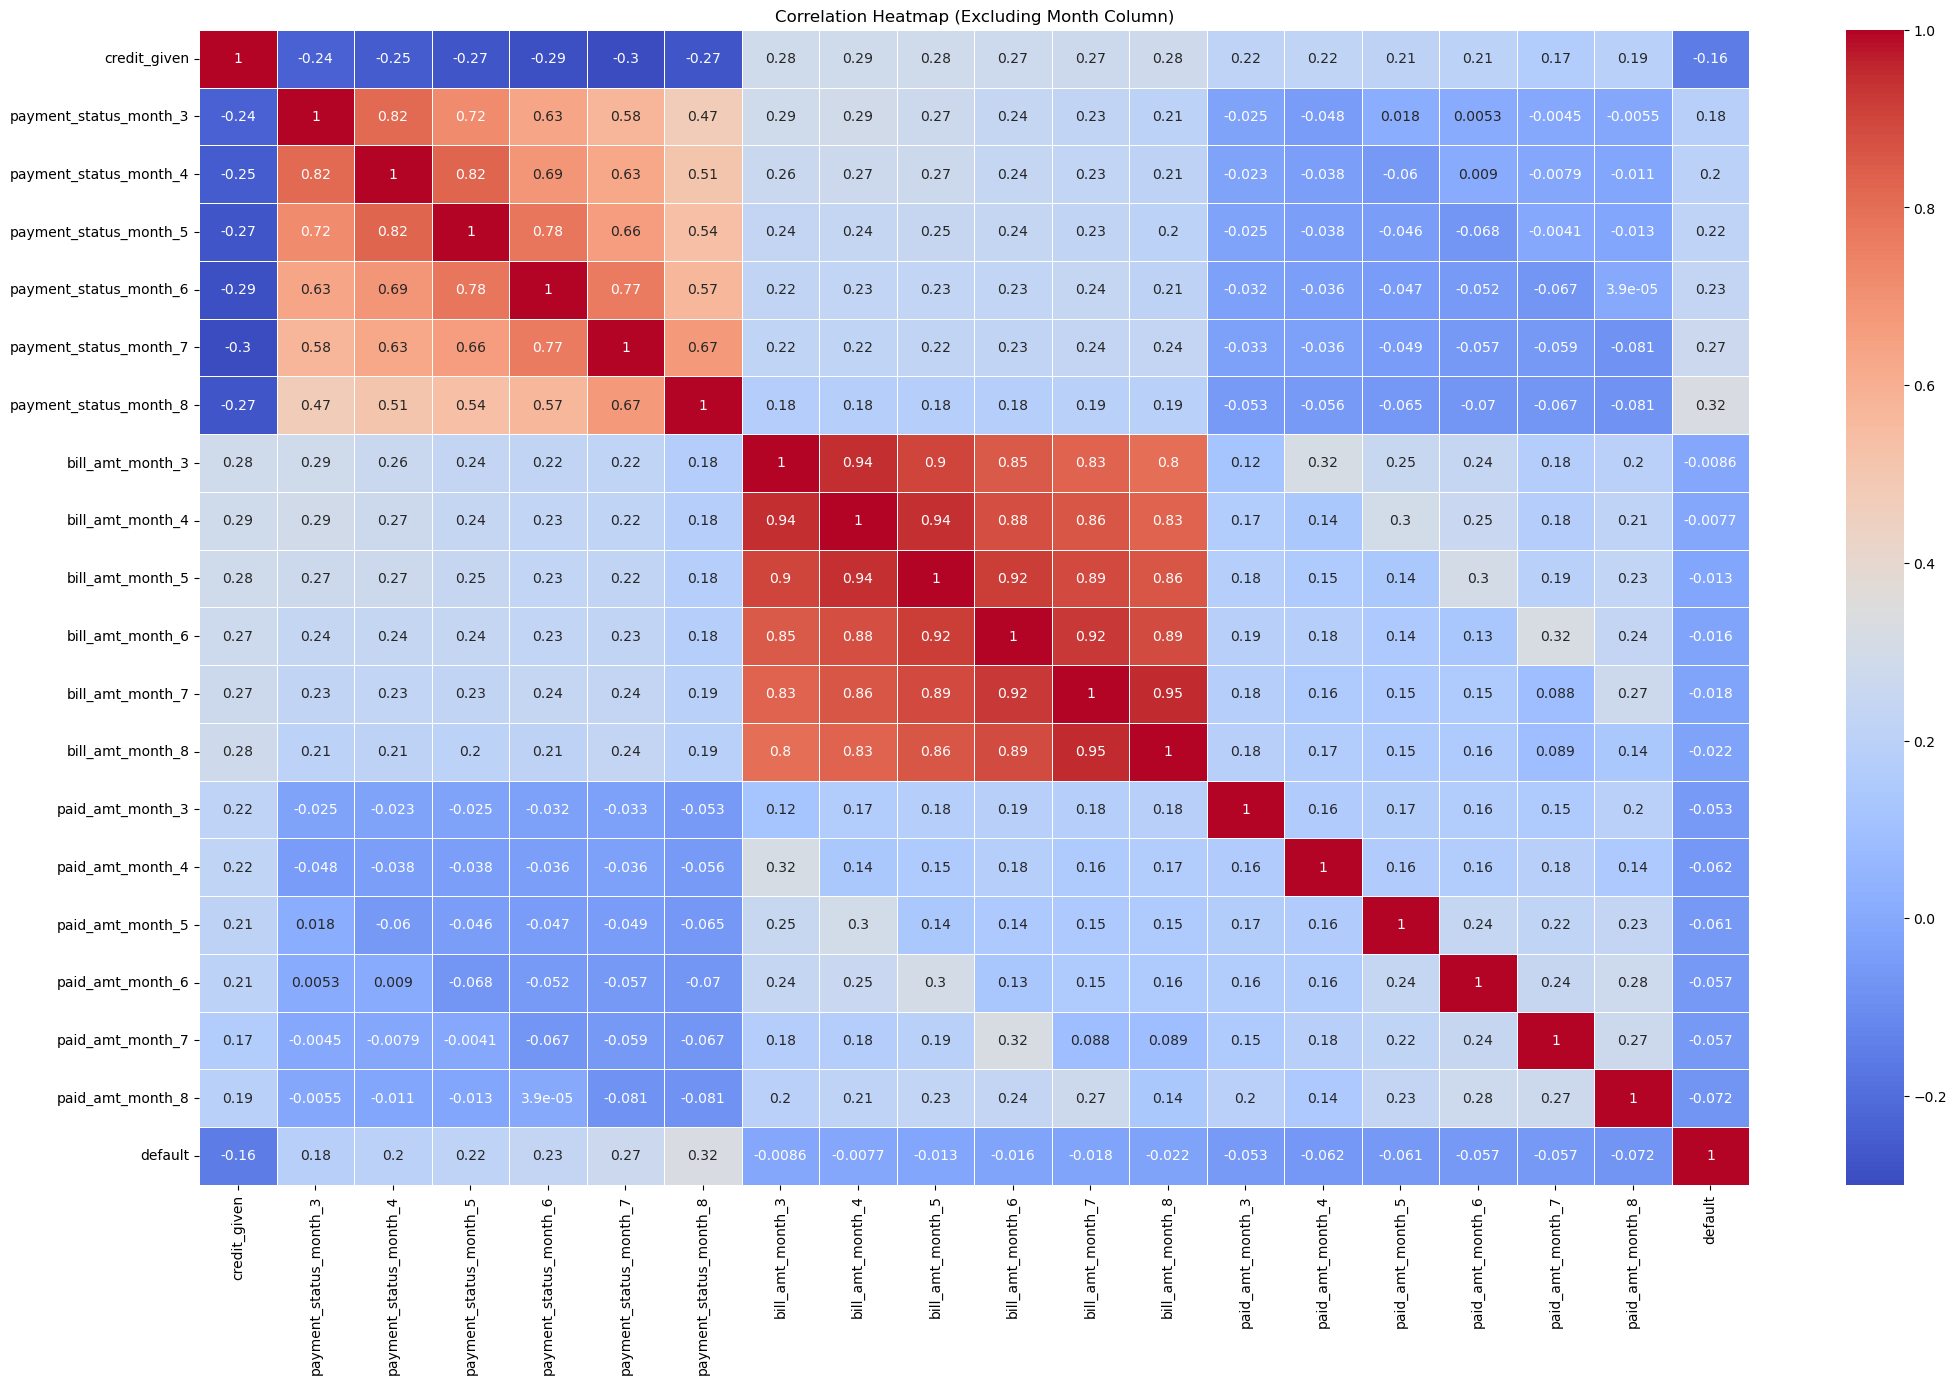

In [191]:
df_loan_clean = df_loan.drop(columns=['month'])
numerical_data = df_loan_clean.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(25,15))
sns.heatmap(numerical_data.corr(),
            linewidths=.5,
            annot=True,
            cmap='coolwarm')
plt.title('Correlation Heatmap (Excluding Month Column)')
plt.show()

### Inference: The Payment Status feature demonstrates a strong correlation with the likelihood of loan defaults. As the payment delay increases (indicated by higher payment status values), the probability of defaulting also rises. Clients who have payment delays of two months or more are more likely to default on their loans, while clients who have no delays or delays of only one month are generally less likely to default. This correlation suggests that payment history is a significant predictor of future defaults, with increasing delays indicating a higher risk of default.

# HYPOTHESIS TESTING 

## Checking whether loan default behavior dependent on the client’s education level

### Null Hypothesis(H0)-Defaulter doesnt depend on educational qualification
### Alternate Hypothesis(H1)-Defaulter also get affected by Education qualification

In [194]:
from scipy.stats import chi2_contingency
cont_table=pd.crosstab(df_loan['default'],df_loan['education'],margins=False)
stat,P_value,dof,expected=chi2_contingency(cont_table)
print("P-value",P_value)
if P_value>=0.05:
    print("Fail to reject null hypothesis")
else:
    print("reject null hypothesis")
    

P-value 2.235074598468406e-30
reject null hypothesis


### ALTERNATE HYPOTHESIS ACCEPTED

### Null Hypothesis(H0)-Defaulter doesnt depend on Marital_status
### Alternate Hypothesis(H1)-Defaulter also get affected by Marital_status

In [197]:

cont_table_marital = pd.crosstab(df_loan['default'], df_loan['marital_status'])

stat, p_value, dof, expected = chi2_contingency(cont_table_marital)
print("P-value (Marital Status vs Default):", p_value)

if p_value >= 0.05:
    print("Fail to reject null hypothesis ")
else:
    print("Reject null hypothesis")


P-value (Marital Status vs Default): 0.00015824541598641486
Reject null hypothesis


## ATERNATE HYPOTHESIS ACCEPTED

### Null Hypothesis(H0)-Defaulter doesnt depend on Gender
### Alternate Hypothesis(H1)-Defaulter also get affected by Gender

In [198]:

cont_table_gender = pd.crosstab(df_loan['default'], df_loan['gender'])


stat, p_value, dof, expected = chi2_contingency(cont_table_gender)
print("P-value (Gender vs Default):", p_value)

if p_value >= 0.05:
    print("Fail to reject null hypothesis")
else:
    print("Reject null hypothesis")


P-value (Gender vs Default): 1.8565239641737653e-10
Reject null hypothesis


## INFERENCE : Here we accept the Alternate Hypothesis

# FEATURE ENGINEERING

## There is no missing value to be take care of

## HANDLING OUTLIER

In [199]:
df_loan.describe()

,credit_given,month,payment_status_month_3,payment_status_month_4,payment_status_month_5,payment_status_month_6,payment_status_month_7,payment_status_month_8,bill_amt_month_3,bill_amt_month_4,...,bill_amt_month_6,bill_amt_month_7,bill_amt_month_8,paid_amt_month_3,paid_amt_month_4,paid_amt_month_5,paid_amt_month_6,paid_amt_month_7,paid_amt_month_8,default
count,21455.000000,21455.0,21455.000000,21455.000000,21455.000000,21455.000000,21455.000000,21455.000000,21455.000000,21455.000000,...,2.145500e+04,21455.000000,21455.000000,21455.000000,21455.000000,21455.000000,21455.000000,2.145500e+04,21455.000000,21455.000000
mean,167999.518993,10.0,-0.296341,-0.272104,-0.227499,-0.174039,-0.136145,-0.016313,38664.602564,40102.524959,...,4.674814e+04,48924.518341,51079.930879,5262.229131,4842.119879,4776.465393,5281.295689,5.859540e+03,5572.474715,0.223351
std,129807.807264,0.0,1.153338,1.136065,1.170044,1.195766,1.195867,1.124908,59423.441239,60453.969440,...,6.917211e+04,70727.666250,73287.273769,18075.835232,15542.753270,15254.233386,18326.626729,2.288069e+04,16219.986503,0.416502
min,10000.000000,10.0,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-339603.000000,-53007.000000,...,-6.150600e+04,-69777.000000,-165580.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,50000.000000,10.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1230.000000,1693.000000,...,2.646000e+03,2909.000000,3476.000000,109.000000,222.000000,283.000000,390.000000,8.320000e+02,999.500000,0.000000
50%,140000.000000,10.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17021.000000,18072.000000,...,1.990500e+04,20797.000000,22064.000000,1500.000000,1500.000000,1500.000000,1807.000000,2.014000e+03,2100.000000,0.000000
75%,240000.000000,10.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48922.000000,49944.500000,...,5.951800e+04,63396.000000,66982.000000,4000.000000,4072.000000,4022.000000,4549.500000,5.000000e+03,5009.500000,0.000000
max,1000000.000000,10.0,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,961664.000000,927171.000000,...,1.664089e+06,983931.000000,964511.000000,527143.000000,426529.000000,621000.000000,896040.000000,1.684259e+06,873552.000000,1.000000


## BOX PLOT FOR OUTLIERS 

/var/folders/6p/j5my1gh17rs9dhxtmc5r7w3c0000gn/T/ipykernel_10261/2541001805.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12,8))


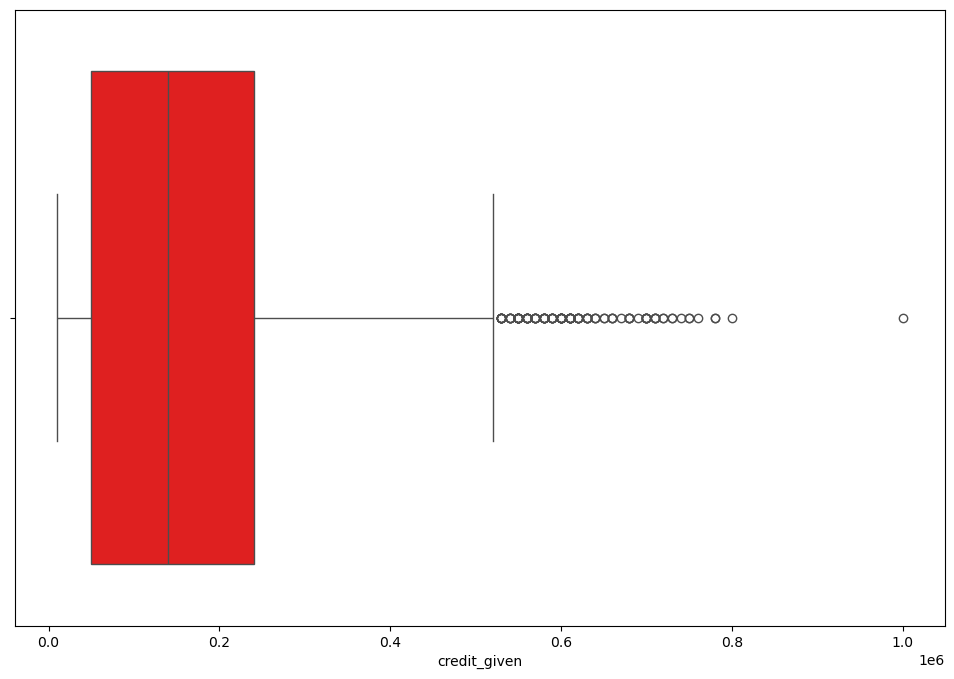

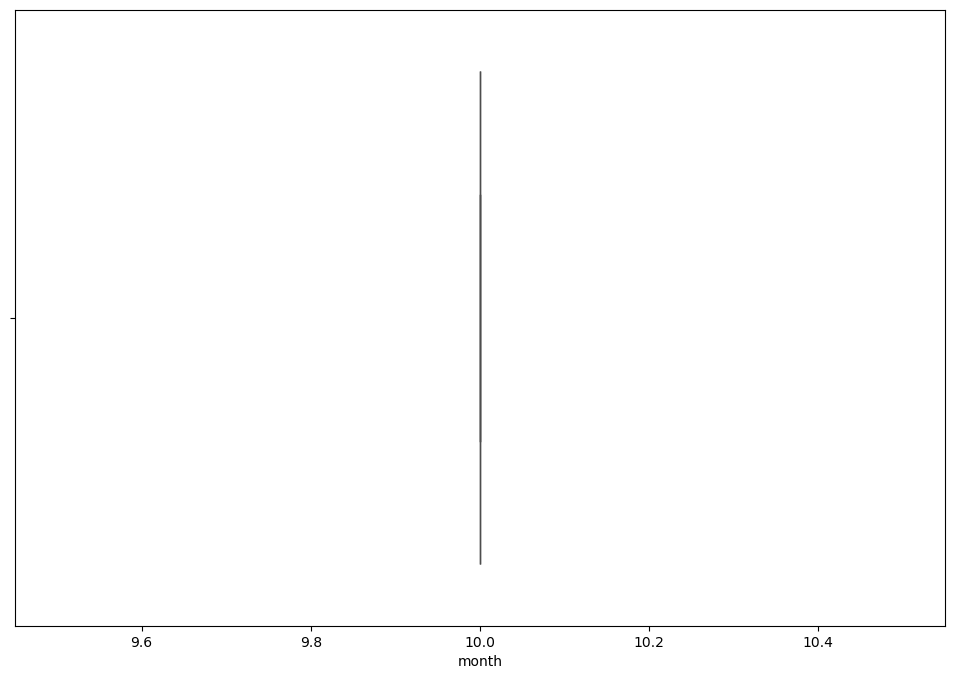

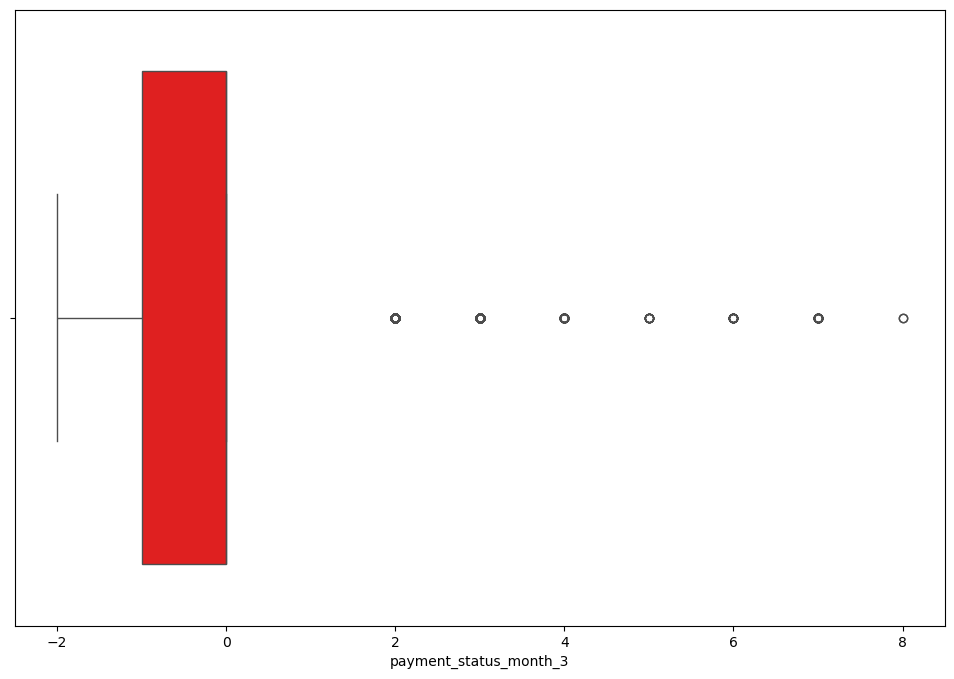

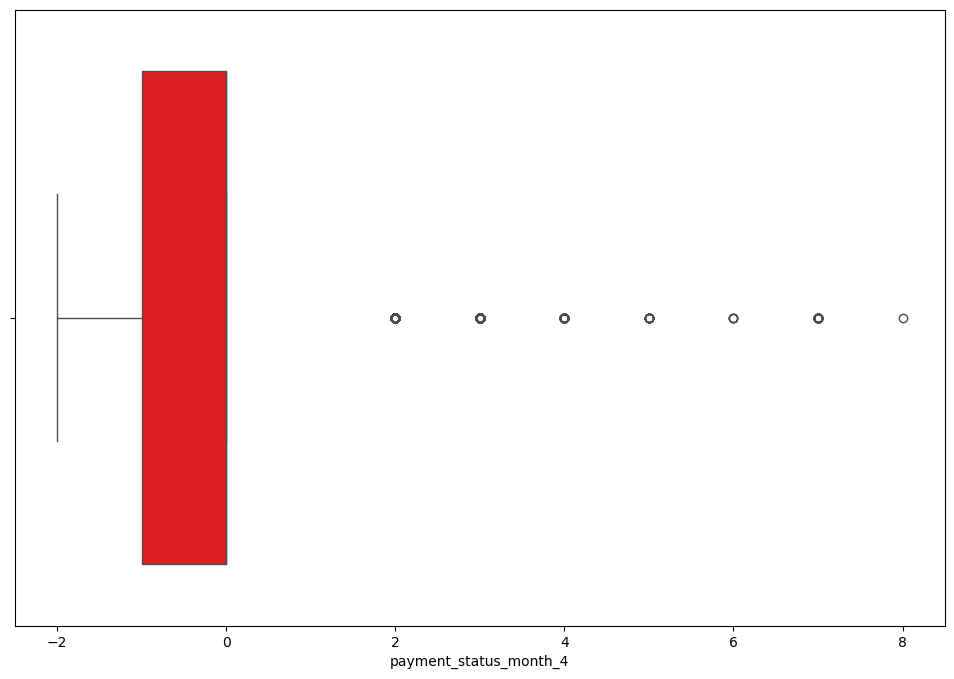

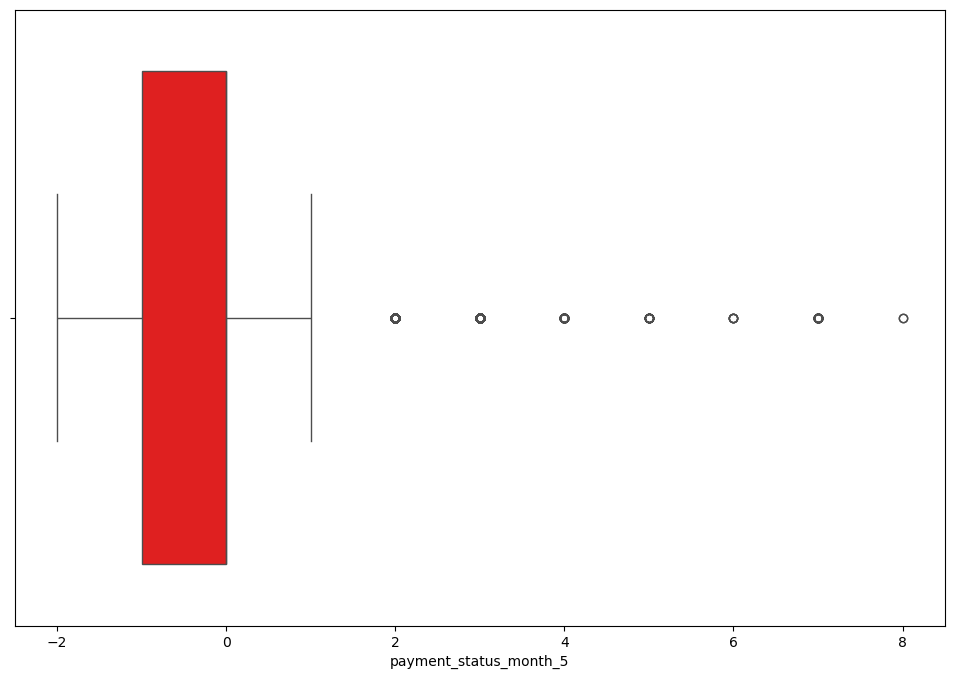

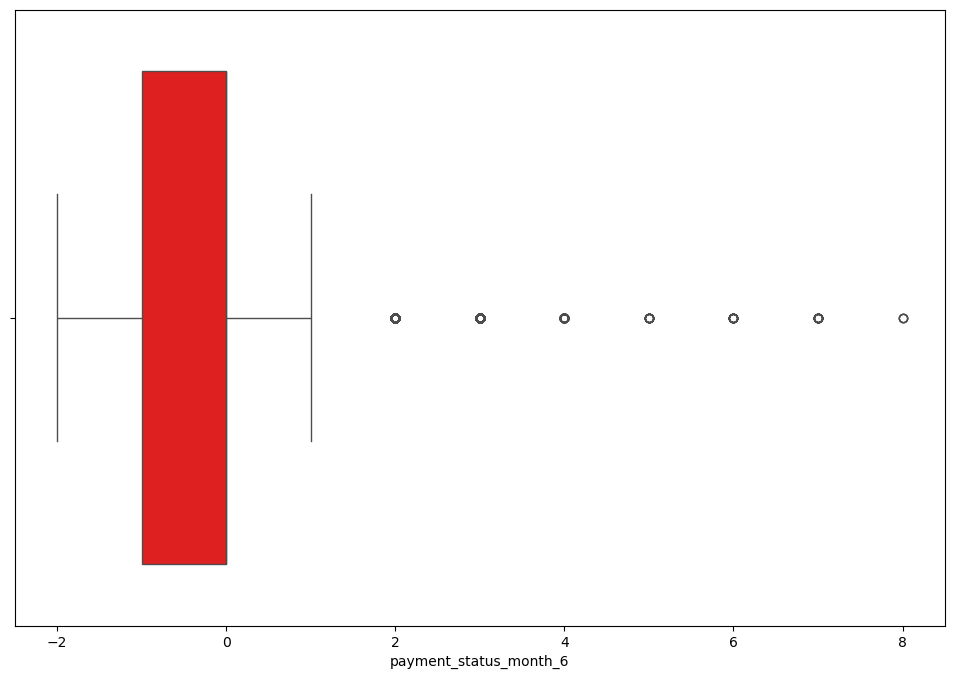

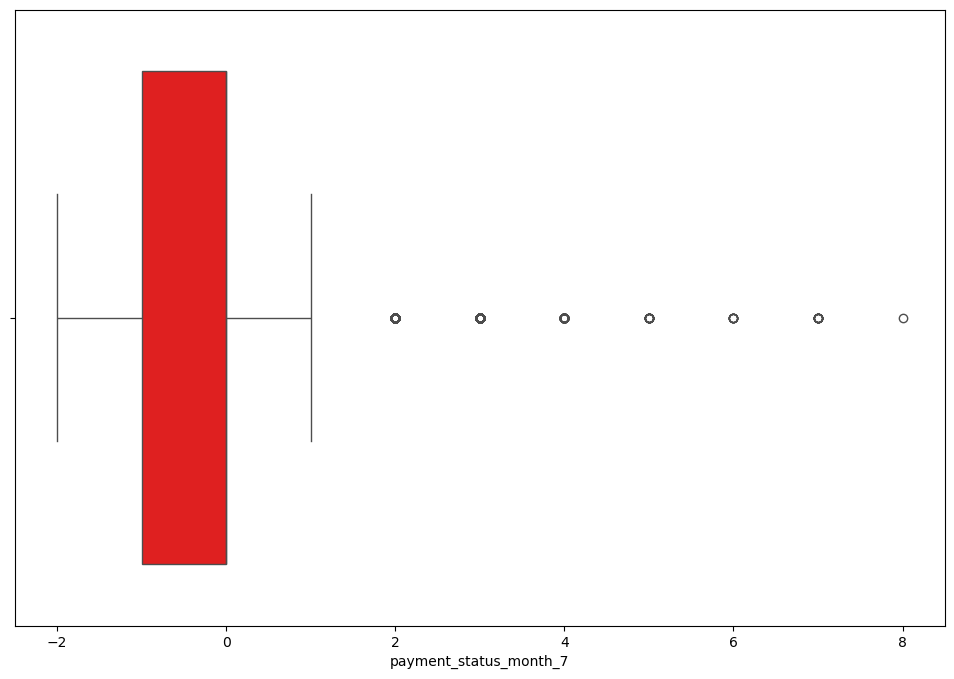

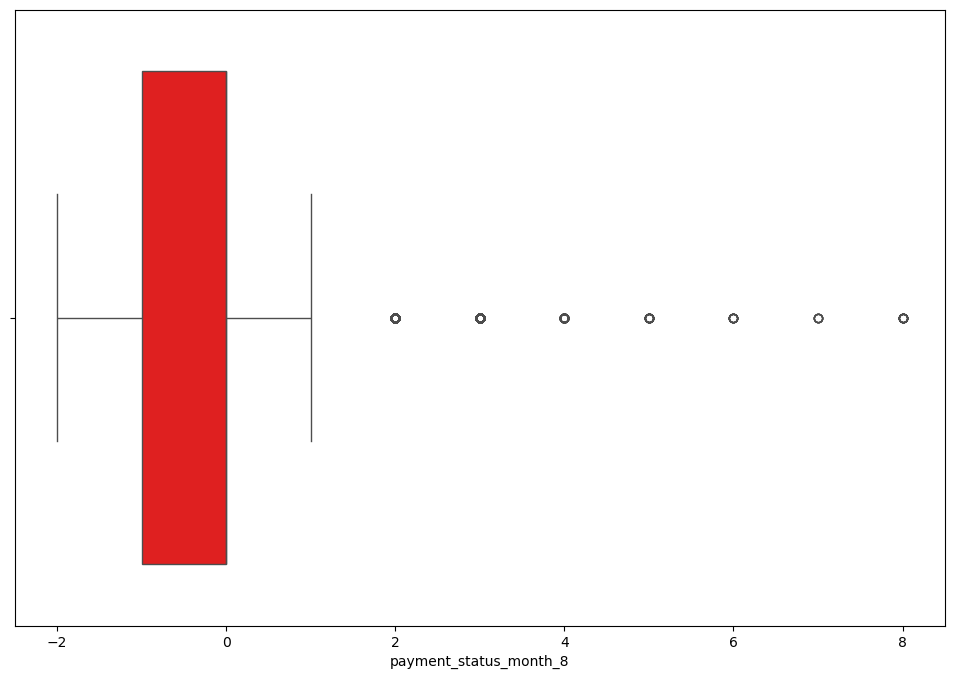

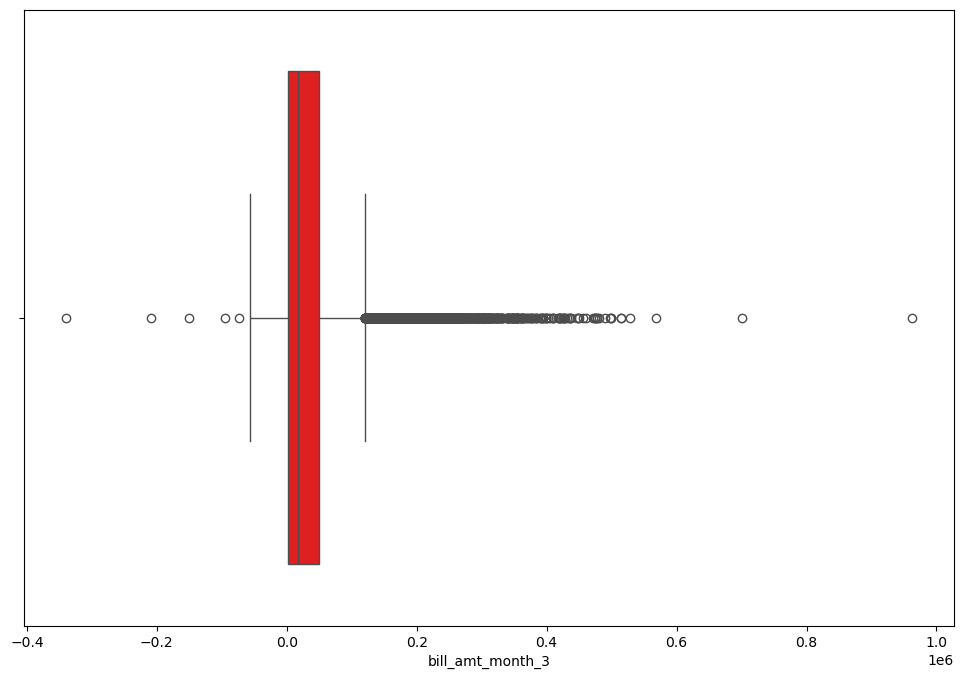

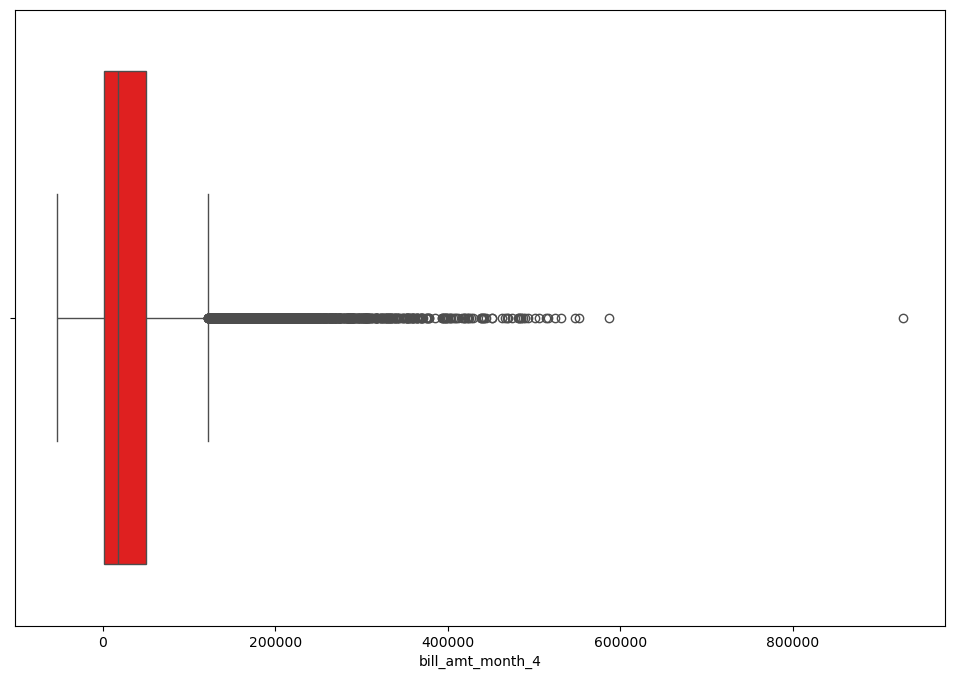

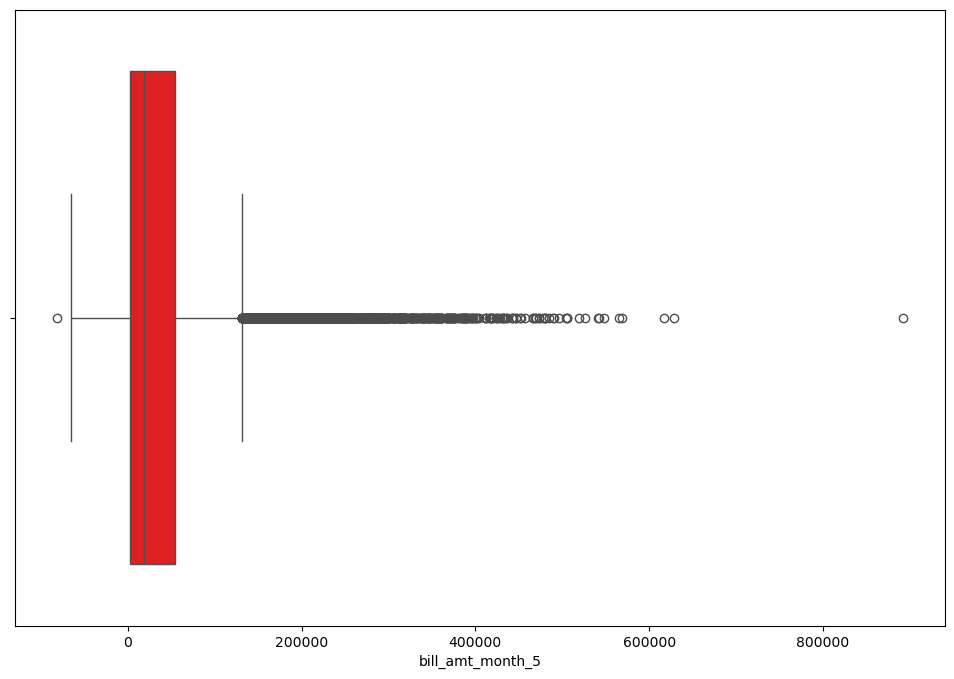

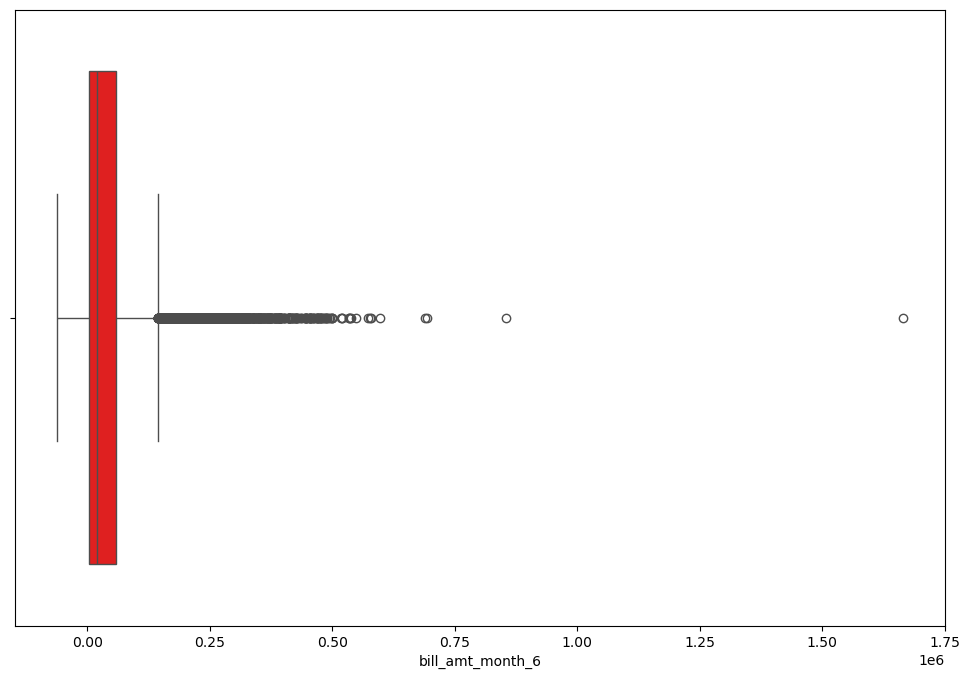

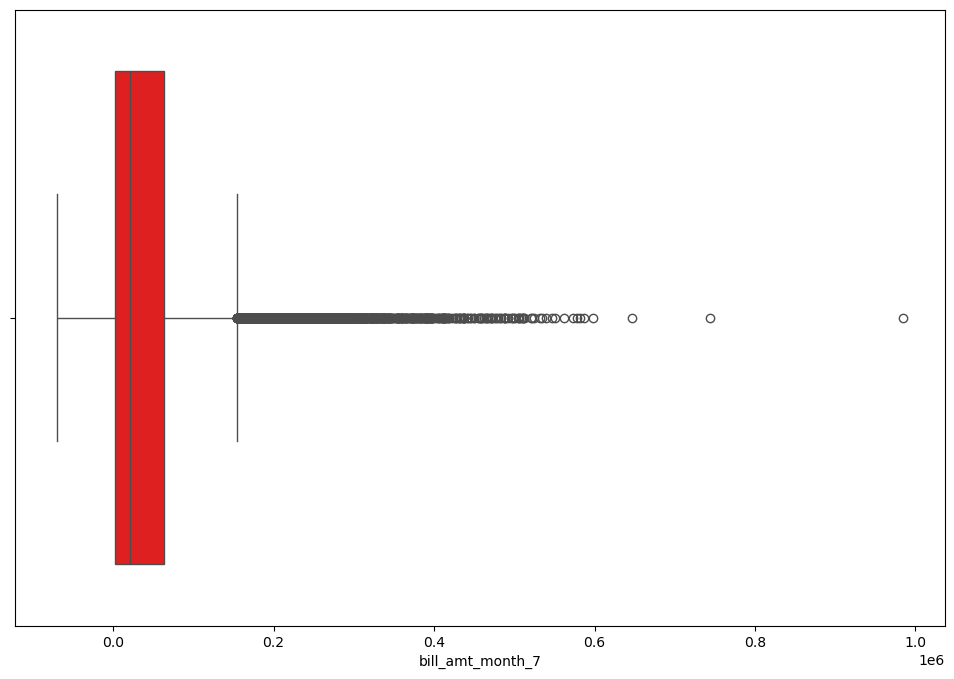

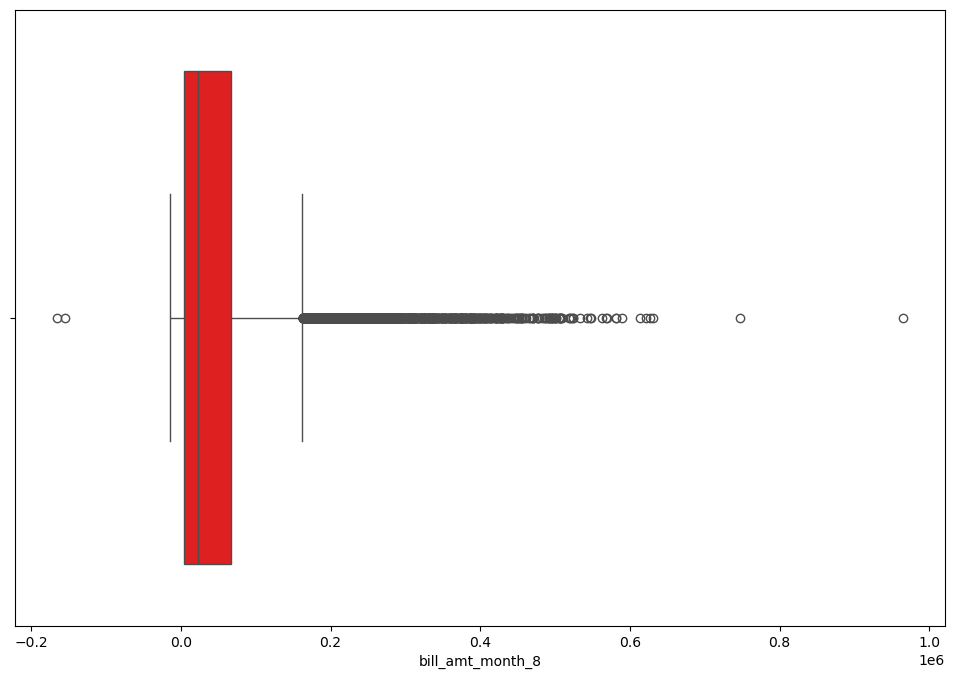

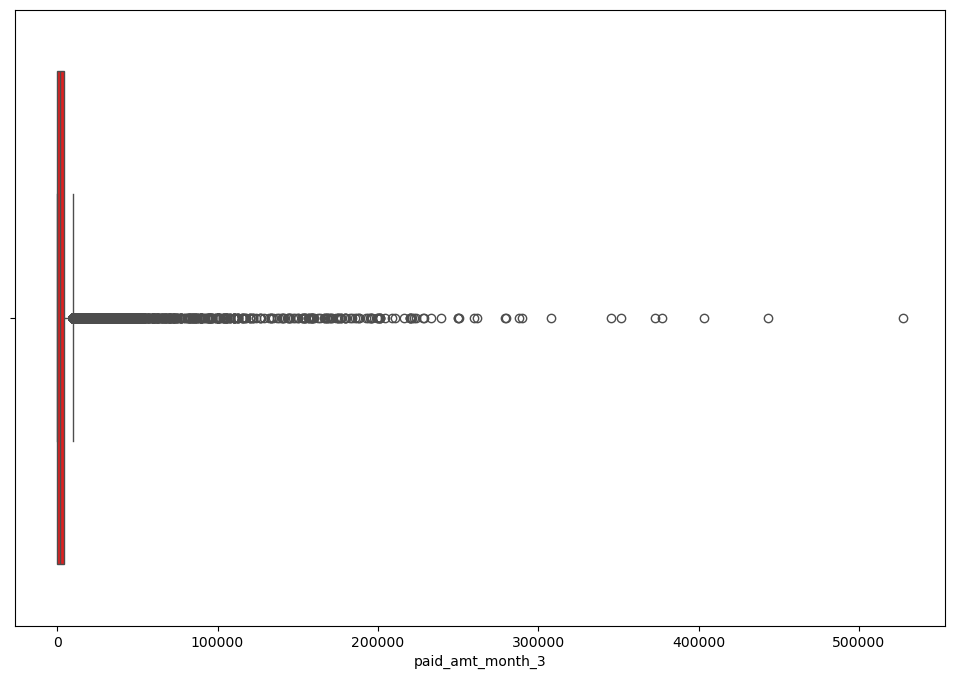

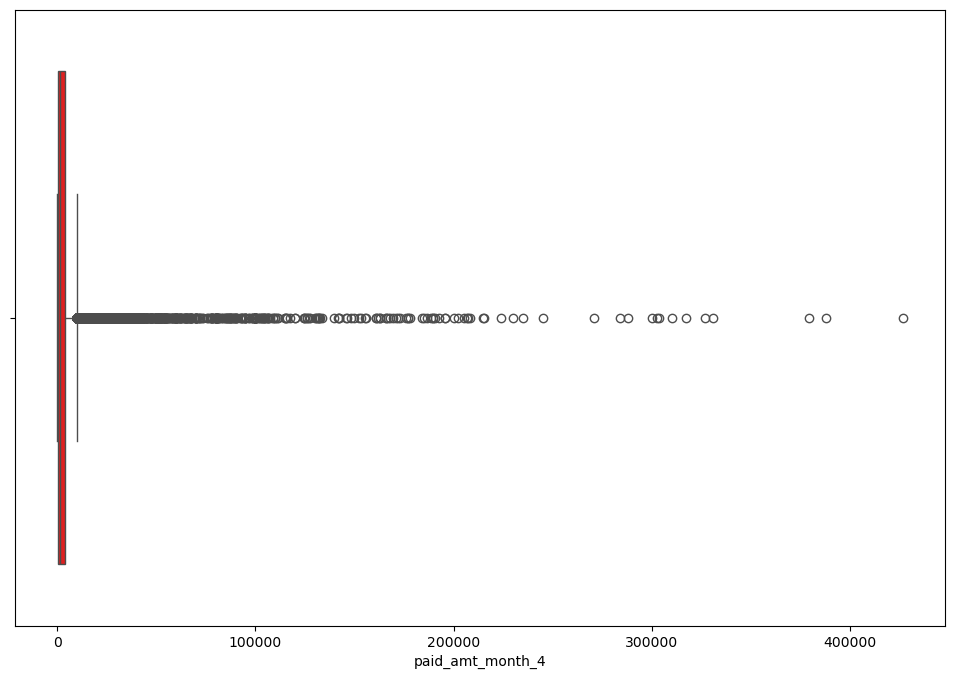

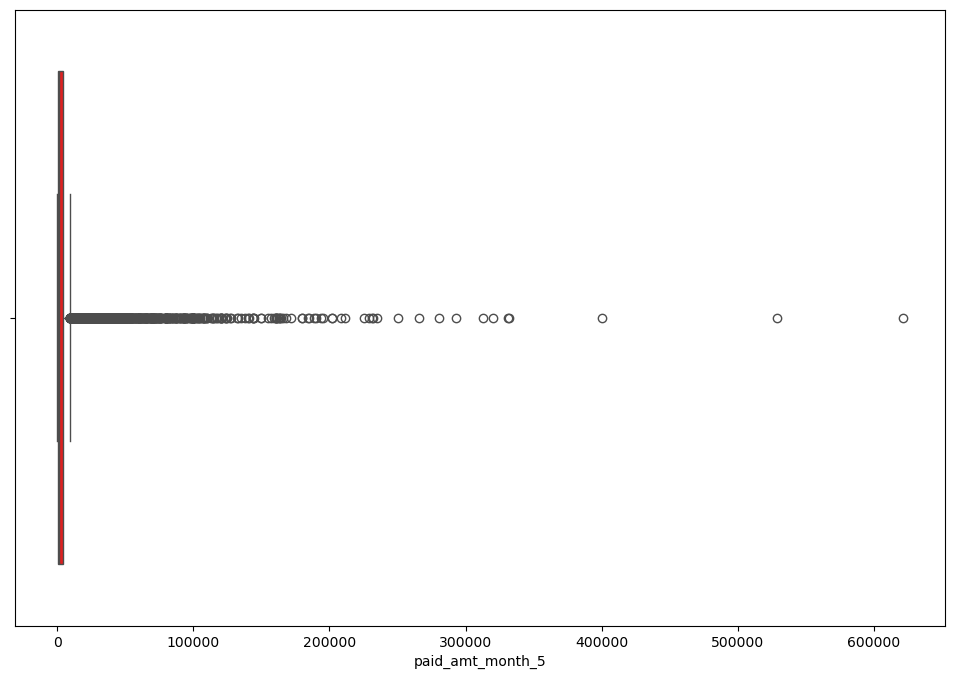

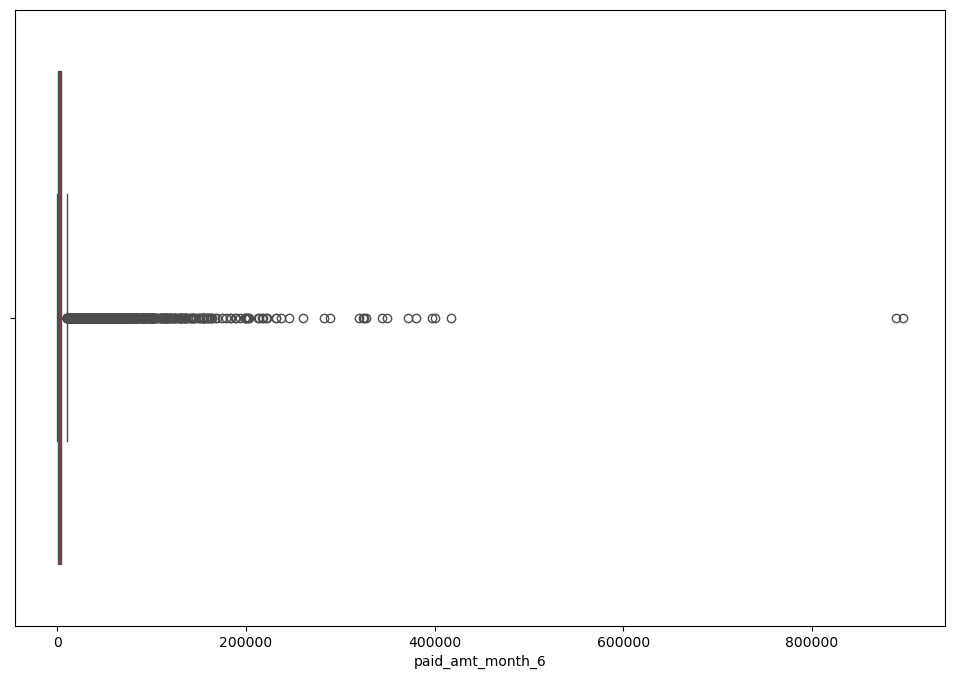

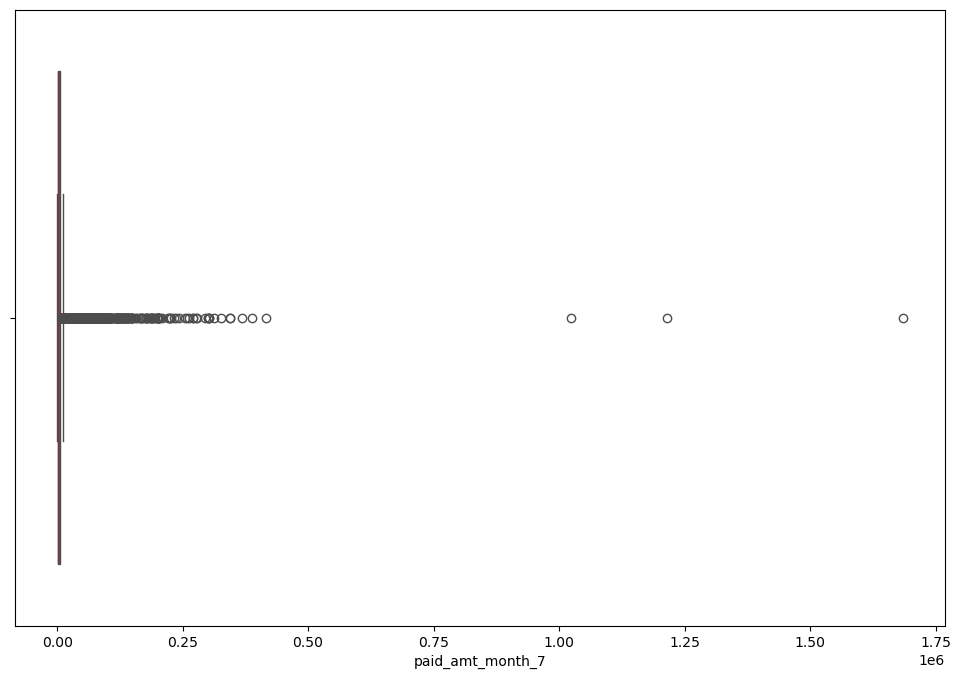

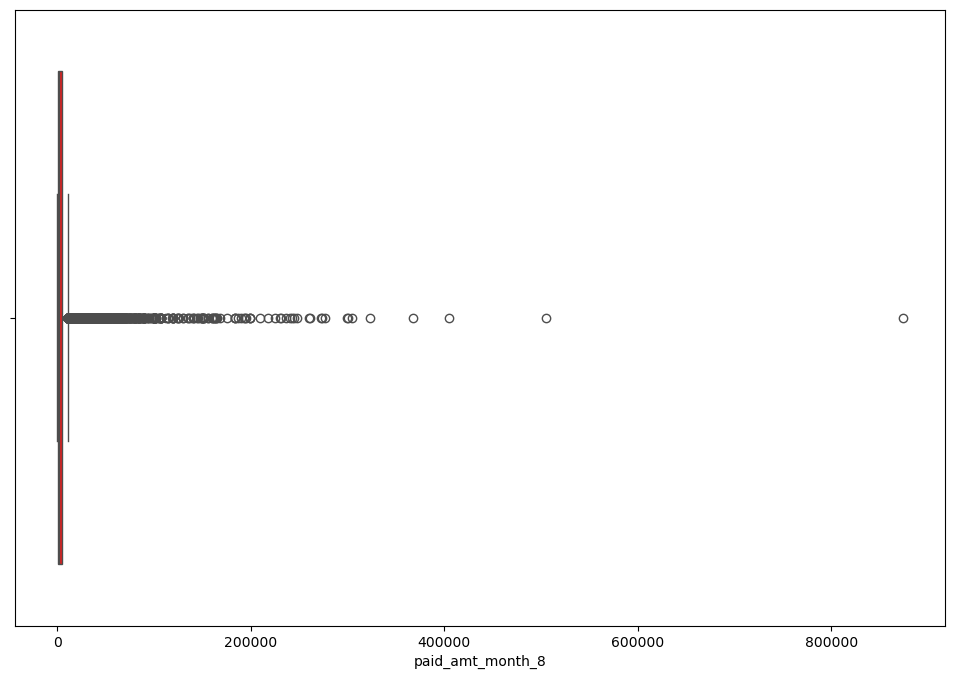

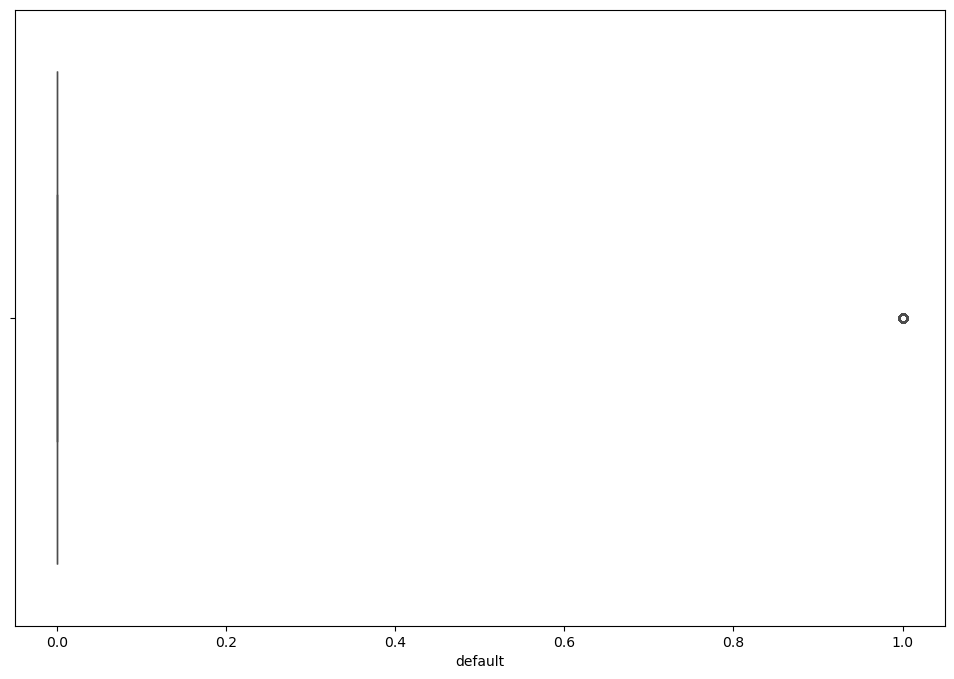

In [200]:
for col in df_loan.describe().columns:
    plt.figure(figsize=(12,8))
    sns.boxplot(x=df_loan[col],color='r')
    

## IQR TO TREAT OUTLIERS - Addressing this outliers will result in the data loss hence no approach to treat outliers

# CATEGORICAL ENCODING

In [207]:
df = df_loan.copy()
df.replace({'default': {'Yes': 1, 'No': 0}}, inplace=True)
df = pd.get_dummies(df, drop_first=False)  
df = df.astype(int)  
df.head()


,credit_given,month,payment_status_month_3,payment_status_month_4,payment_status_month_5,payment_status_month_6,payment_status_month_7,payment_status_month_8,bill_amt_month_3,bill_amt_month_4,...,default,gender_Female,gender_Male,education_Graduate_school,education_High School,education_University,education_others,marital_status_Married,marital_status_Single,marital_status_others
0,90000,10,0,0,0,2,3,1,33291,33091,...,0,1,0,0,0,1,0,0,1,0
1,20000,10,0,0,0,0,0,0,16209,15215,...,1,1,0,0,0,1,0,0,1,0
2,130000,10,-1,-1,0,0,-1,0,0,682,...,0,1,0,0,0,1,0,1,0,0
3,290000,10,0,0,0,0,0,0,22667,23989,...,0,1,0,0,0,1,0,0,1,0
4,240000,10,0,0,0,0,0,0,36783,33993,...,0,1,0,0,0,1,0,0,1,0


In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21455 entries, 0 to 21454
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   credit_given               21455 non-null  int64
 1   month                      21455 non-null  int64
 2   payment_status_month_3     21455 non-null  int64
 3   payment_status_month_4     21455 non-null  int64
 4   payment_status_month_5     21455 non-null  int64
 5   payment_status_month_6     21455 non-null  int64
 6   payment_status_month_7     21455 non-null  int64
 7   payment_status_month_8     21455 non-null  int64
 8   bill_amt_month_3           21455 non-null  int64
 9   bill_amt_month_4           21455 non-null  int64
 10  bill_amt_month_5           21455 non-null  int64
 11  bill_amt_month_6           21455 non-null  int64
 12  bill_amt_month_7           21455 non-null  int64
 13  bill_amt_month_8           21455 non-null  int64
 14  paid_amt_month_3      

In [210]:
df.columns

Index(['credit_given', 'month', 'payment_status_month_3',
       'payment_status_month_4', 'payment_status_month_5',
       'payment_status_month_6', 'payment_status_month_7',
       'payment_status_month_8', 'bill_amt_month_3', 'bill_amt_month_4',
       'bill_amt_month_5', 'bill_amt_month_6', 'bill_amt_month_7',
       'bill_amt_month_8', 'paid_amt_month_3', 'paid_amt_month_4',
       'paid_amt_month_5', 'paid_amt_month_6', 'paid_amt_month_7',
       'paid_amt_month_8', 'default', 'gender_Female', 'gender_Male',
       'education_Graduate_school', 'education_High School',
       'education_University', 'education_others', 'marital_status_Married',
       'marital_status_Single', 'marital_status_others'],
      dtype='object')

# FEATURE SELECTION

## Feature Selection Using Chi-Squared Test (SelectKBest)

In [213]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
data=df
X=data.drop('default',axis=1)
Y=data['default']
scaler=MinMaxScaler()
X=scaler.fit_transform(X)
K_best=SelectKBest(score_func=chi2,k='all')
K_best.fit(X,Y)
features_scores=K_best.scores_
featured_chi2_scores=pd.DataFrame({'Feature':data.columns[:-1],'Chi-squared_Score':features_scores})
featured_chi2_scores=featured_chi2_scores.sort_values(by='Chi-squared_Score',ascending=False)
print(featured_chi2_scores)


                      Feature  Chi-squared_Score
7      payment_status_month_8         144.233317
6      payment_status_month_7         116.307630
5      payment_status_month_6          91.602165
4      payment_status_month_5          77.781532
3      payment_status_month_4          65.473218
0                credit_given          57.066200
2      payment_status_month_3          57.059437
25       education_University          51.720452
22                gender_Male          45.624961
23  education_Graduate_school          26.651040
21              gender_Female          24.661145
24      education_High School          17.061724
20                    default          16.164847
15           paid_amt_month_4           9.642592
26           education_others           7.935234
27     marital_status_Married           7.847485
14           paid_amt_month_3           7.027187
16           paid_amt_month_5           6.303717
19           paid_amt_month_8           6.062237
17           paid_am

## Feature Selection Using Mutual Information (Information Gain)

In [215]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
data = df.copy()
X = data.drop('default', axis=1)  
Y = data['default']  
K_best = SelectKBest(score_func=mutual_info_classif, k='all')
K_best.fit(X, Y)  
feature_scores = K_best.scores_
feature_info_gain = pd.DataFrame({
    'Feature': X.columns,
    'Information_gain': feature_scores
})
feature_info_gain = feature_info_gain.sort_values(by='Information_gain', ascending=False)
print(feature_info_gain)


                      Feature  Information_gain
7      payment_status_month_8          0.072362
6      payment_status_month_7          0.050845
5      payment_status_month_6          0.034816
4      payment_status_month_5          0.032606
3      payment_status_month_4          0.032443
2      payment_status_month_3          0.026153
19           paid_amt_month_8          0.023059
17           paid_amt_month_6          0.022599
0                credit_given          0.020952
16           paid_amt_month_5          0.018265
18           paid_amt_month_7          0.017830
15           paid_amt_month_4          0.017013
14           paid_amt_month_3          0.010943
9            bill_amt_month_4          0.010114
11           bill_amt_month_6          0.009386
1                       month          0.006083
12           bill_amt_month_7          0.005268
22  education_Graduate_school          0.005052
13           bill_amt_month_8          0.004992
10           bill_amt_month_5          0

# DATA TRANSFORMATION

/var/folders/6p/j5my1gh17rs9dhxtmc5r7w3c0000gn/T/ipykernel_10261/3527487410.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
/var/folders/6p/j5my1gh17rs9dhxtmc5r7w3c0000gn/T/ipykernel_10261/3527487410.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
/opt/anaconda3/lib/pyt

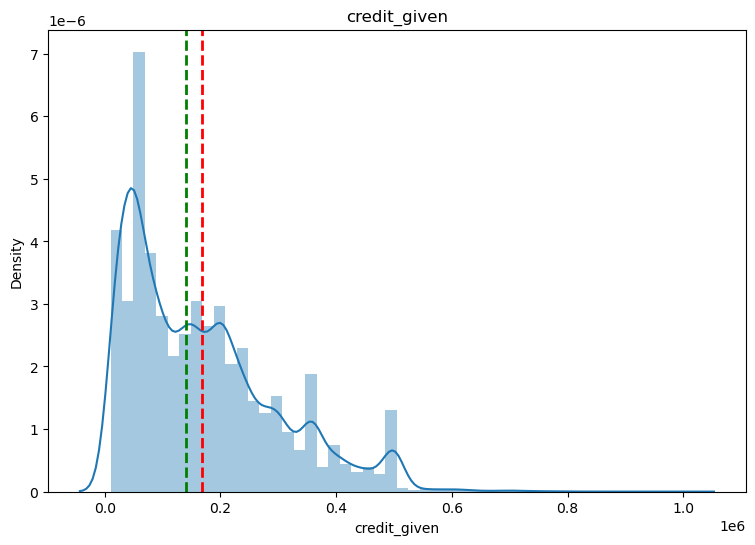

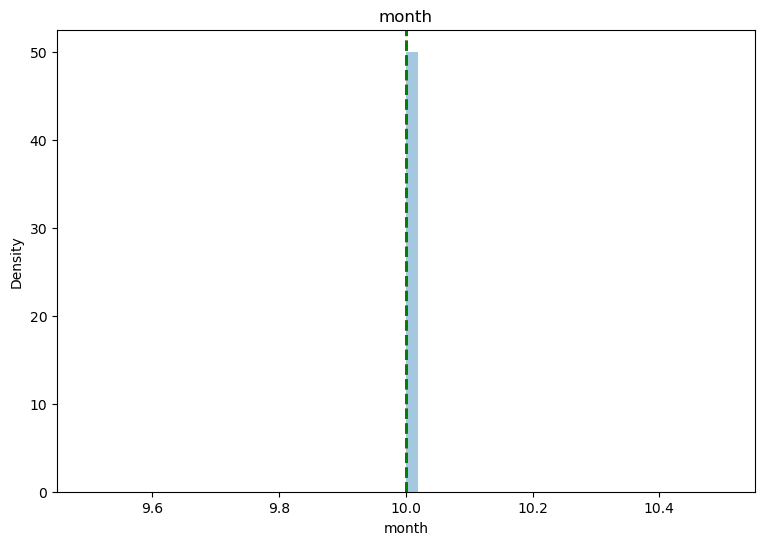

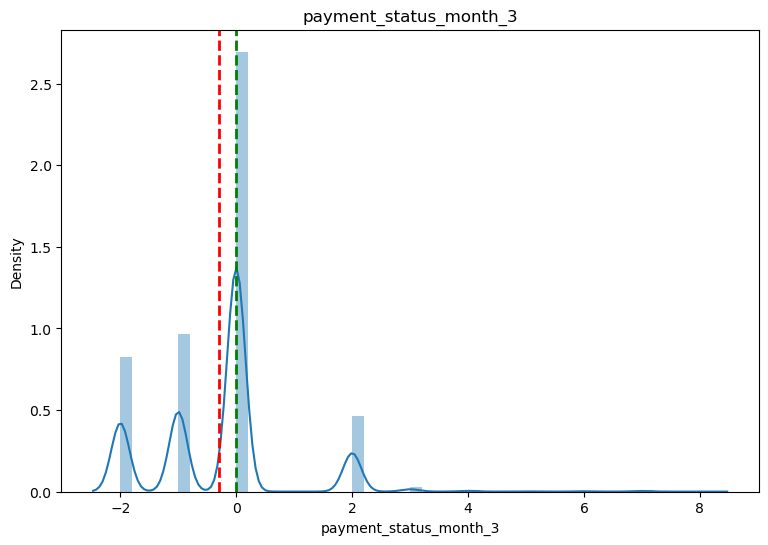

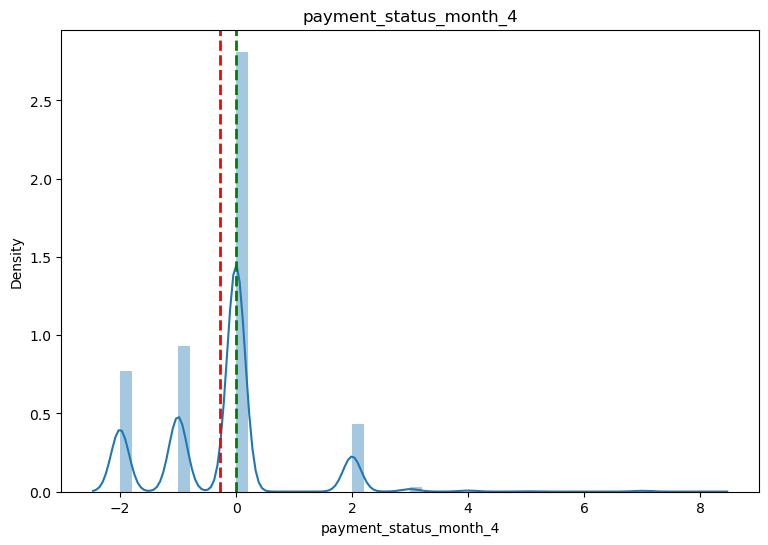

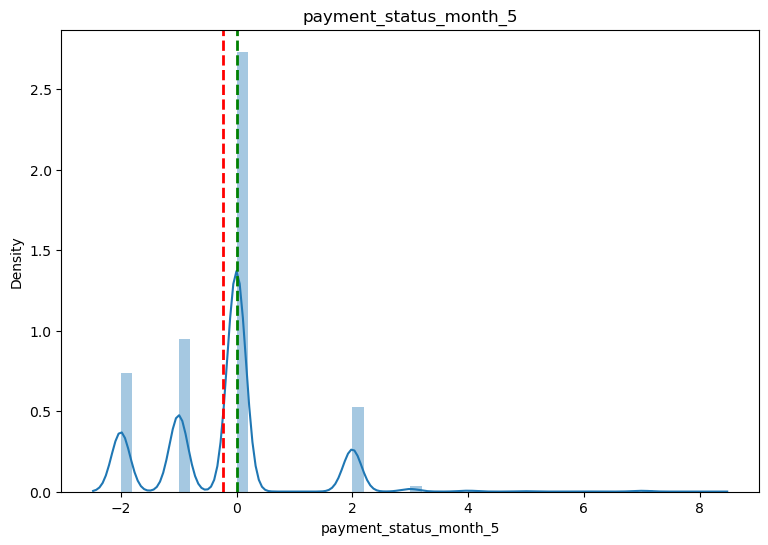

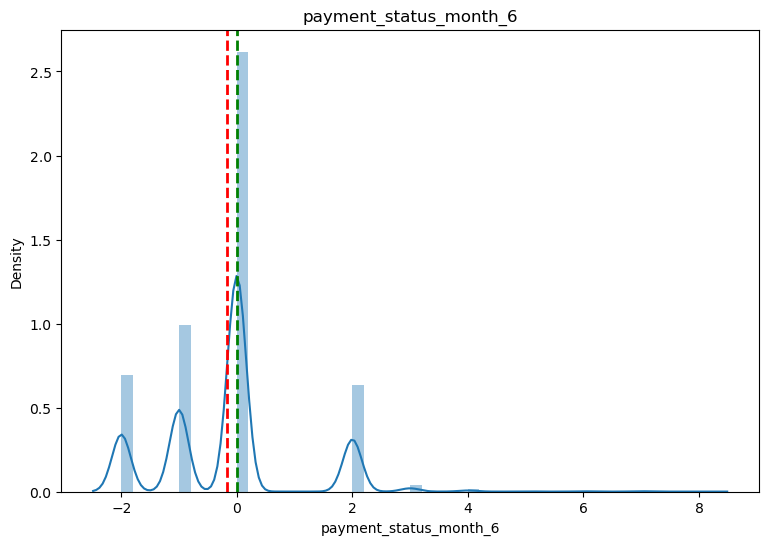

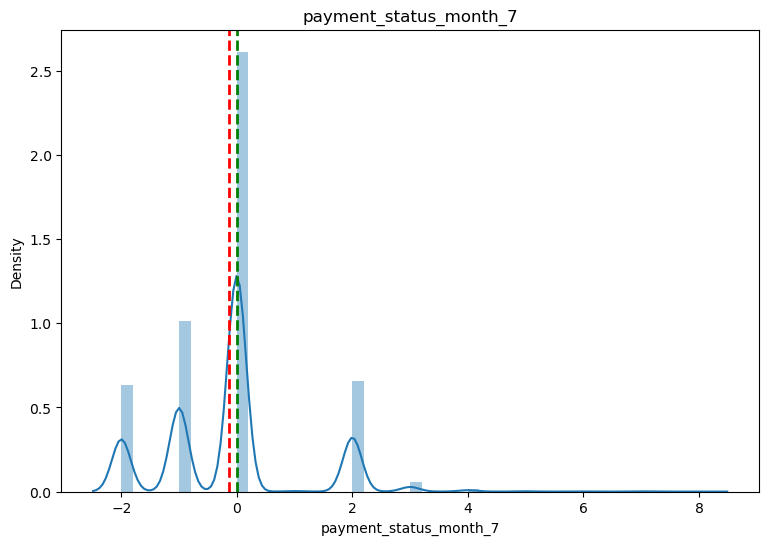

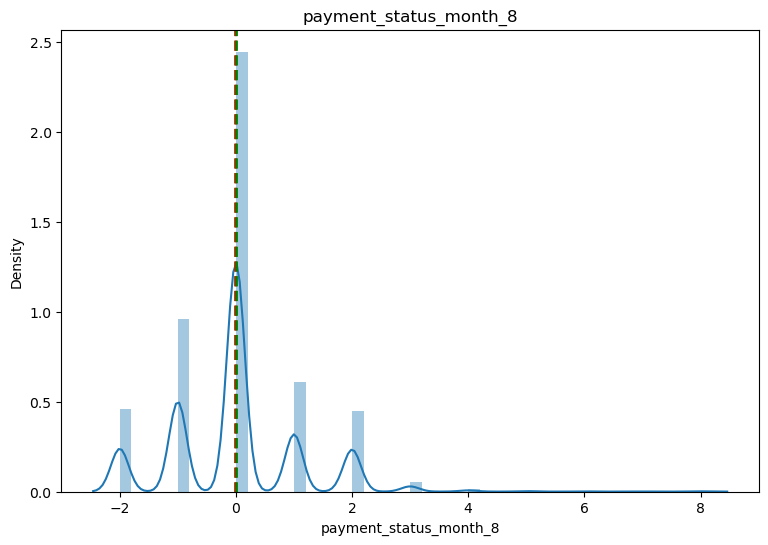

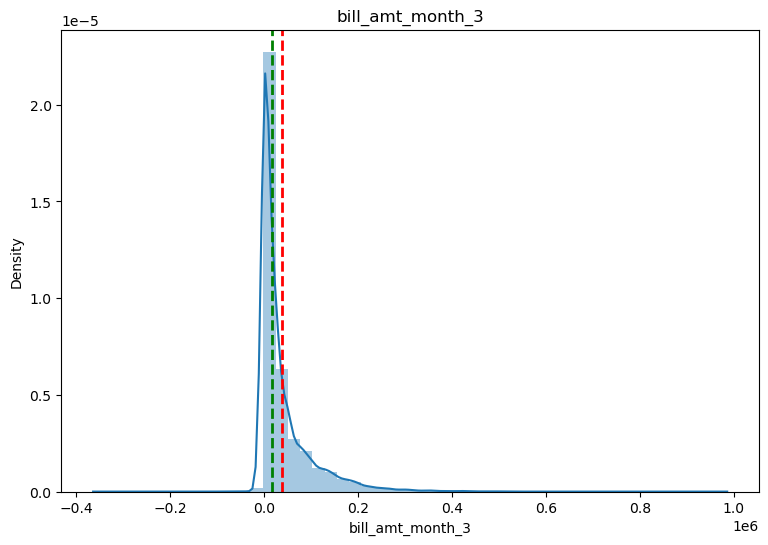

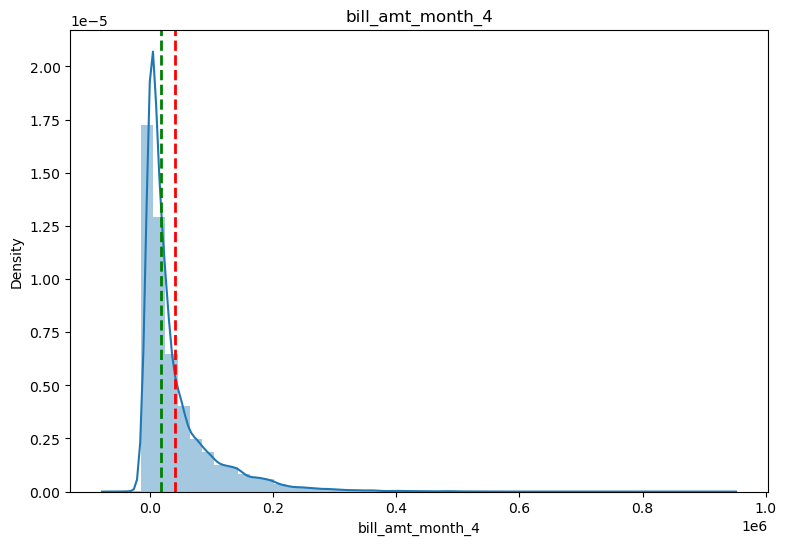

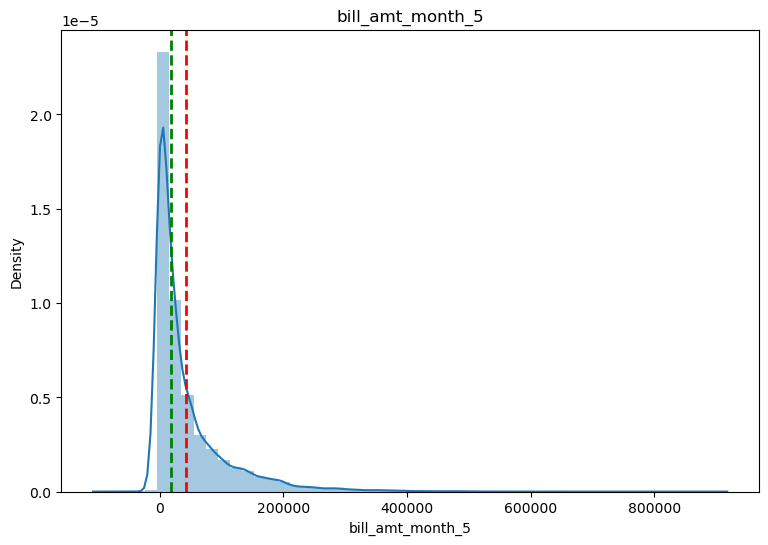

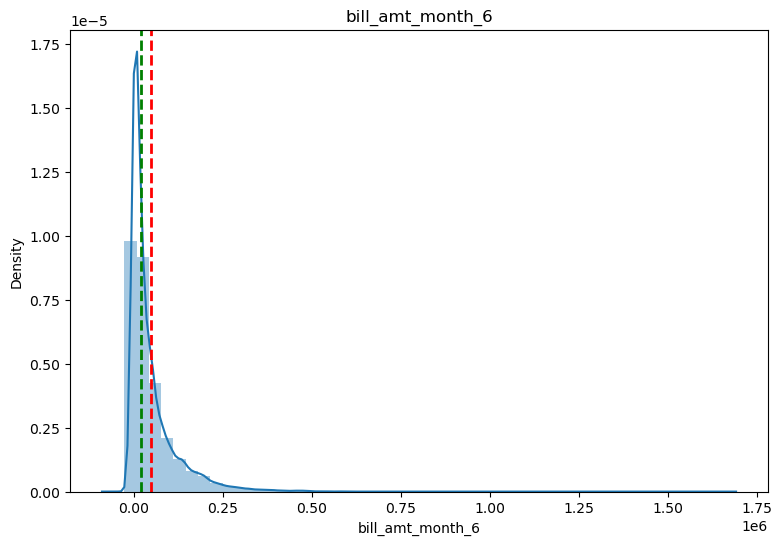

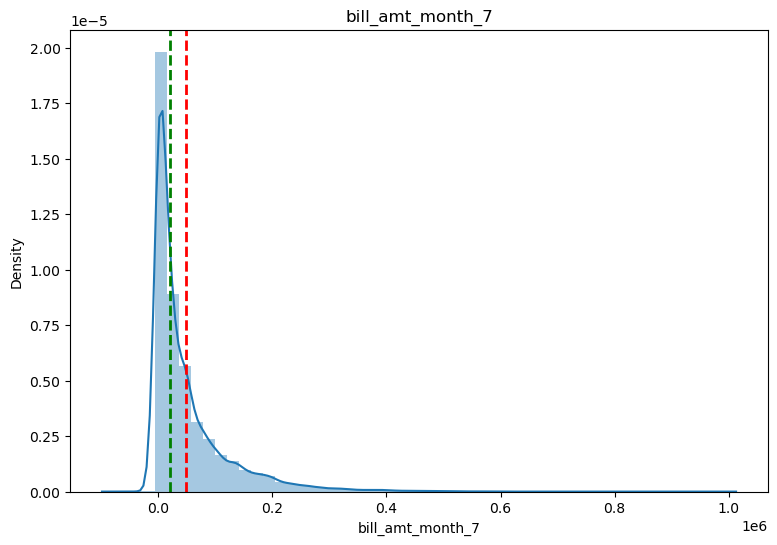

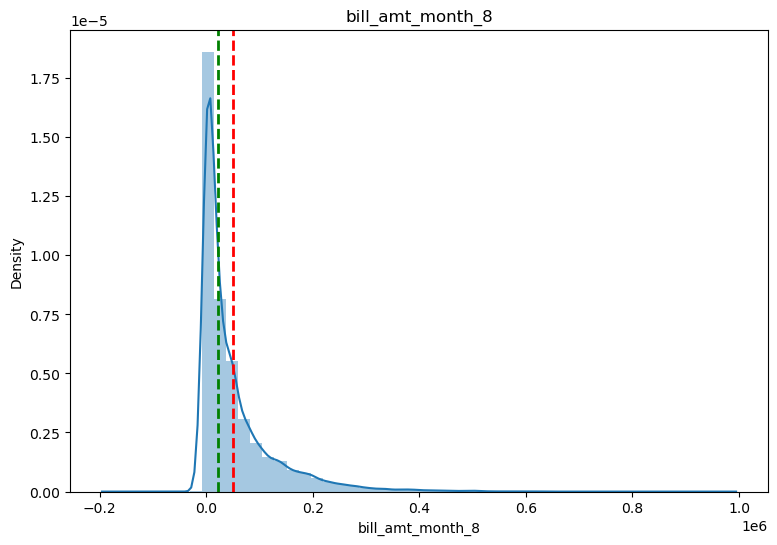

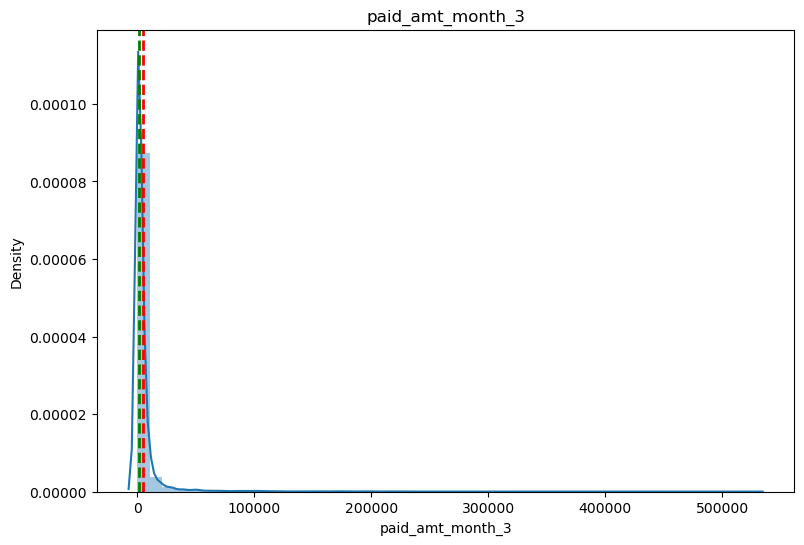

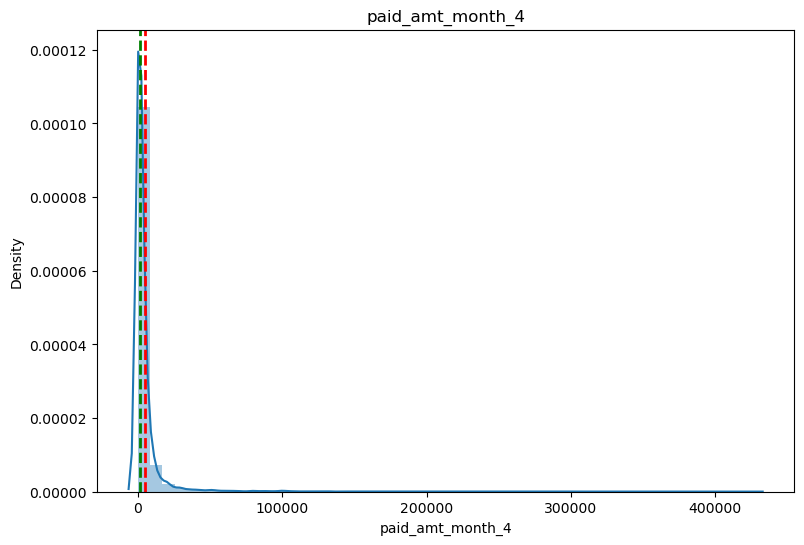

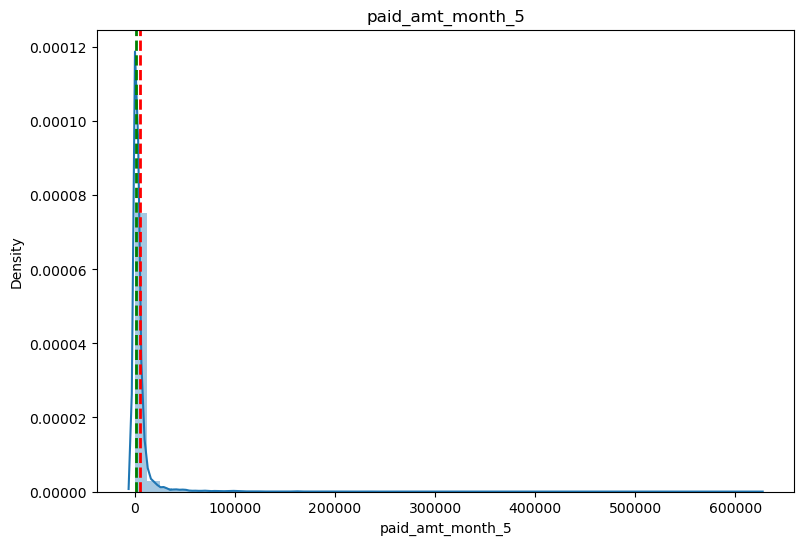

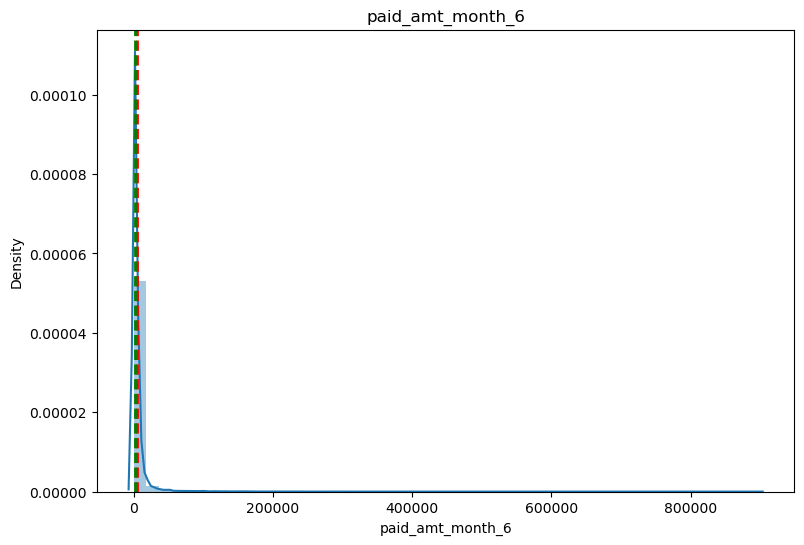

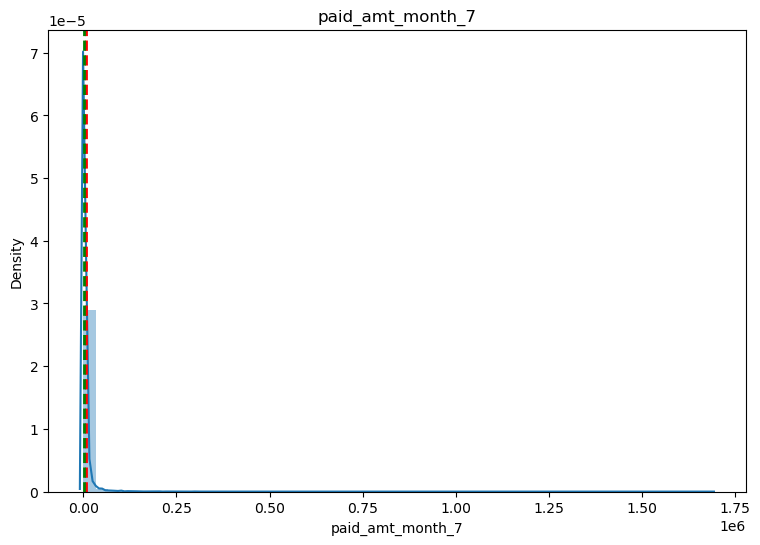

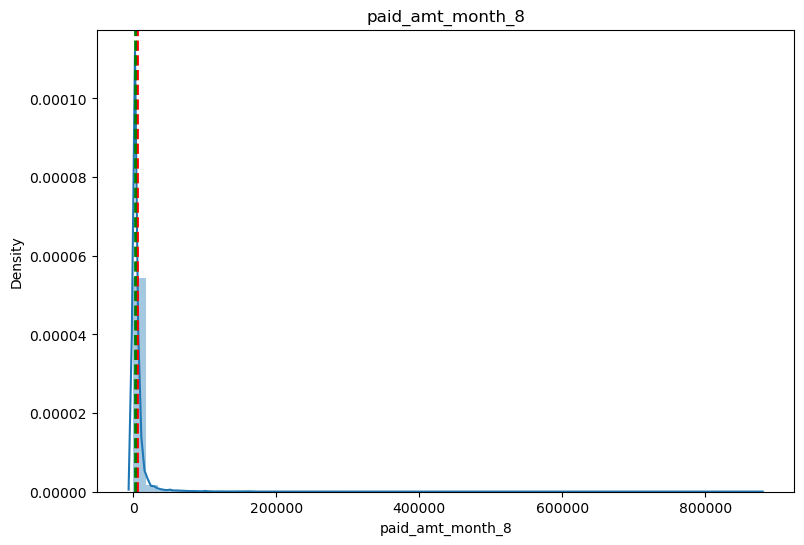

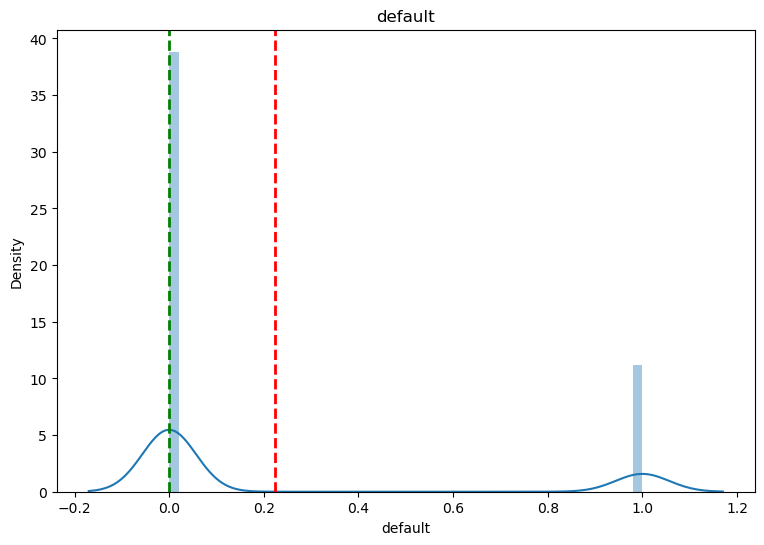

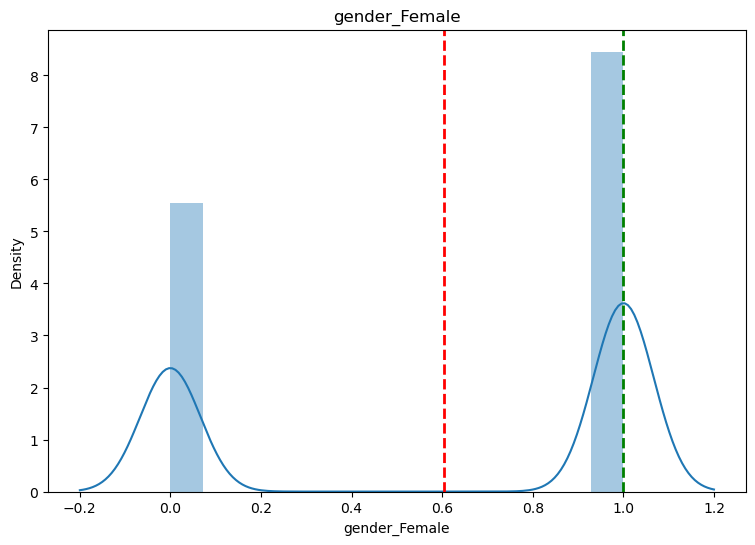

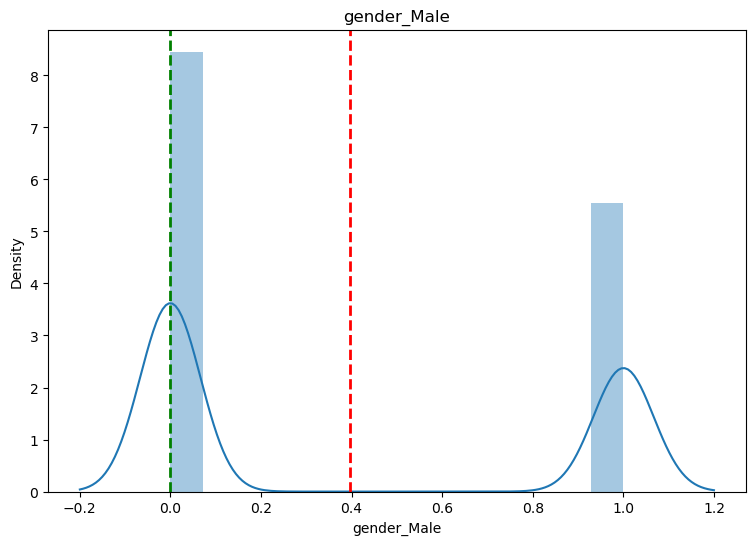

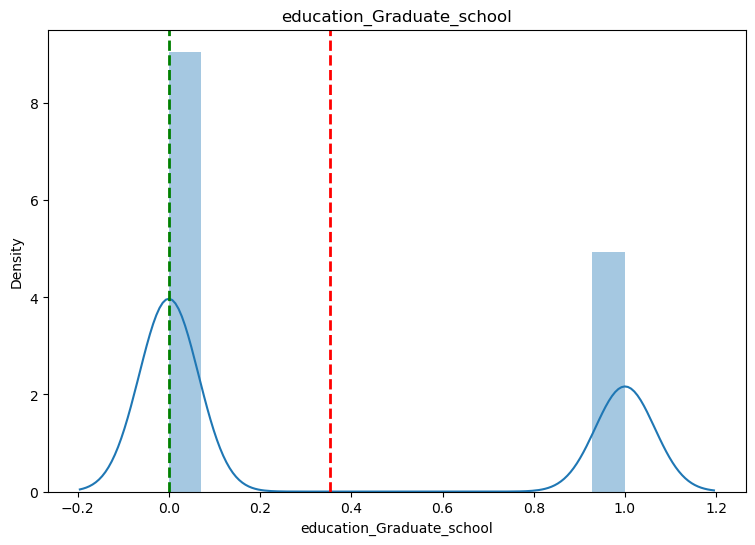

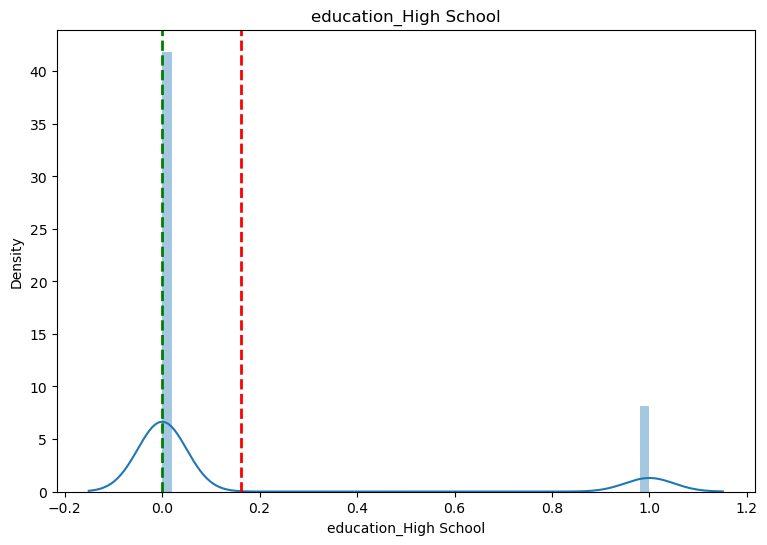

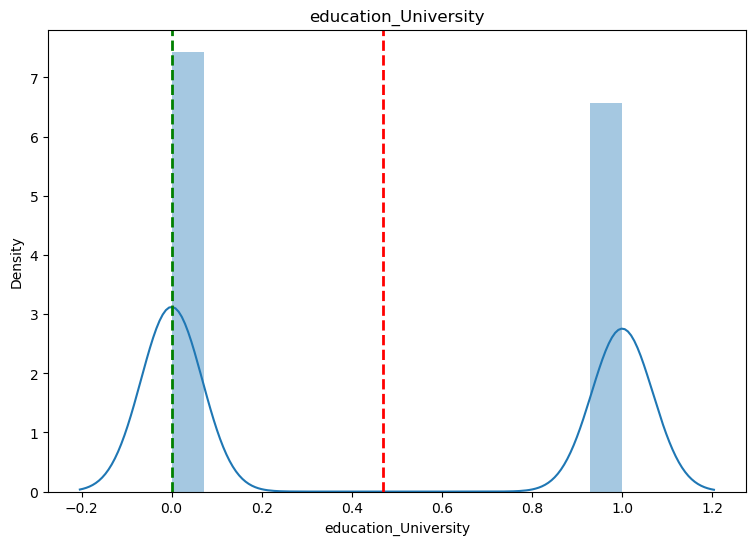

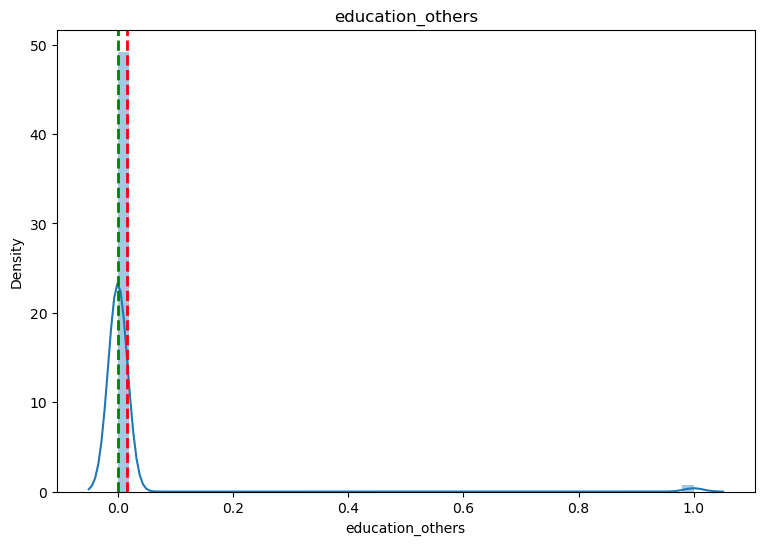

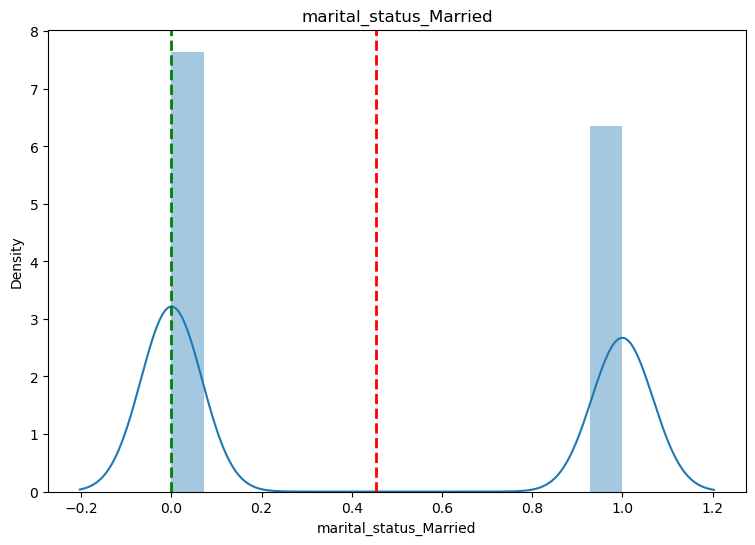

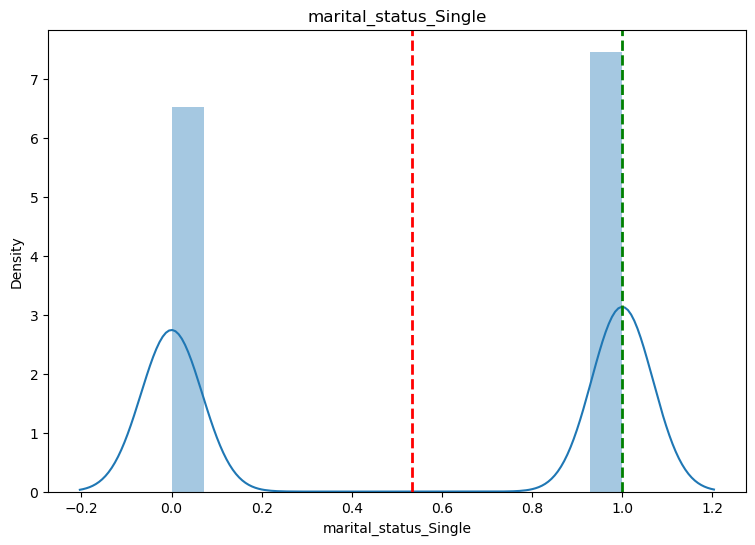

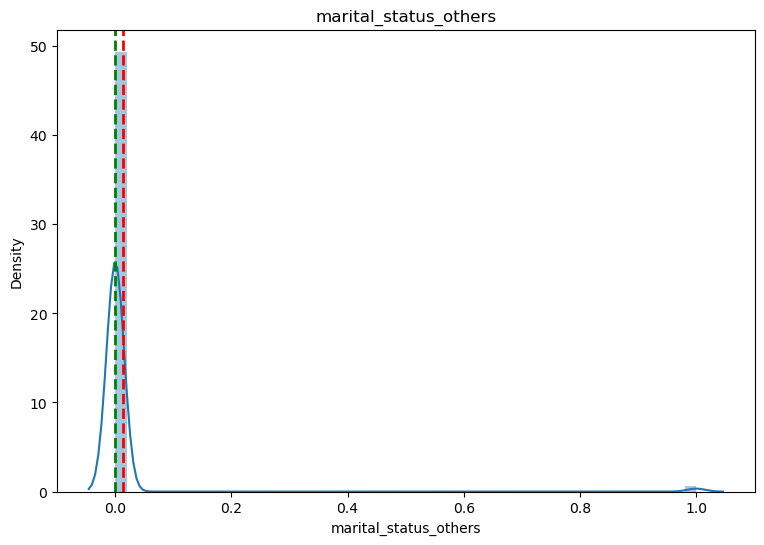

In [218]:
for col in df.describe().columns:
    fig=plt.figure(figsize=(9,6))
    ax=fig.gca()
    feature=(df[col])
    sns.distplot(df[col])
    ax.axvline(feature.mean(),color='red',linestyle='dashed',linewidth=2)
    ax.axvline(feature.median(),color='green',linestyle='dashed',linewidth=2)
    ax.set_title(col)
plt.show()
    

## Inference : mean and median are not fair enough so no need to do data transformation**

# NORMALITY

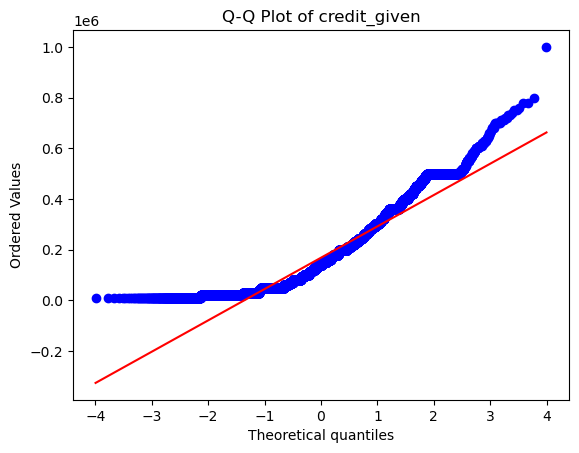

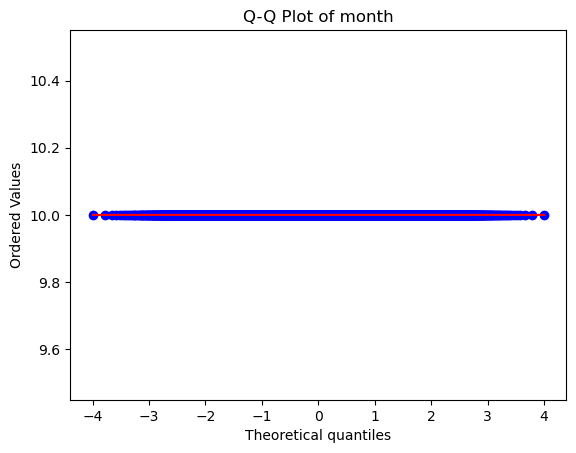

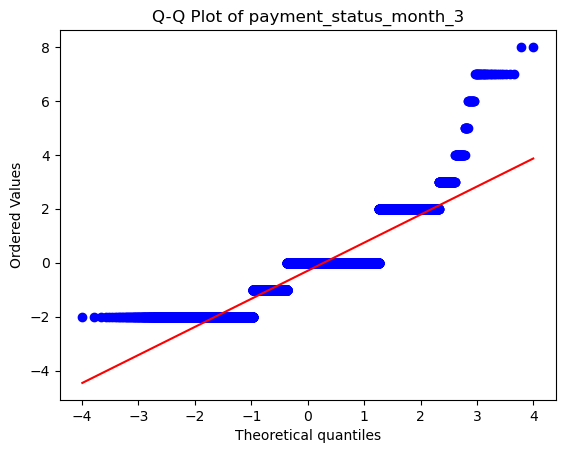

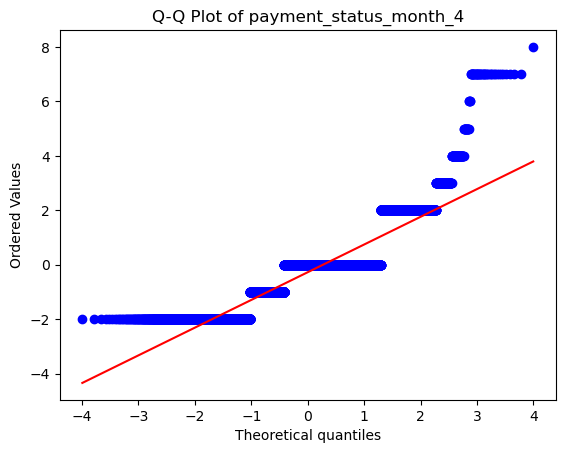

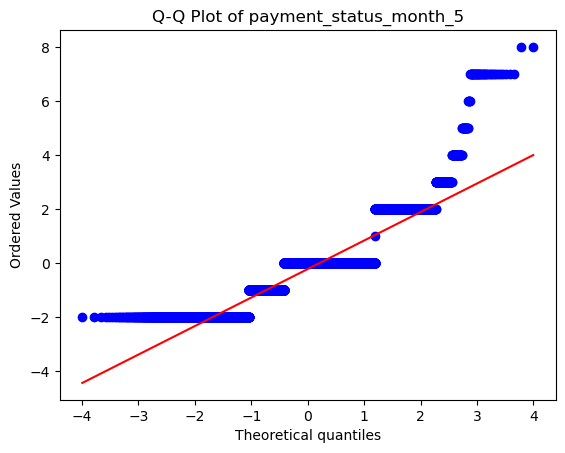

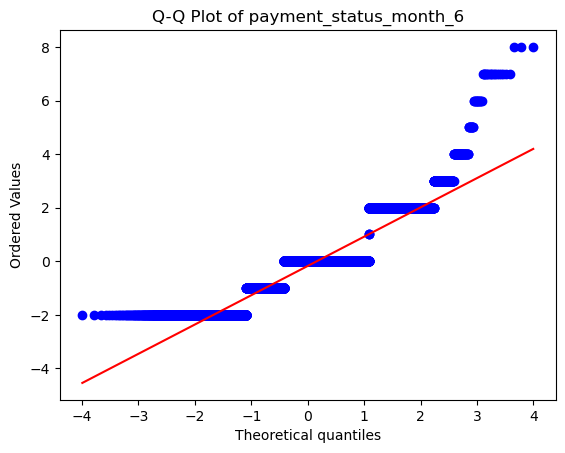

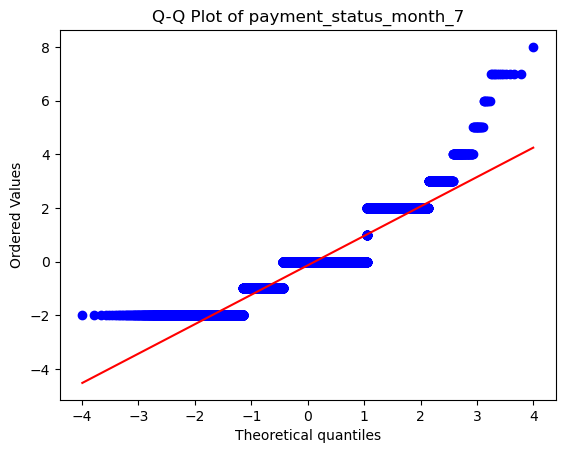

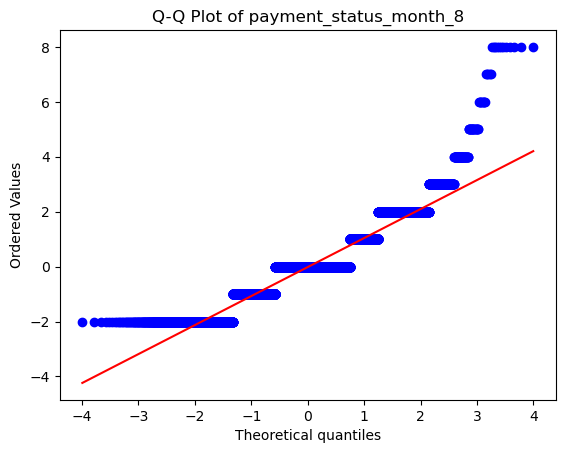

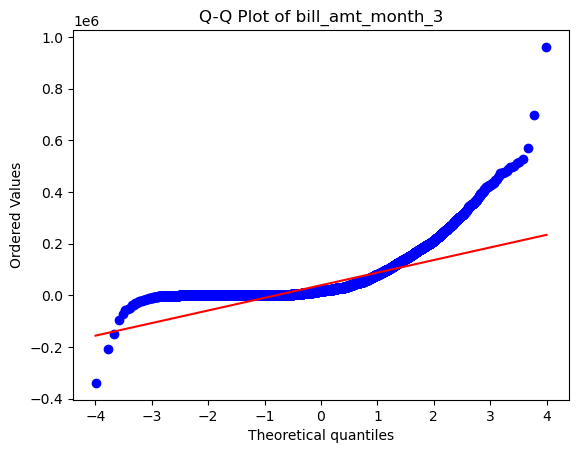

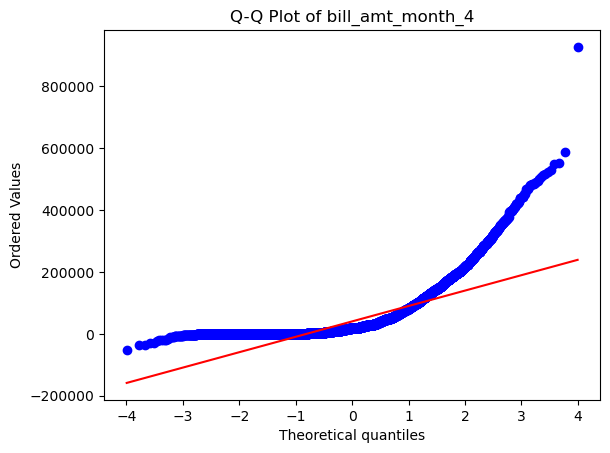

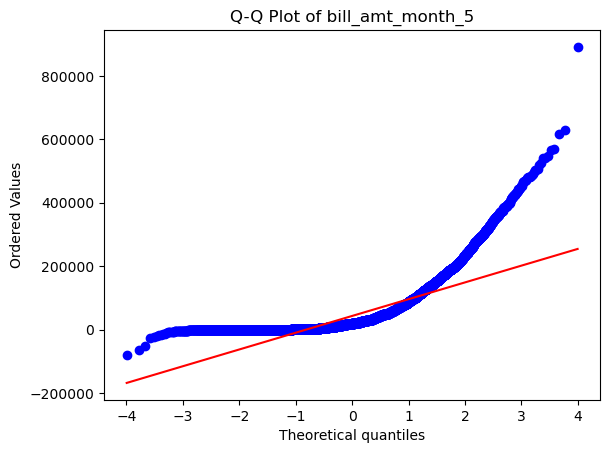

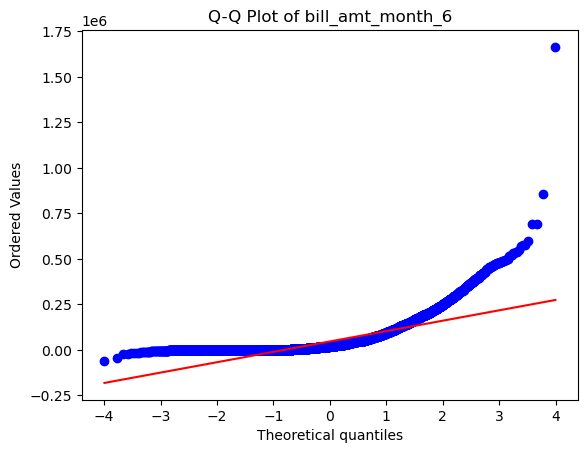

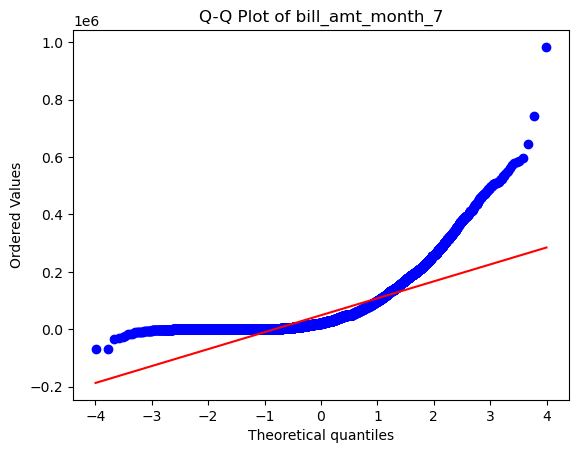

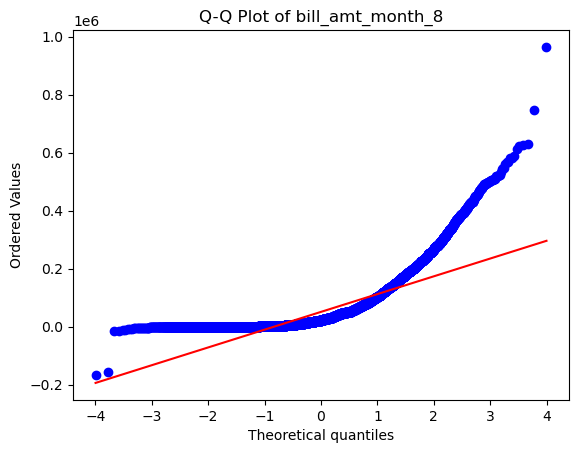

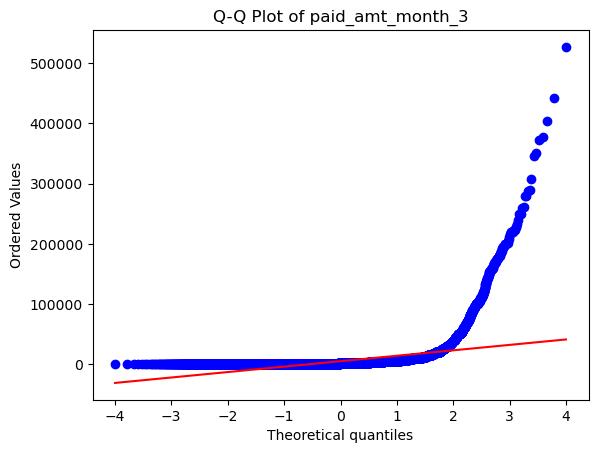

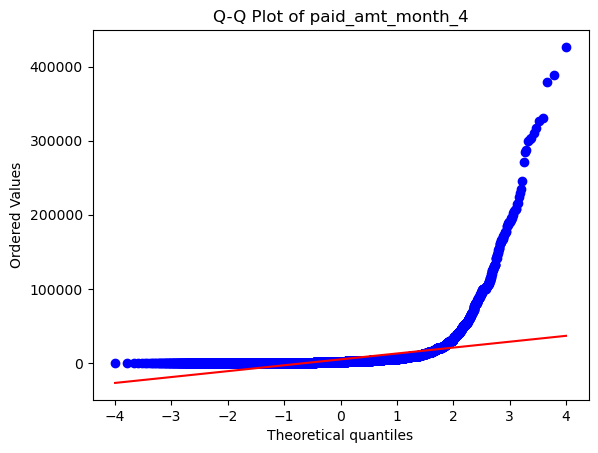

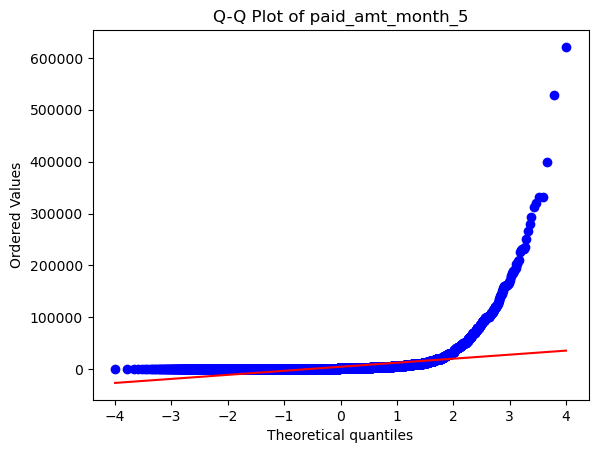

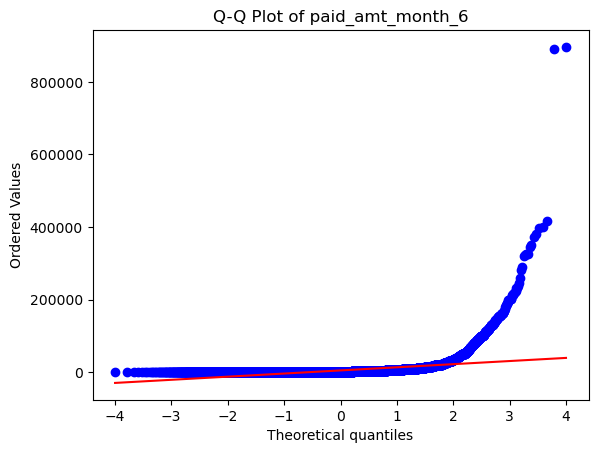

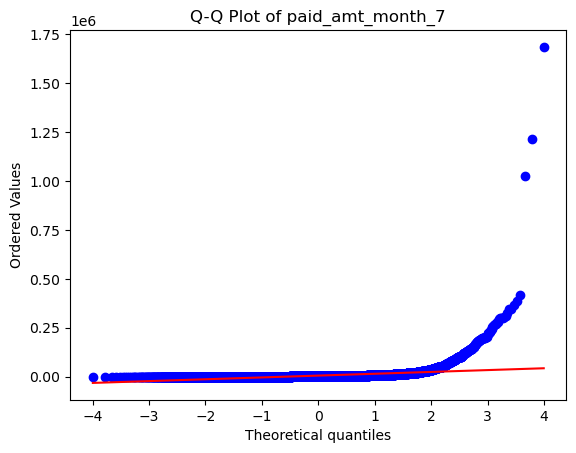

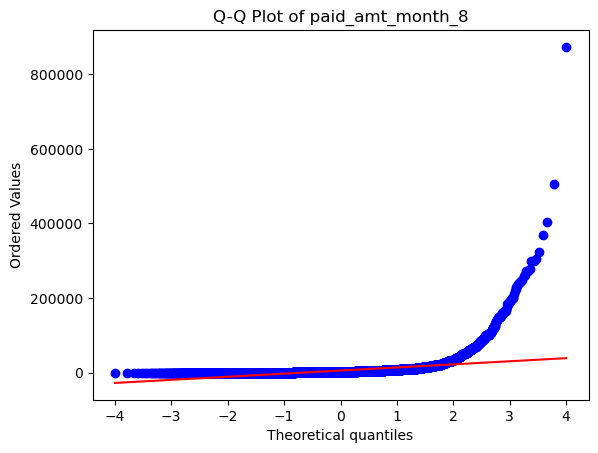

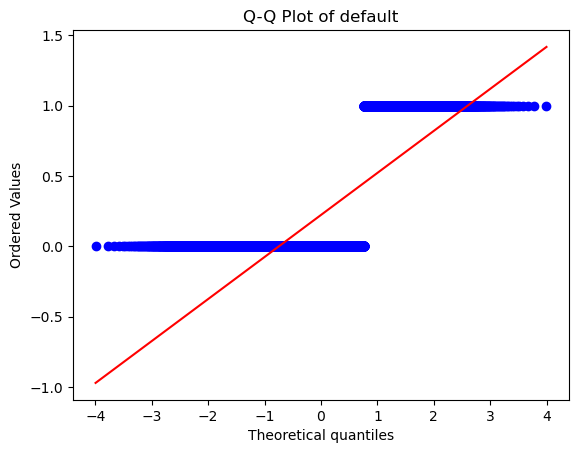

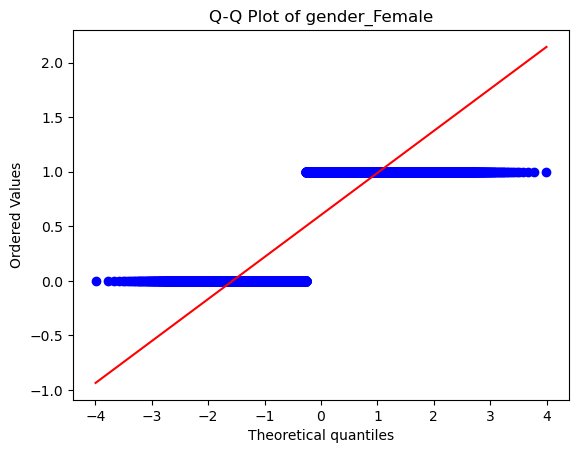

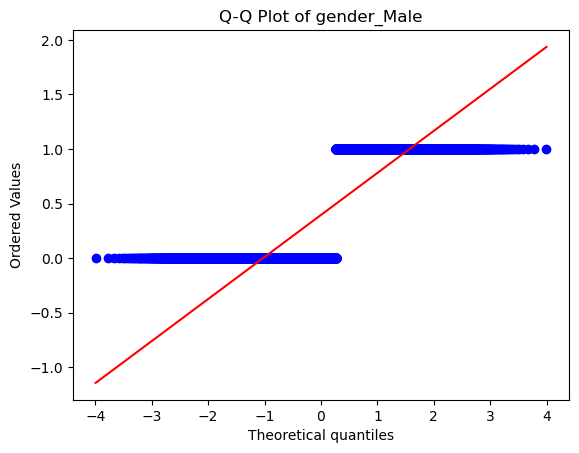

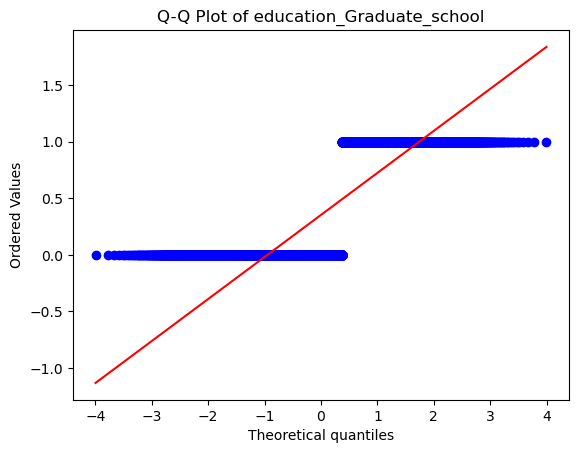

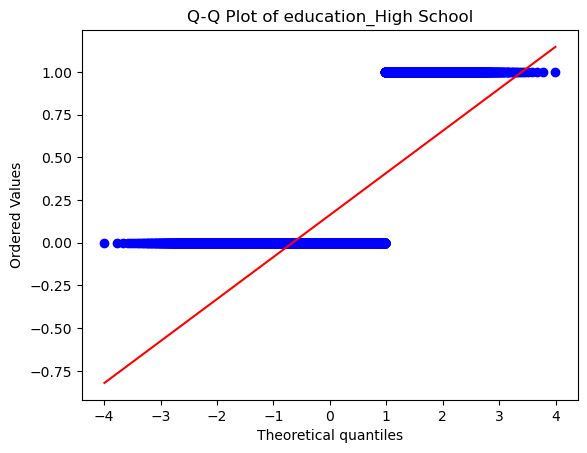

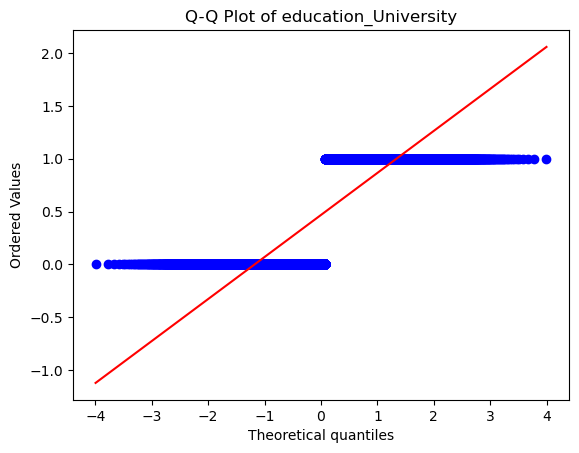

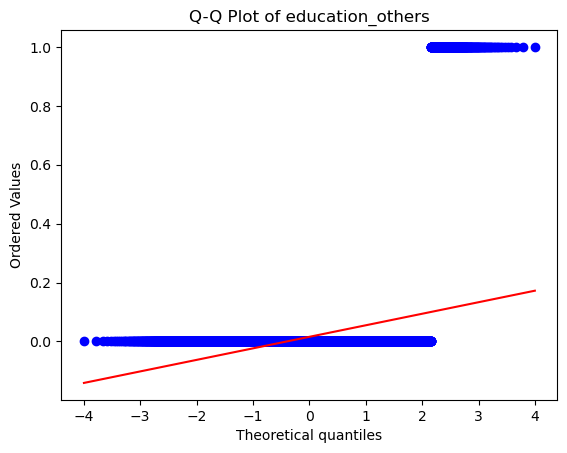

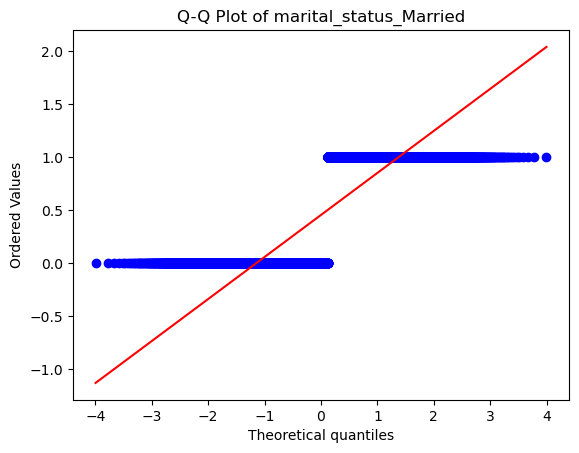

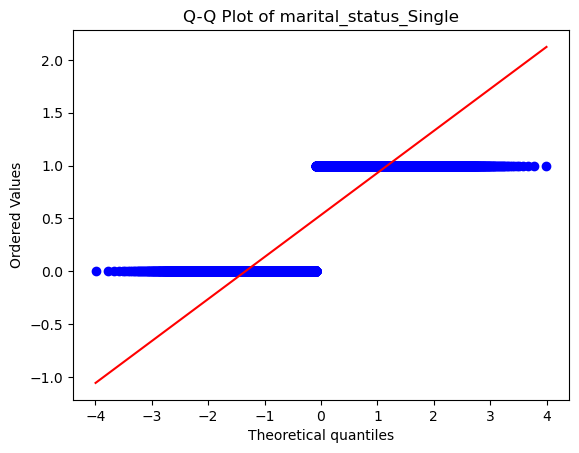

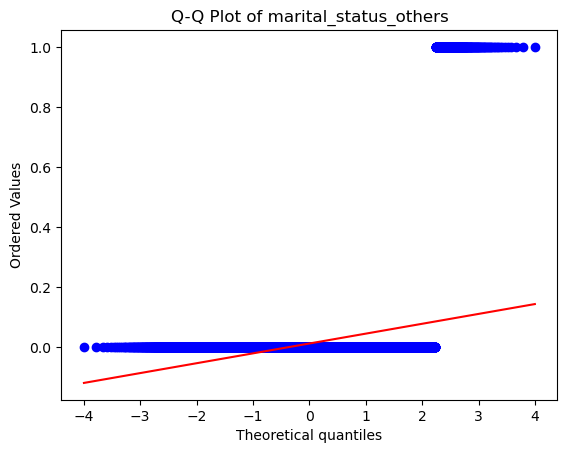

In [220]:
import scipy.stats as stats
import matplotlib.pyplot as plt

for col in df.describe().columns:
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {col}')
    plt.show()


# CHECKING FOR IMBALANCED NATURE

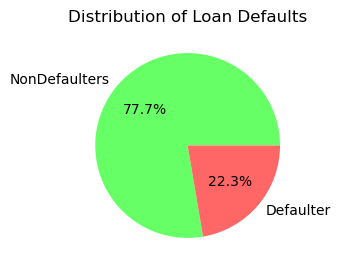

In [221]:
plt.figure(figsize=(5,3))
colors = ['#66ff66', '#ff6666']
plt.pie(x=df_loan['default'].value_counts(),labels=['NonDefaulters','Defaulter'],autopct='%1.1f%%',colors=colors)
plt.title('Distribution of Loan Defaults')
plt.show()

**Here our data is imbalanced**

## HANDLING IMBALANCE

In [226]:
from imblearn.over_sampling import SMOTE
print("dataset_before",Y.value_counts())
smt=SMOTE(random_state=40)
X_smt,Y_smt=smt.fit_resample(X,Y)
print("\n Dataset after",Y_smt.value_counts())

      

dataset_before default
0    16663
1     4792
Name: count, dtype: int64

 Dataset after default
0    16663
1    16663
Name: count, dtype: int64


In [227]:
X_smt

,credit_given,month,payment_status_month_3,payment_status_month_4,payment_status_month_5,payment_status_month_6,payment_status_month_7,payment_status_month_8,bill_amt_month_3,bill_amt_month_4,...,paid_amt_month_8,gender_Female,gender_Male,education_Graduate_school,education_High School,education_University,education_others,marital_status_Married,marital_status_Single,marital_status_others
0,90000,10,0,0,0,2,3,1,33291,33091,...,0,1,0,0,0,1,0,0,1,0
1,20000,10,0,0,0,0,0,0,16209,15215,...,1230,1,0,0,0,1,0,0,1,0
2,130000,10,-1,-1,0,0,-1,0,0,682,...,8486,1,0,0,0,1,0,1,0,0
3,290000,10,0,0,0,0,0,0,22667,23989,...,9000,1,0,0,0,1,0,0,1,0
4,240000,10,0,0,0,0,0,0,36783,33993,...,1480,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33321,20000,10,-2,-1,-1,1,1,0,-9,-9,...,32,0,1,0,1,0,0,1,0,0
33322,20000,10,1,1,1,0,0,0,15168,15009,...,2253,0,0,0,0,1,0,1,0,0
33323,180000,10,2,2,2,2,2,2,128998,122995,...,10697,0,0,0,0,1,0,1,0,0
33324,150000,10,0,1,1,1,1,1,20562,39385,...,5210,1,0,0,0,0,0,0,0,0


In [228]:
Y_smt

0        0
1        1
2        0
3        0
4        0
        ..
33321    1
33322    1
33323    1
33324    1
33325    1
Name: default, Length: 33326, dtype: int64

# DATA SPLITTING

In [230]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_smt,Y_smt,test_size=0.25,random_state=0)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)


(24994, 29) (24994,)
(8332, 29) (8332,)


# DATA SCALING

In [232]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)
                                   

In [296]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

# LOGISTIC REGRESSION

In [234]:
from sklearn.linear_model import LogisticRegression

model_log = LogisticRegression()
model_log.fit(X_train_scaled, Y_train)
predicted_probabilities = model_log.predict_proba(X_train_scaled)[:, 1]
results_df = pd.DataFrame({
    'Predicted_Probabilities': predicted_probabilities,
    'TrueLabel': Y_train
})
results_df.head()


,Predicted_Probabilities,TrueLabel
15805,0.746227,1
26337,0.998696,1
1495,0.308105,0
12053,0.192462,0
23707,0.996756,1


# METRIC FUNCTION 

In [236]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import ks_2samp
import pandas as pd
metrics_df=pd.DataFrame(columns=['Model','Accuracy','Precision','Recall','F1 Score','KS_Stat'])
def metric_score(model_name, y_test, y_pred_test, y_proba, metrics_df):
    acc = accuracy_score(y_test, y_pred_test)
    prec = precision_score(y_test, y_pred_test)
    rec = recall_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test)

    df = pd.DataFrame({'real': y_test, 'proba': y_proba[:, 1]})
    class0 = df[df['real'] == 0]
    class1 = df[df['real'] == 1]
    
    ks = ks_2samp(class0['proba'], class1['proba'])
    stat = round(ks.statistic, 3)  # Use `.statistic` instead of indexing
    
    eval_metrics_list = [model_name, acc, prec, rec, f1, stat]
    metrics_df.loc[len(metrics_df)] = eval_metrics_list

    return metrics_df

    

# LOGISTIC REGRESSION

In [237]:
model_lr=LogisticRegression(fit_intercept=True,max_iter=1000)
model_lr.fit(X_train_scaled,Y_train)
print("Coefficients",model_lr.coef_)
print("Intercept value",model_lr.intercept_)
lr_train_proba=model_lr.predict_proba(X_train_scaled)
lr_test_proba=model_lr.predict_proba(X_test_scaled)
y_pred_test=model_lr.predict(X_test_scaled)
y_pred_train=model_lr.predict(X_train_scaled)
print(lr_test_proba[:,1])
print(y_pred_train[0])


Coefficients [[-0.05301009  0.         -0.02208349  0.04973421  0.05206087  0.03599334
   0.10765263  0.63332834 -0.06324935  0.21369152 -0.09723203  0.15846039
   0.15019397 -0.44051238 -0.03094521 -0.09843465 -0.13844285 -0.09098405
  -0.26102158 -0.15088571 -3.21073185 -2.9657771  -3.07920246 -2.27241746
  -3.38819389 -0.86807279 -3.10680181 -3.27367887 -0.60700389]]
Intercept value [2.60581496]
[0.21246235 0.9999987  0.27552667 ... 0.99787372 0.46443456 0.99649872]
1


In [245]:
print(lr_test_proba[:,1])
print(y_pred_train[0])


[7.87537652e-01 1.29565071e-06 7.24473327e-01 ... 2.12627765e-03
 5.35565442e-01 3.50128205e-03]
1


In [239]:
!pip install scikit-plot

  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.4.2 which is incompatible.

[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: pip install --upgrade pip


In [242]:
metrics_df = pd.DataFrame(columns=['Model','Accuracy','Precision','Recall','F1 Score','KS_Stat'])


# METRIC SCORE OF LOGISTIC REGRESSION

In [244]:
metric_score('LogisticRegression',Y_test,y_pred_test,lr_test_proba,metrics_df)

,Model,Accuracy,Precision,Recall,F1 Score,KS_Stat
0,LogisticRegression,0.846255,0.933554,0.745498,0.828995,0.698


# VISUALIZATION OF CONFUSION MATRIX

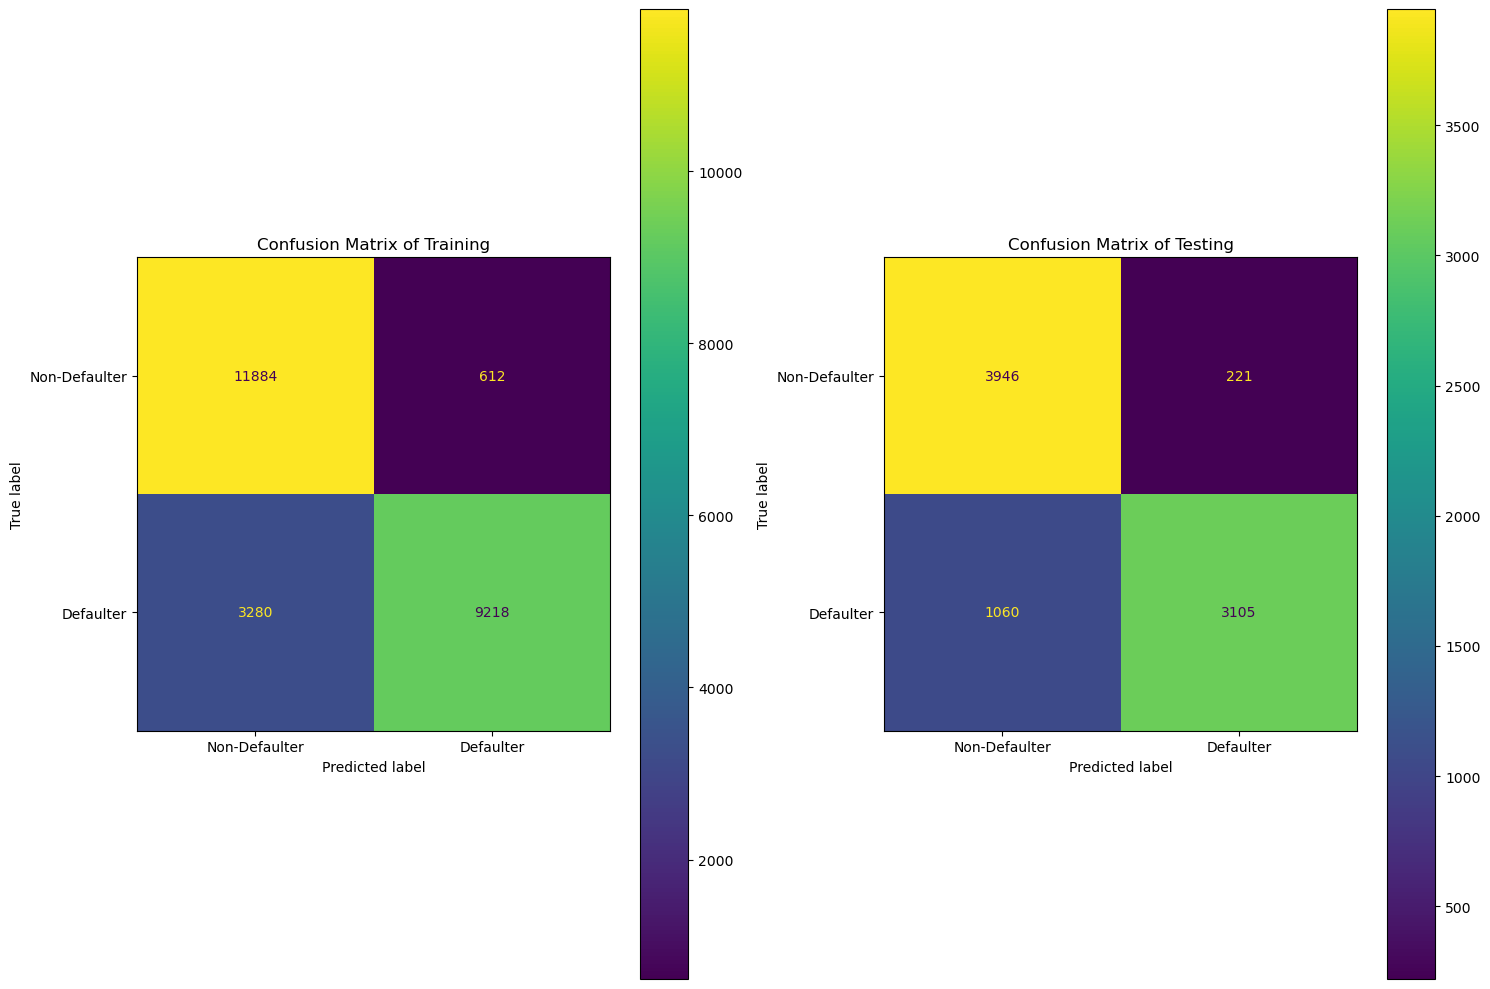

In [261]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def model_vis(y_train, y_test, y_pred_train, y_pred_test, y_train_proba, y_test_proba):
    fig, ax = plt.subplots(1, 2, figsize=(15, 10)) 
    # Confusion Matrix for Training Set
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_display_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Non-Defaulter', 'Defaulter'])
    cm_display_train.plot(ax=ax[0])
    ax[0].set_title('Confusion Matrix of Training')

    # Confusion Matrix for Testing Set
    cm_test = confusion_matrix(y_test, y_pred_test)
    cm_display_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['Non-Defaulter', 'Defaulter'])
    cm_display_test.plot(ax=ax[1])
    ax[1].set_title('Confusion Matrix of Testing')
    plt.tight_layout() 
    plt.show()

# Call the model_vis function
model_vis(Y_train, Y_test, y_pred_train, y_pred_test, lr_train_proba, lr_test_proba)


In [262]:
import joblib
joblib.dump(model_lr, 'logistic_regression_model.pkl')
loaded_model = joblib.load('logistic_regression_model.pkl')



# DECISION TREE

In [263]:
from sklearn.tree import DecisionTreeClassifier
model_dt=DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=10,random_state=100,min_samples_leaf=10)
model_dt.fit(X_train_scaled,Y_train)
dt_test_proba=model_dt.predict_proba(X_test_scaled)
dt_train_proba=model_dt.predict_proba(X_train_scaled)
y_pred_test=model_dt.predict(X_test_scaled)
y_pred_train=model_dt.predict(X_train_scaled)

In [267]:
import joblib
joblib.dump(model_dt, 'decision_tree_model.joblib')


['decision_tree_model.joblib']

## CONFUSION MATRIX

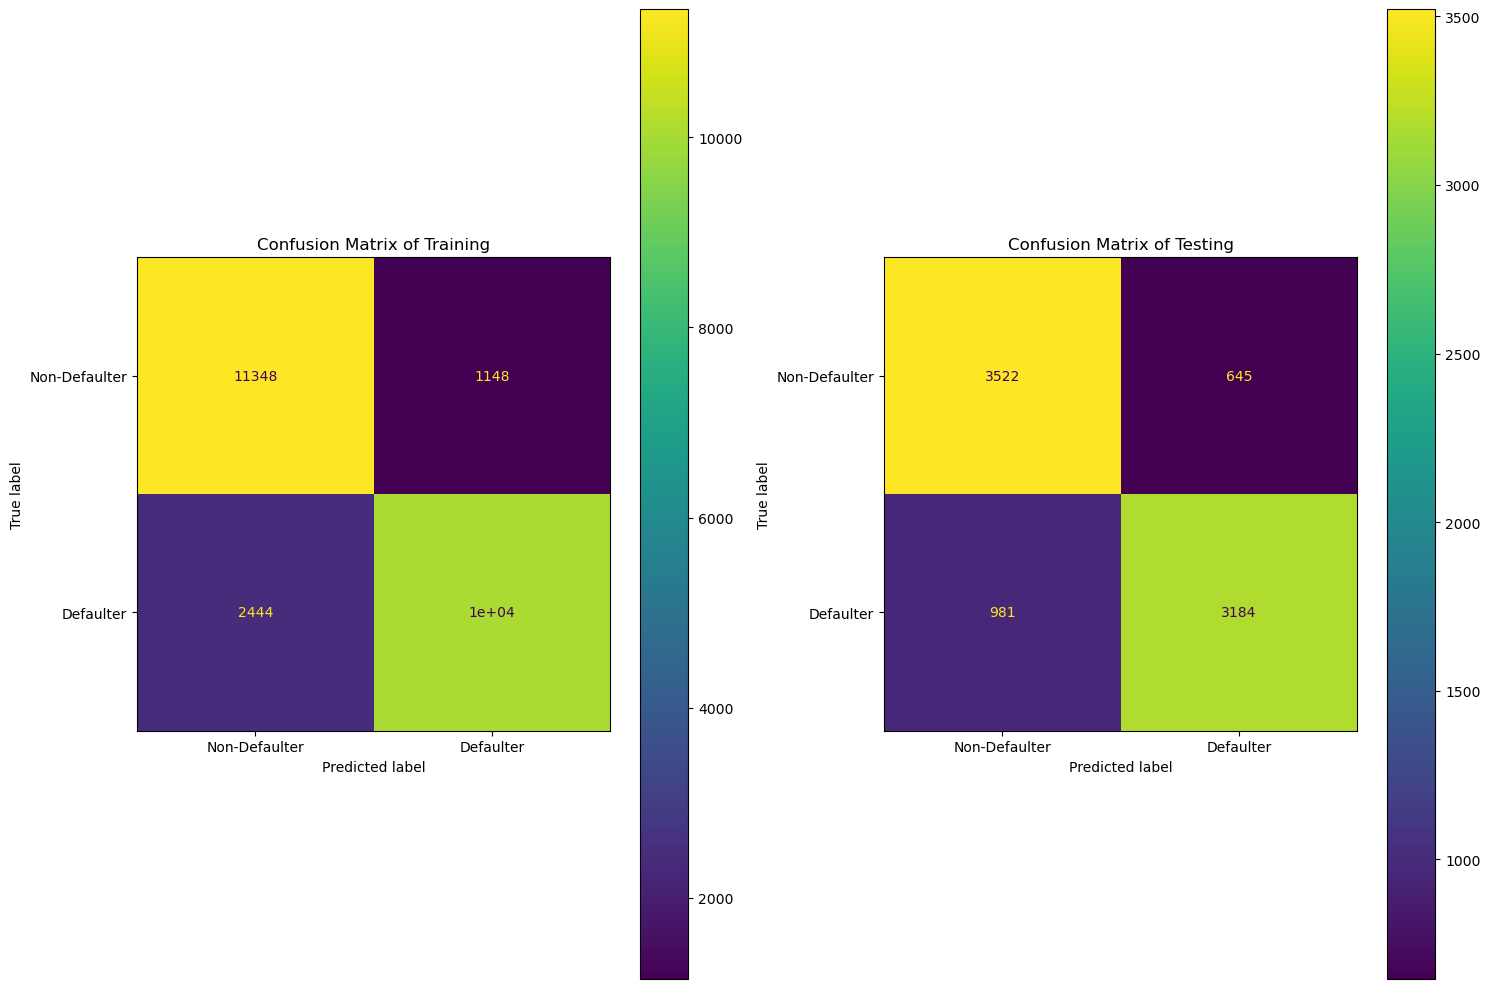

In [264]:
model_vis(Y_train,Y_test,y_pred_train,y_pred_test,dt_train_proba,dt_test_proba)

## METRIC SCORE

In [266]:
metric_score('DecisionTreeClassifier',Y_test,y_pred_test,dt_test_proba,metrics_df)

,Model,Accuracy,Precision,Recall,F1 Score,KS_Stat
0,LogisticRegression,0.846255,0.933554,0.745498,0.828995,0.698
1,DecisionTreeClassifier,0.804849,0.831549,0.764466,0.796597,0.624


# TUNED DECISION TREE

In [268]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
param_dict = {
    'max_depth': [20, 25, 30, 35, 40],
    'min_samples_split': [50, 100, 150],
    'min_samples_leaf': [30, 40, 50],
}

dt = DecisionTreeClassifier()

dt_cv = GridSearchCV(dt, param_dict, scoring='recall', n_jobs=-1, verbose=3, cv=5)

dt_cv.fit(X_train_scaled, Y_train)


dt_best = dt_cv.best_estimator_


print("Best model parameters:", dt_cv.best_params_)


dt_best_test_proba = dt_best.predict_proba(X_test_scaled)
dt_best_train_proba = dt_best.predict_proba(X_train_scaled)


y_best_pred_test = dt_best.predict(X_test_scaled)
y_best_pred_train = dt_best.predict(X_train_scaled)


Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV 3/5] END max_depth=20, min_samples_leaf=30, min_samples_split=50;, score=0.774 total time=   0.3s
[CV 1/5] END max_depth=20, min_samples_leaf=30, min_samples_split=100;, score=0.787 total time=   0.3s
[CV 2/5] END max_depth=20, min_samples_leaf=30, min_samples_split=100;, score=0.758 total time=   0.3s
[CV 5/5] END max_depth=20, min_samples_leaf=30, min_samples_split=50;, score=0.748 total time=   0.3s
[CV 3/5] END max_depth=20, min_samples_leaf=30, min_samples_split=100;, score=0.768 total time=   0.3s
[CV 2/5] END max_depth=20, min_samples_leaf=30, min_samples_split=50;, score=0.764 total time=   0.3s
[CV 1/5] END max_depth=20, min_samples_leaf=30, min_samples_split=50;, score=0.785 total time=   0.3s
[CV 4/5] END max_depth=20, min_samples_leaf=30, min_samples_split=50;, score=0.774 total time=   0.3s
[CV 5/5] END max_depth=20, min_samples_leaf=30, min_samples_split=100;, score=0.741 total time=   0.3s
[CV 2/5] END max

In [269]:

joblib.dump(dt_best, 'best_decision_tree_model.joblib')


['best_decision_tree_model.joblib']

In [270]:
import pickle

# Save the model using pickle
with open('best_decision_tree_model.pkl', 'wb') as file:
    pickle.dump(dt_best, file)


## CONFUSION MATRIX

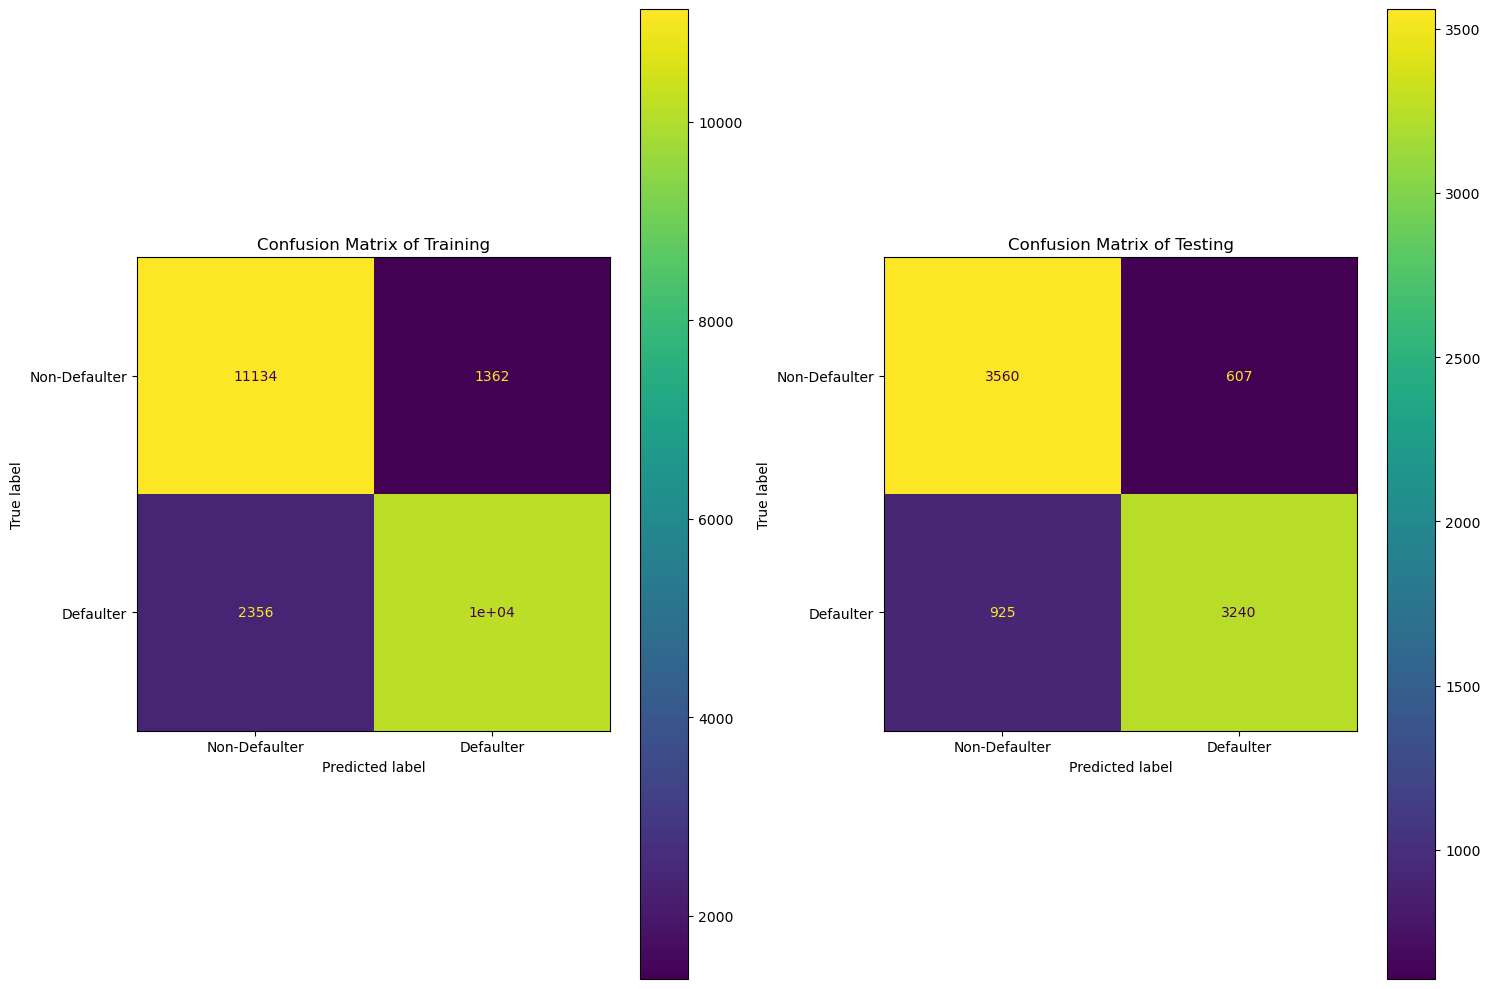

In [271]:
model_vis(Y_train,Y_test,y_best_pred_train,y_best_pred_test,dt_best_train_proba,dt_best_test_proba)

## METRIC SCORE

In [273]:
metric_score('Tuned Decision_Tree_Classifier',Y_test,y_best_pred_test,dt_best_test_proba,metrics_df)

,Model,Accuracy,Precision,Recall,F1 Score,KS_Stat
0,LogisticRegression,0.846255,0.933554,0.745498,0.828995,0.698
1,DecisionTreeClassifier,0.804849,0.831549,0.764466,0.796597,0.624
2,Tuned Decision_Tree_Classifier,0.816131,0.842215,0.777911,0.808787,0.634


# RANDOM FOREST CLASSIFIER

In [275]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0)
model_rf.fit(X_train_scaled,Y_train)
rf_test_proba=model_rf.predict_proba(X_test_scaled)
rf_train_proba=model_rf.predict_proba(X_train_scaled)
y_pred_test=model_rf.predict(X_test_scaled)
y_pred_train=model_rf.predict(X_train_scaled)

## CONFUSION MATRIX

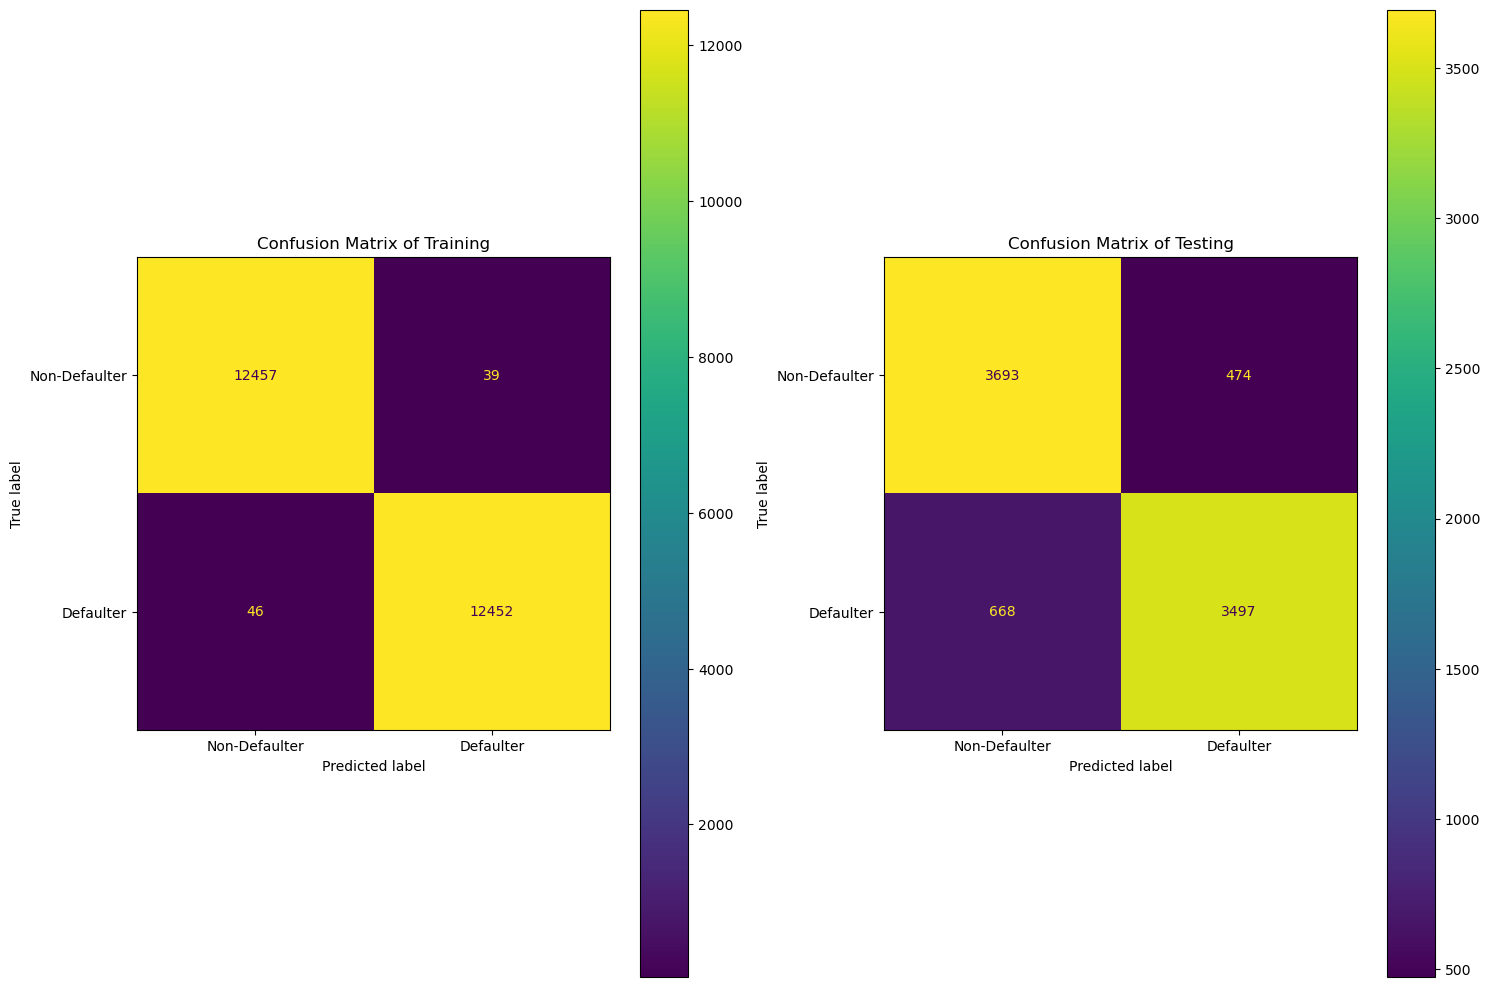

In [276]:
model_vis(Y_train,Y_test,y_pred_train,y_pred_test,rf_train_proba,rf_test_proba)

## METRIC SCORE

In [278]:
metric_score('RandomForestClassifier',Y_test,y_pred_test,rf_test_proba,metrics_df)

,Model,Accuracy,Precision,Recall,F1 Score,KS_Stat
0,LogisticRegression,0.846255,0.933554,0.745498,0.828995,0.698
1,DecisionTreeClassifier,0.804849,0.831549,0.764466,0.796597,0.624
2,Tuned Decision_Tree_Classifier,0.816131,0.842215,0.777911,0.808787,0.634
3,RandomForestClassifier,0.862938,0.880635,0.839616,0.859636,0.729


In [279]:
joblib.dump(model_rf, 'random_forest_model.pkl')


['random_forest_model.pkl']

# AdaBoost Classifier

In [281]:
from sklearn.ensemble import AdaBoostClassifier

model_ada = AdaBoostClassifier(n_estimators=100)
model_ada.fit(X_train_scaled, Y_train)

ada_test_proba = model_ada.predict_proba(X_test_scaled)
ada_train_proba = model_ada.predict_proba(X_train_scaled)

y_pred_test = model_ada.predict(X_test_scaled)
y_pred_train = model_ada.predict(X_train_scaled)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


## CONFUSION MATRIX

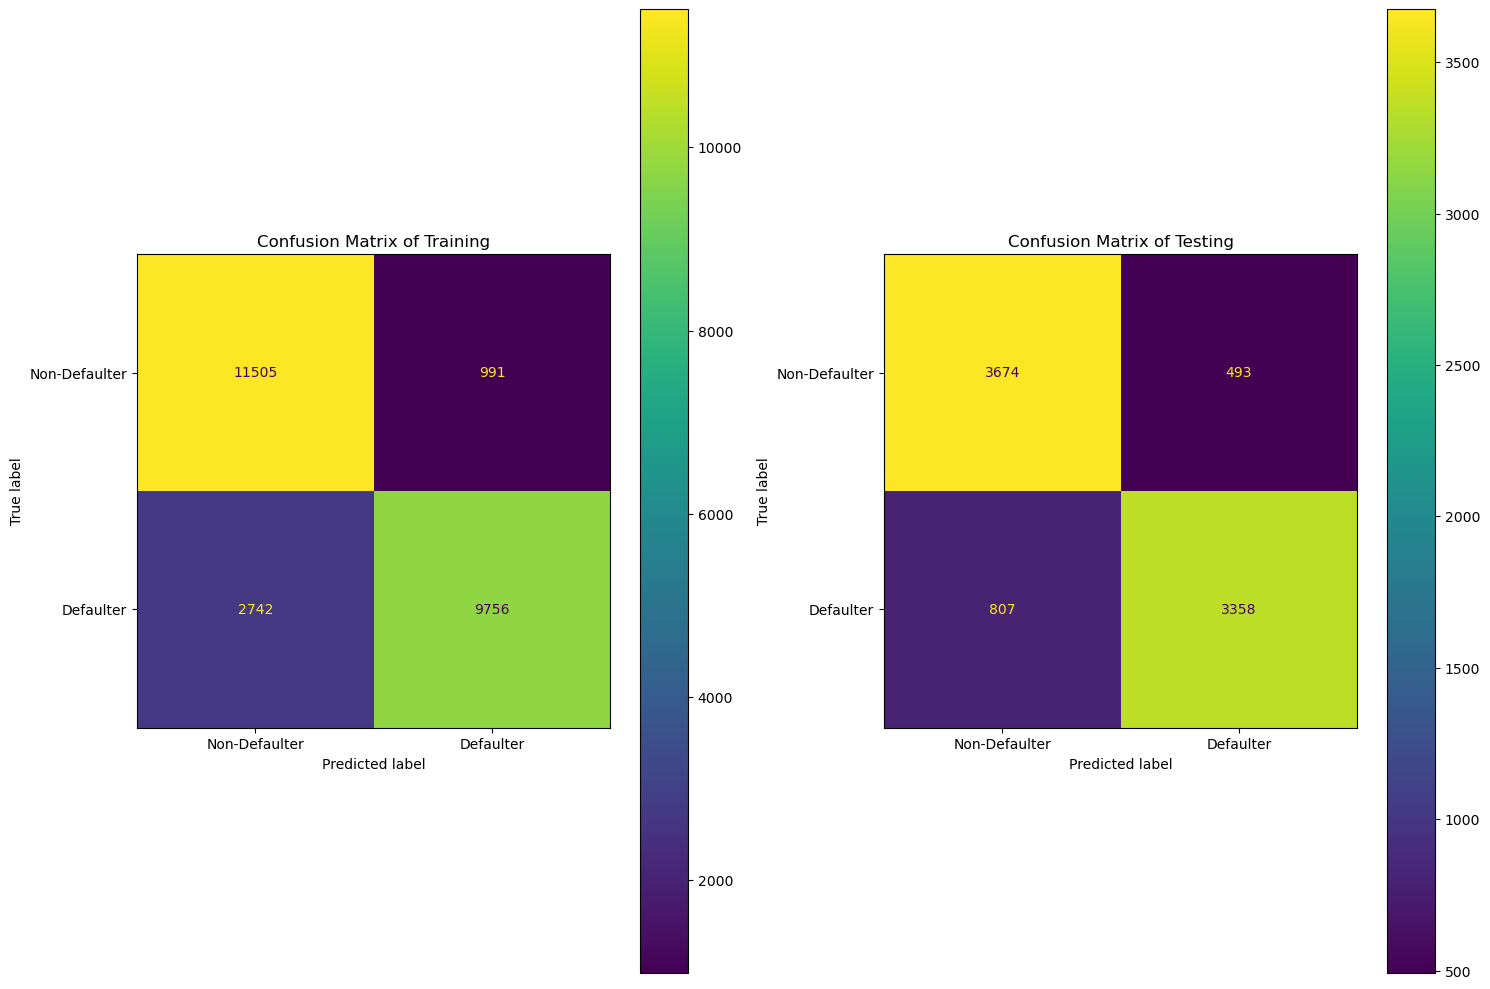

In [282]:
model_vis(Y_train,Y_test,y_pred_train,y_pred_test,ada_train_proba,ada_test_proba)

## METRIC SCORES

In [283]:
metric_score('AdaBoostClassifier',Y_test,y_pred_test,ada_test_proba,metrics_df)

,Model,Accuracy,Precision,Recall,F1 Score,KS_Stat
0,LogisticRegression,0.846255,0.933554,0.745498,0.828995,0.698
1,DecisionTreeClassifier,0.804849,0.831549,0.764466,0.796597,0.624
2,Tuned Decision_Tree_Classifier,0.816131,0.842215,0.777911,0.808787,0.634
3,RandomForestClassifier,0.862938,0.880635,0.839616,0.859636,0.729
4,AdaBoostClassifier,0.843975,0.871981,0.806242,0.837824,0.698


# K Nearest Neigbors

In [284]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=7)  
model_knn.fit(X_train_scaled, Y_train)
knn_test_proba = model_knn.predict_proba(X_test_scaled)
knn_train_proba = model_knn.predict_proba(X_train_scaled)

# Predict class labels
y_pred_test = model_knn.predict(X_test_scaled)
y_pred_train = model_knn.predict(X_train_scaled)


## CONFUSION MATRIX

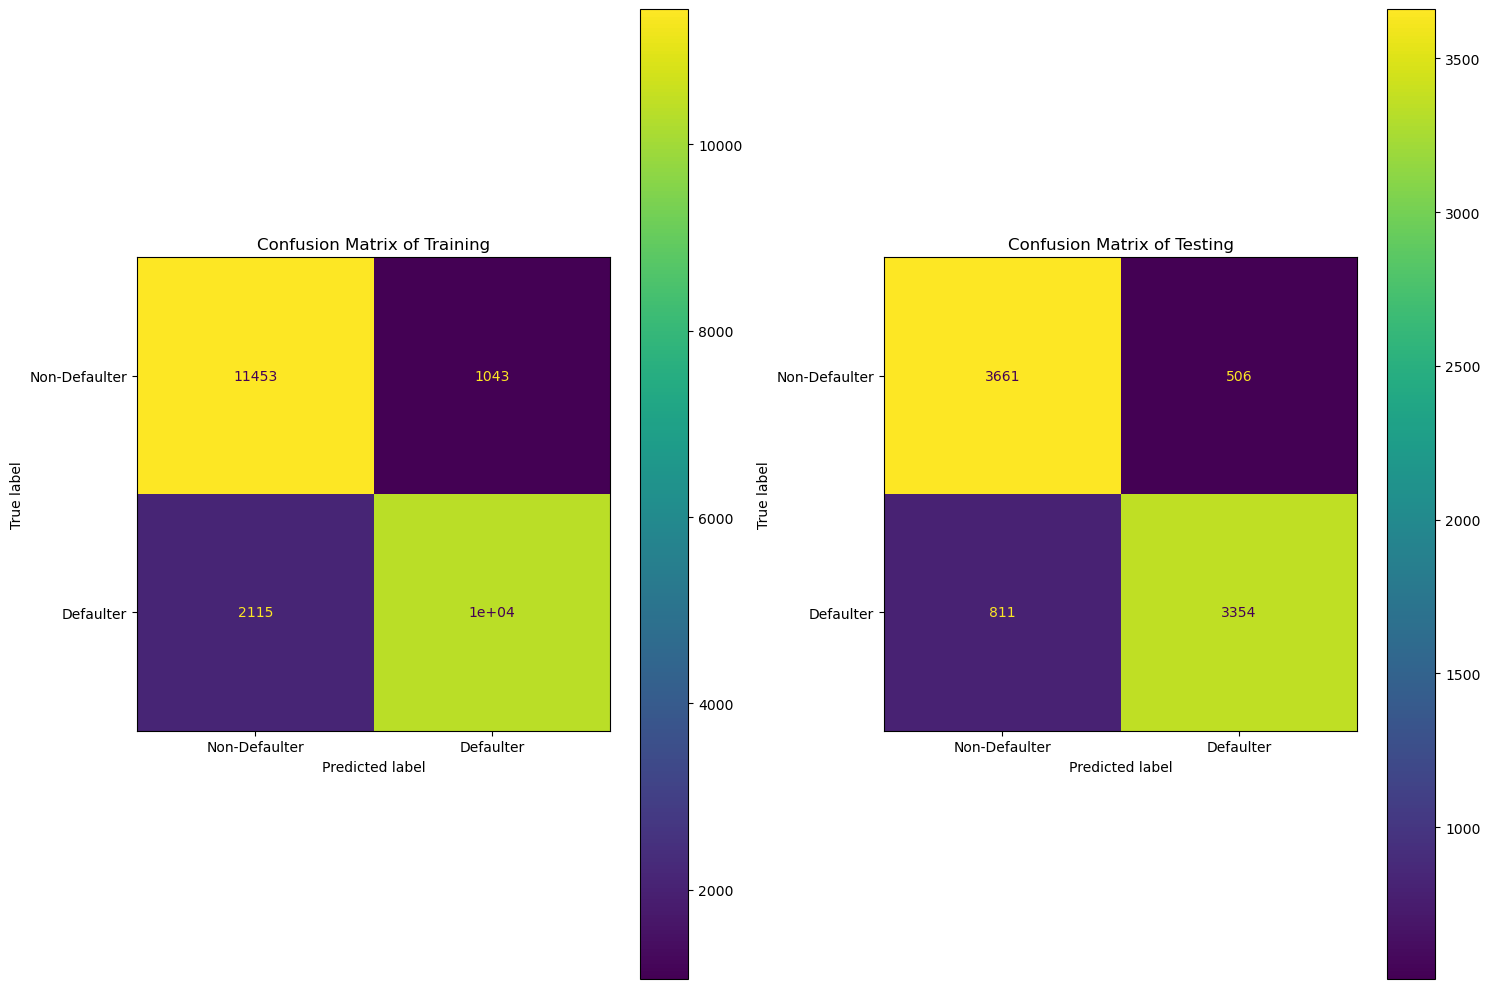

In [285]:
model_vis(Y_train,Y_test,y_pred_train,y_pred_test,knn_train_proba,knn_test_proba)

## METRIC SCORES

In [286]:
metric_score('KNearestNeighbor',Y_test,y_pred_test,knn_test_proba,metrics_df)

,Model,Accuracy,Precision,Recall,F1 Score,KS_Stat
0,LogisticRegression,0.846255,0.933554,0.745498,0.828995,0.698
1,DecisionTreeClassifier,0.804849,0.831549,0.764466,0.796597,0.624
2,Tuned Decision_Tree_Classifier,0.816131,0.842215,0.777911,0.808787,0.634
3,RandomForestClassifier,0.862938,0.880635,0.839616,0.859636,0.729
4,AdaBoostClassifier,0.843975,0.871981,0.806242,0.837824,0.698
5,KNearestNeighbor,0.841935,0.868912,0.805282,0.835888,0.684


# XGBOOST

In [288]:
!pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 7.9 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: pip install --upgrade pip


In [289]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier()
model_xgb.fit(X_train_scaled, Y_train)
xgb_test_proba = model_xgb.predict_proba(X_test_scaled)
xgb_train_proba = model_xgb.predict_proba(X_train_scaled)
y_pred_test = model_xgb.predict(X_test_scaled)
y_pred_train = model_xgb.predict(X_train_scaled)


## CONFUSION MATRIX

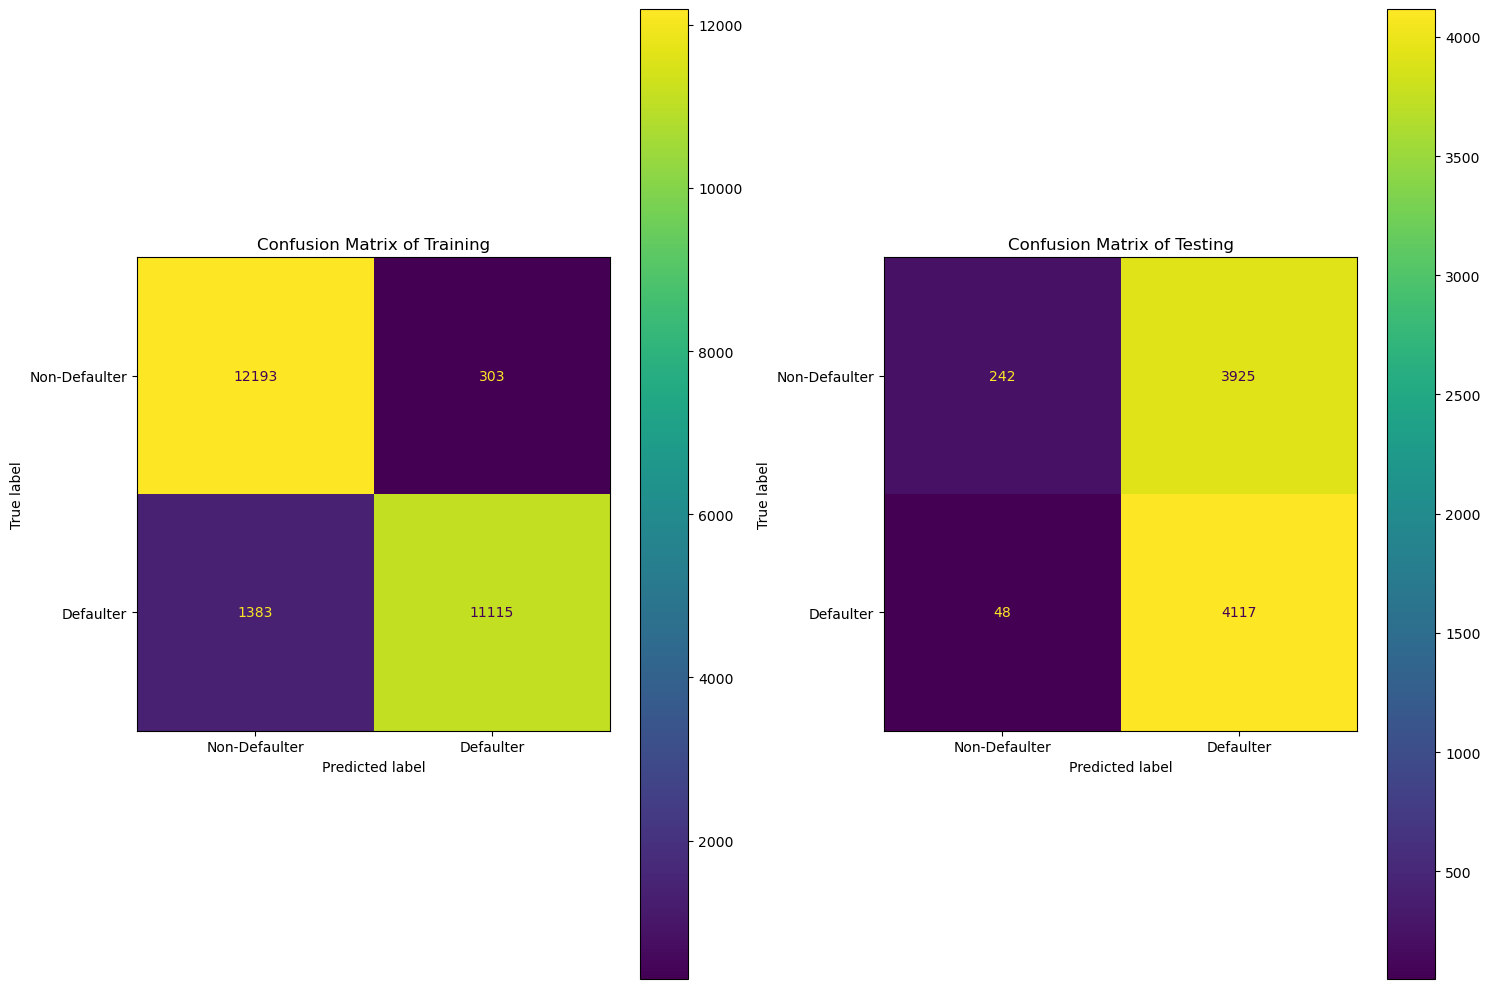

In [290]:
model_vis(Y_train,Y_test,y_pred_train,y_pred_test,xgb_train_proba,xgb_test_proba)

## METRIC SCORES 

In [291]:
metric_score('XGBoost',Y_test,y_pred_test,xgb_test_proba,metrics_df)

,Model,Accuracy,Precision,Recall,F1 Score,KS_Stat
0,LogisticRegression,0.846255,0.933554,0.745498,0.828995,0.698
1,DecisionTreeClassifier,0.804849,0.831549,0.764466,0.796597,0.624
2,Tuned Decision_Tree_Classifier,0.816131,0.842215,0.777911,0.808787,0.634
3,RandomForestClassifier,0.862938,0.880635,0.839616,0.859636,0.729
4,AdaBoostClassifier,0.843975,0.871981,0.806242,0.837824,0.698
5,KNearestNeighbor,0.841935,0.868912,0.805282,0.835888,0.684
6,XGBoost,0.523164,0.511937,0.988475,0.674531,0.378


# INFERENCE AND FINAL DECISON

Random Forest Classifier stands out as the best-performing model based on the provided metrics:
Highest Accuracy (86.29%), Precision (88.06%), Recall (83.96%), and F1 Score (85.96%).
Highest KS Statistic (0.729), which indicates the best separation between positive and negative classes.
Random Forest typically handles overfitting better than decision trees and can scale well to larger datasets.
While XGBoost has excellent recall, its low precision and overall accuracy suggest it might not be the best choice unless the recall is a priority, such as in applications where capturing all positives is critical.

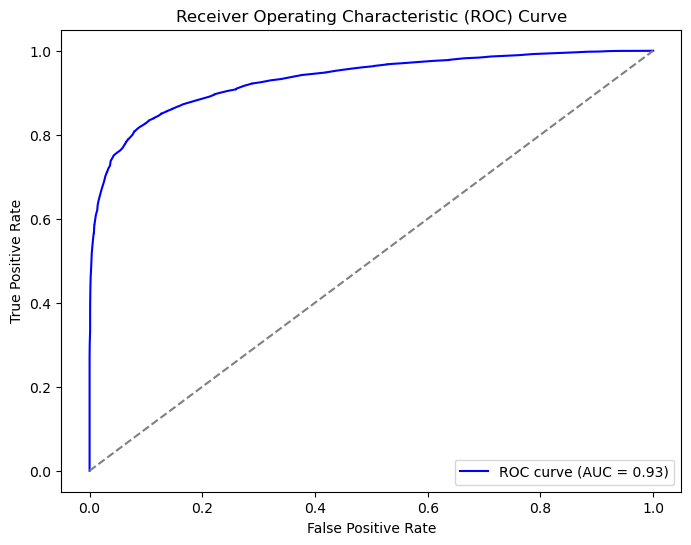

In [295]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
y_pred_proba = model_rf.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# FINALL INTERPRETATION

An AUC of 0.93 indicates a strong model with good ability to distinguish between default and non-default clients. The ROC curve is used to evaluate the trade-off between true positive rate and false positive rate for different thresholds.The ROC curve shows the relationship between the True Positive Rate (TPR) and False Positive Rate (FPR), with the AUC providing an aggregate measure of model performance across all classification thresholds.